<a href="https://colab.research.google.com/github/subhanan-git/pycodes/blob/main/Credit_Risk_Model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.options.display.max_columns=None
data=pd.read_csv('loan_data_2007_2014.csv')



<ipython-input-2-7bf8915ac90a>:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('loan_data_2007_2014.csv')


In [3]:
data.head(5)

Unnamed: 0         id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501.0  1296599.0     5000.0       5000.0           4975.0   
1           1  1077430.0  1314167.0     2500.0       2500.0           2500.0   
2           2  1077175.0  1313524.0     2400.0       2400.0           2400.0   
3           3  1076863.0  1277178.0    10000.0      10000.0          10000.0   
4           4  1075358.0  1311748.0     3000.0       3000.0           3000.0   

         term  int_rate  installment grade sub_grade  \
0   36 months     10.65       162.87     B        B2   
1   60 months     15.27        59.83     C        C4   
2   36 months     15.96        84.33     C        C5   
3   36 months     13.49       339.31     C        C1   
4   60 months     12.69        67.79     B        B5   

                  emp_title emp_length home_ownership  annual_inc  \
0                       NaN  10+ years           RENT     24000.0   
1                     Ryder   < 1 year           RENT     30000.0   
2                       NaN  10+ years           RENT     12252.0   
3       AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4  University Medical Group     1 year           RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan  \
0            Verified  Dec-11   Fully Paid          n   
1     Source Verified  Dec-11  Charged Off          n   
2        Not Verified  Dec-11   Fully Paid          n   
3     Source Verified  Dec-11   Fully Paid          n   
4     Source Verified  Dec-11      Current          n   

                                                 url  \
0  https://www.lendingclub.com/browse/loanDetail....   
1  https://www.lendingclub.com/browse/loanDetail....   
2  https://www.lendingclub.com/browse/loanDetail....   
3  https://www.lendingclub.com/browse/loanDetail....   
4  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85             1.0                     NaN   
1           Apr-99             5.0                     NaN   
2           Nov-01             2.0                     NaN   
3           Feb-96             1.0                    35.0   
4           Jan-96             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0    13648.0        83.7   
1                     NaN       3.0      0.0     1687.0         9.4   
2                     NaN       2.0      0.0     2956.0        98.5   
3                     NaN      10.0      0.0     5598.0        21.0   
4                     NaN      15.0      0.0    27783.0        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302210   
4       38.0                   f      766.9          766.9   3242.170000  

In [4]:
data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [5]:
data['emp_length']=data['emp_length'].str.extract(r'(\d+)').astype(float)


In [6]:
data['emp_length'].fillna(0, inplace=True)

<ipython-input-6-43e287d00556>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['emp_length'].fillna(0, inplace=True)


In [7]:
null_cols=[cols for cols in data.columns if data[cols].isnull().sum()>0]
len(null_cols)

73

In [8]:
nonnull_cols=[cols for cols in data.columns if data[cols].isnull().sum()==0]
#print(nonnull_cols)
print('\n')
print(len(nonnull_cols))



2


In [9]:
data['term'].unique()

array([' 36 months', ' 60 months', nan], dtype=object)

In [10]:
data['term']= data['term'].str.extract(r'(\d+)').astype(float)

In [11]:
data['term'].fillna(0, inplace=True)

<ipython-input-11-3b2eb93797be>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['term'].fillna(0, inplace=True)


In [12]:
data['earliest_cr_line']= pd.to_datetime(data['earliest_cr_line'], format='%b-%y')
data['earliest_cr_line']

0        1985-01-01
1        1999-04-01
2        2001-11-01
3        1996-02-01
4        1996-01-01
            ...    
331290   1998-12-01
331291   1997-03-01
331292   1991-08-01
331293   2001-10-01
331294          NaT
Name: earliest_cr_line, Length: 331295, dtype: datetime64[ns]

In [13]:
(pd.to_datetime('2025-01-16')- data['earliest_cr_line']).describe()

count                          331265
mean     9887 days 23:47:37.971714688
std      2817 days 06:44:55.544347360
min             -16025 days +00:00:00
25%                8173 days 00:00:00
50%                9453 days 00:00:00
75%               11248 days 00:00:00
max               20469 days 00:00:00
Name: earliest_cr_line, dtype: object

In [14]:
data['difference_in_months_crline'] = (pd.to_datetime('2025-01-16').year - data['earliest_cr_line'].dt.year) * 12 + \
                       (pd.to_datetime('2025-01-16').month - data['earliest_cr_line'].dt.month)

In [15]:
data['difference_in_months_crline'].describe()

count    331265.000000
mean        324.334506
std          92.559569
min        -527.000000
25%         268.000000
50%         310.000000
75%         369.000000
max         672.000000
Name: difference_in_months_crline, dtype: float64

In [16]:
data.loc[:,['earliest_cr_line', 'difference_in_months_crline']][data['difference_in_months_crline']<0]

earliest_cr_line  difference_in_months_crline
1580         2062-09-01                       -452.0
1770         2068-09-01                       -524.0
2799         2064-09-01                       -476.0
3282         2067-09-01                       -512.0
3359         2065-02-01                       -481.0
...                 ...                          ...
328179       2065-07-01                       -486.0
328556       2063-04-01                       -459.0
328633       2065-03-01                       -482.0
328999       2068-03-01                       -518.0
329142       2067-04-01                       -507.0

[771 rows x 2 columns]

In [17]:
data['difference_in_months_crline']= np.where(data['difference_in_months_crline']<0, data['difference_in_months_crline'].max(), data['difference_in_months_crline'] )

In [18]:
data['difference_in_months_crline'].min()

158.0

In [19]:
data['term']

0         36.0
1         60.0
2         36.0
3         36.0
4         60.0
          ... 
331290    36.0
331291    36.0
331292    36.0
331293    60.0
331294     0.0
Name: term, Length: 331295, dtype: float64

In [20]:
data['issue_d']=pd.to_datetime(data['issue_d'], format='%b-%y')

In [21]:
data['issue_d'].isnull().sum()

1

In [22]:
data['difference_in_months_issued']= (pd.to_datetime('2025-01-16').year- data['issue_d'].dt.year)*12 + \
                                        (pd.to_datetime('2025-01-16').month - data['issue_d'].dt.month)

In [23]:
data['difference_in_months_issued'].unique()

array([157., 158., 159., 160., 161., 162., 163., 164., 165., 166., 167.,
       168., 169., 170., 171., 172., 173., 174., 175., 176., 177., 178.,
       179., 180., 181., 182., 183., 184., 185., 186., 187., 188., 189.,
       190., 191., 192., 193., 194., 195., 196., 197., 198., 199., 200.,
       201., 202., 203., 204., 205., 206., 207., 208., 209., 210., 211.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 151., 152., 153., 154.,
       155., 156., 121., 122., 123., 124., 125., 126.,  nan])

In [24]:
data['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G', nan], dtype=object)

In [25]:
data['grade'].value_counts()

grade
B    100687
C     86568
A     56605
D     51068
E     24168
F      9769
G      2429
Name: count, dtype: int64

In [26]:
pd.get_dummies(data['grade'], prefix='grade', prefix_sep=':', dtype=int)

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G
0             0        1        0        0        0        0        0
1             0        0        1        0        0        0        0
2             0        0        1        0        0        0        0
3             0        0        1        0        0        0        0
4             0        1        0        0        0        0        0
...         ...      ...      ...      ...      ...      ...      ...
331290        0        0        1        0        0        0        0
331291        1        0        0        0        0        0        0
331292        0        1        0        0        0        0        0
331293        0        0        0        0        1        0        0
331294        0        0        0        0        0        0        0

[331295 rows x 7 columns]

In [27]:
loan_data_dummies= [pd.get_dummies(data['grade'], prefix='grade', prefix_sep=':', dtype=int),
                    pd.get_dummies(data['sub_grade'], prefix='sub_grade', prefix_sep=':', dtype=int),
                   pd.get_dummies(data['home_ownership'], prefix='home_ownership', prefix_sep=':', dtype=int),
                   pd.get_dummies(data['verification_status'], prefix='verification_status', prefix_sep=':', dtype=int),
                   pd.get_dummies(data['loan_status'], prefix='loan_status', prefix_sep=':', dtype=int),
                   pd.get_dummies(data['purpose'], prefix='purpose', prefix_sep=':', dtype=int),
                   pd.get_dummies(data['addr_state'], prefix='addr_state', prefix_sep=':', dtype=int),
                   pd.get_dummies(data['initial_list_status'], prefix='initial_list_status', prefix_sep=':', dtype=int)]

In [28]:
loan_data_dummies= pd.concat(loan_data_dummies, axis=1)

In [29]:
data=pd.concat([data, loan_data_dummies], axis=1)

In [30]:
data['total_rev_hi_lim'].fillna(data['funded_amnt'], inplace=True)

<ipython-input-30-626da049d96d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['total_rev_hi_lim'].fillna(data['funded_amnt'], inplace=True)


In [31]:
non_null_sum_annual_income= data['annual_inc'].dropna().sum()
print(non_null_sum_annual_income)

24045994755.51


In [32]:
data['annual_inc'].fillna(non_null_sum_annual_income, inplace=True)


<ipython-input-32-e1ee1d895f16>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['annual_inc'].fillna(non_null_sum_annual_income, inplace=True)


In [33]:
data['annual_inc'].isnull().sum()

0

In [34]:
for cols in ['difference_in_months_crline','acc_now_delinq',
            'total_acc','pub_rec','open_acc','inq_last_6mths',
            'delinq_2yrs']:
    data[cols].fillna(0, inplace=True)

<ipython-input-34-c277dfe6ed03>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[cols].fillna(0, inplace=True)


In [35]:
data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', nan],
      dtype=object)

In [36]:
data['loan_status'].value_counts()

loan_status
Fully Paid                                             148177
Current                                                140071
Charged Off                                             32818
Late (31-120 days)                                       4259
In Grace Period                                          2006
Does not meet the credit policy. Status:Fully Paid       1988
Does not meet the credit policy. Status:Charged Off       761
Late (16-30 days)                                         741
Default                                                   473
Name: count, dtype: int64

In [37]:
data['loan_status'].value_counts()/ len(data['loan_status'])

loan_status
Fully Paid                                             0.447266
Current                                                0.422798
Charged Off                                            0.099060
Late (31-120 days)                                     0.012856
In Grace Period                                        0.006055
Does not meet the credit policy. Status:Fully Paid     0.006001
Does not meet the credit policy. Status:Charged Off    0.002297
Late (16-30 days)                                      0.002237
Default                                                0.001428
Name: count, dtype: float64

In [38]:
data['good_bad'] = np.where(
    data['loan_status'].isin(['Charged Off', 'Default','Does not meet the credit policy. Status:Charged Off',
                              'Late (31-120 days)']), 0, 1)

In [39]:
data['good_bad']

0         1
1         0
2         1
3         1
4         1
         ..
331290    1
331291    1
331292    1
331293    1
331294    1
Name: good_bad, Length: 331295, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X= data.drop(['loan_status', 'good_bad'], axis=1)
y= data['good_bad']

In [42]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [43]:
print(X_train.shape)
print('\n')
print(X_test.shape)
print('\n')
print(y_train.shape)
print('\n')
print(y_test.shape)

(265036, 202)


(66259, 202)


(265036,)


(66259,)


Data Preparation

In [181]:

#df_inputs_prep= X_train.copy()
#df_targets_prep= y_train.copy()

df_inputs_prep= X_test.copy()
df_targets_prep= y_test.copy()

In [182]:
df1= pd.concat([df_inputs_prep['grade'], df_targets_prep], axis=1)
df1.head()

grade  good_bad
250708     D         1
276301     B         1
285264     A         1
3646       A         0
81040      E         0

In [183]:
df1.groupby('grade', as_index=False)['good_bad'].count()

grade  good_bad
0     A     11355
1     B     20183
2     C     17132
3     D     10225
4     E      4875
5     F      1980
6     G       509

In [184]:
df1.groupby('grade', as_index=False)['good_bad'].mean()

grade  good_bad
0     A  0.958697
1     B  0.916018
2     C  0.877773
3     D  0.831296
4     E  0.781744
5     F  0.744444
6     G  0.685658

In [185]:
df1= pd.concat([df1.groupby('grade', as_index=False)['good_bad'].count(),
               df1.groupby('grade', as_index=False)['good_bad'].mean()], axis=1)


In [186]:
df1.head()

grade  good_bad grade  good_bad
0     A     11355     A  0.958697
1     B     20183     B  0.916018
2     C     17132     C  0.877773
3     D     10225     D  0.831296
4     E      4875     E  0.781744

In [187]:
df1= df1.iloc[:,[0,1,3]]
df1.head()

grade  good_bad  good_bad
0     A     11355  0.958697
1     B     20183  0.916018
2     C     17132  0.877773
3     D     10225  0.831296
4     E      4875  0.781744

In [188]:
df1.columns=['grade','n_obs','prop_good']
df1.head()

grade  n_obs  prop_good
0     A  11355   0.958697
1     B  20183   0.916018
2     C  17132   0.877773
3     D  10225   0.831296
4     E   4875   0.781744

In [189]:
df1['prop_n_obs']= df1['n_obs']/df1['n_obs'].sum()
df1.head()

grade  n_obs  prop_good  prop_n_obs
0     A  11355   0.958697    0.171373
1     B  20183   0.916018    0.304608
2     C  17132   0.877773    0.258561
3     D  10225   0.831296    0.154319
4     E   4875   0.781744    0.073575

In [190]:
df1['n_good']= df1['prop_good']*df1['n_obs']
df1['n_bad']= (1-df1['prop_good'])*df1['n_obs']
df1.head()

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad
0     A  11355   0.958697    0.171373  10886.0   469.0
1     B  20183   0.916018    0.304608  18488.0  1695.0
2     C  17132   0.877773    0.258561  15038.0  2094.0
3     D  10225   0.831296    0.154319   8500.0  1725.0
4     E   4875   0.781744    0.073575   3811.0  1064.0

In [191]:
df1['prop_n_good']= df1['n_good']/df1['n_good'].sum()
df1['prop_n_bad']= df1['n_bad']/df1['n_bad'].sum()
df1.head()

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     A  11355   0.958697    0.171373  10886.0   469.0     0.185939   
1     B  20183   0.916018    0.304608  18488.0  1695.0     0.315786   
2     C  17132   0.877773    0.258561  15038.0  2094.0     0.256858   
3     D  10225   0.831296    0.154319   8500.0  1725.0     0.145185   
4     E   4875   0.781744    0.073575   3811.0  1064.0     0.065094   

   prop_n_bad  
0    0.060806  
1    0.219759  
2    0.271490  
3    0.223648  
4    0.137949

In [192]:
df1['WoE']= np.log(df1['prop_n_good']/df1['prop_n_bad'])
df1.head()

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     A  11355   0.958697    0.171373  10886.0   469.0     0.185939   
1     B  20183   0.916018    0.304608  18488.0  1695.0     0.315786   
2     C  17132   0.877773    0.258561  15038.0  2094.0     0.256858   
3     D  10225   0.831296    0.154319   8500.0  1725.0     0.145185   
4     E   4875   0.781744    0.073575   3811.0  1064.0     0.065094   

   prop_n_bad       WoE  
0    0.060806  1.117725  
1    0.219759  0.362534  
2    0.271490 -0.055401  
3    0.223648 -0.432066  
4    0.137949 -0.751049

In [193]:
df1= df1.sort_values(by=['WoE'])
df1= df1.reset_index(drop=True)
df1.head()

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     G    509   0.685658    0.007682    349.0   160.0     0.005961   
1     F   1980   0.744444    0.029883   1474.0   506.0     0.025177   
2     E   4875   0.781744    0.073575   3811.0  1064.0     0.065094   
3     D  10225   0.831296    0.154319   8500.0  1725.0     0.145185   
4     C  17132   0.877773    0.258561  15038.0  2094.0     0.256858   

   prop_n_bad       WoE  
0    0.020744 -1.247007  
1    0.065604 -0.957707  
2    0.137949 -0.751049  
3    0.223648 -0.432066  
4    0.271490 -0.055401

In [194]:
df1['diff_prop_good']= df1['prop_good'].diff().abs()
df1['diff_WoE']= df1['WoE'].diff().abs()
df1.head()

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     G    509   0.685658    0.007682    349.0   160.0     0.005961   
1     F   1980   0.744444    0.029883   1474.0   506.0     0.025177   
2     E   4875   0.781744    0.073575   3811.0  1064.0     0.065094   
3     D  10225   0.831296    0.154319   8500.0  1725.0     0.145185   
4     C  17132   0.877773    0.258561  15038.0  2094.0     0.256858   

   prop_n_bad       WoE  diff_prop_good  diff_WoE  
0    0.020744 -1.247007             NaN       NaN  
1    0.065604 -0.957707        0.058786  0.289300  
2    0.137949 -0.751049        0.037299  0.206658  
3    0.223648 -0.432066        0.049552  0.318983  
4    0.271490 -0.055401        0.046477  0.376665

In [195]:
df1['IV']= (df1['prop_n_good']-df1['prop_n_bad'])*df1['WoE']
df1['IV']= df1['IV'].sum()
df1.head()

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     G    509   0.685658    0.007682    349.0   160.0     0.005961   
1     F   1980   0.744444    0.029883   1474.0   506.0     0.025177   
2     E   4875   0.781744    0.073575   3811.0  1064.0     0.065094   
3     D  10225   0.831296    0.154319   8500.0  1725.0     0.145185   
4     C  17132   0.877773    0.258561  15038.0  2094.0     0.256858   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.020744 -1.247007             NaN       NaN  0.321258  
1    0.065604 -0.957707        0.058786  0.289300  0.321258  
2    0.137949 -0.751049        0.037299  0.206658  0.321258  
3    0.223648 -0.432066        0.049552  0.318983  0.321258  
4    0.271490 -0.055401        0.046477  0.376665  0.321258

In [196]:
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df= pd.concat([df[discrete_variable_name], good_bad_variable_df], axis=1)
    df= pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
                  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)
    df= df.iloc[:,[0,1,3]]
    df.columns=[discrete_variable_name, 'n_obs', 'prop_good']
    df['prop_n_obs']= df['n_obs']/df['n_obs'].sum()
    df['n_good']= df['prop_good']*df['n_obs']
    df['n_bad']= (1-df['prop_good'])*df['n_obs']
    df['prop_n_good']= df['n_good']/df['n_good'].sum()
    df['prop_n_bad']= df['n_bad']/df['n_bad'].sum()
    df['WoE']= np.log(df['prop_n_good']/df['prop_n_bad'])
    df= df.sort_values(by=['WoE'])
    df= df.reset_index(drop=True)
    df['diff_prop_good']= df['prop_good'].diff().abs()
    df['diff_WoE']= df['WoE'].diff().abs()
    df['IV']= (df['prop_n_good']-df['prop_n_bad'])*df['WoE']
    df['IV']= df['IV'].sum()
    return df

In [197]:
df_temp= woe_discrete(df_inputs_prep, 'grade', df_targets_prep)
df_temp

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     G    509   0.685658    0.007682    349.0   160.0     0.005961   
1     F   1980   0.744444    0.029883   1474.0   506.0     0.025177   
2     E   4875   0.781744    0.073575   3811.0  1064.0     0.065094   
3     D  10225   0.831296    0.154319   8500.0  1725.0     0.145185   
4     C  17132   0.877773    0.258561  15038.0  2094.0     0.256858   
5     B  20183   0.916018    0.304608  18488.0  1695.0     0.315786   
6     A  11355   0.958697    0.171373  10886.0   469.0     0.185939   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.020744 -1.247007             NaN       NaN  0.321258  
1    0.065604 -0.957707        0.058786  0.289300  0.321258  
2    0.137949 -0.751049        0.037299  0.206658  0.321258  
3    0.223648 -0.432066        0.049552  0.318983  0.321258  
4    0.271490 -0.055401        0.046477  0.376665  0.321258  
5    0.219759  0.362534        0.038246  0.417935  0.321258  
6    0.060806  1.117725        0.042678  0.755191  0.321258

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns

In [199]:
def plot_by_woe(df_woe, rotation_of_x_axis_labels=0):
    x= np.array(df_woe.iloc[:,0].apply(str))
    y= df_woe['WoE']
    plt.figure(figsize=(12,6))
    plt.plot(x,y, marker='o', linestyle='--', color='k')
    plt.xlabel(df_woe.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title('Weight of Evidence by ' + df_woe.columns[0])
    plt.xticks(rotation=rotation_of_x_axis_labels)
    plt.show()

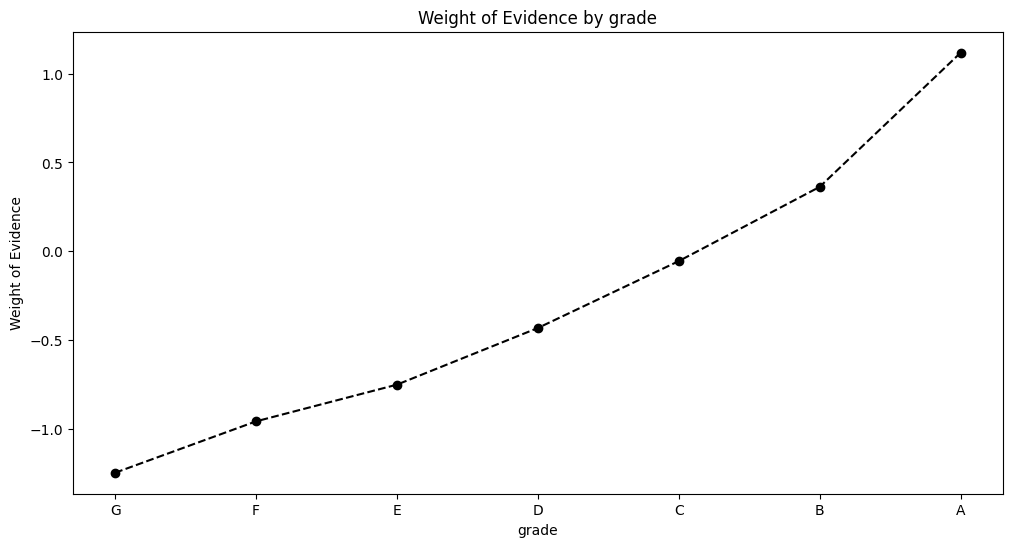

In [200]:
plot_by_woe(df_temp)

In [201]:
df_temp= woe_discrete(df_inputs_prep, 'home_ownership', df_targets_prep)
df_temp

home_ownership  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0          OTHER     34   0.794118    0.000513     27.0     7.0     0.000461   
1           RENT  27223   0.865885    0.410857  23572.0  3651.0     0.402624   
2            OWN   5894   0.891924    0.088954   5257.0   637.0     0.089793   
3       MORTGAGE  33097   0.896758    0.499510  29680.0  3417.0     0.506952   
4           NONE     11   0.909091    0.000166     10.0     1.0     0.000171   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.000908 -0.676979             NaN       NaN  0.020983  
1    0.473357 -0.161847        0.071768  0.515132  0.020983  
2    0.082588  0.083641        0.026039  0.245488  0.020983  
3    0.443018  0.134805        0.004834  0.051164  0.020983  
4    0.000130  0.275680        0.012333  0.140875  0.020983

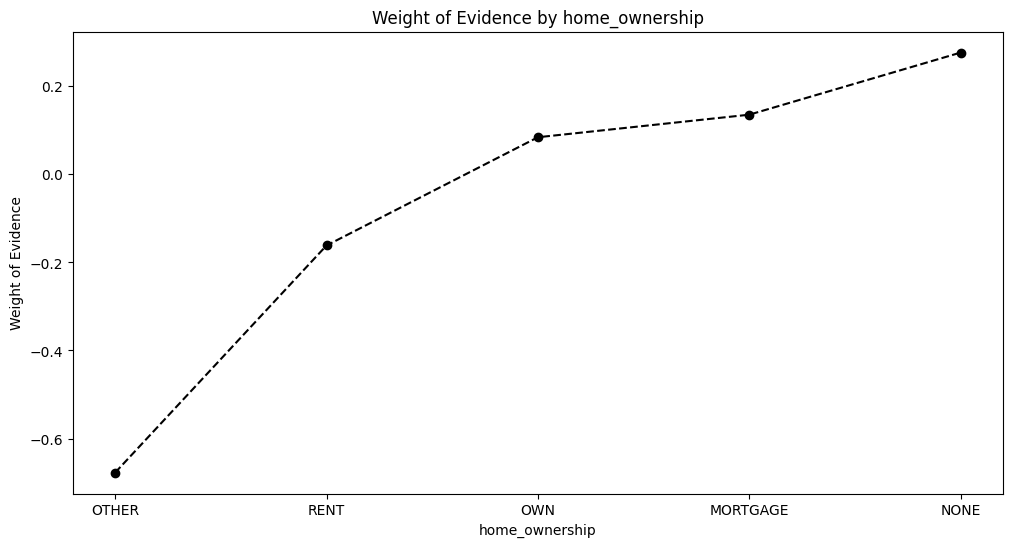

In [202]:
plot_by_woe(df_temp)

In [203]:
df_inputs_prep['home_ownership:RENT_OTHER_NONE_ANY']=sum([df_inputs_prep['home_ownership:RENT'], df_inputs_prep['home_ownership:OTHER'],
                                                          df_inputs_prep['home_ownership:NONE'], df_inputs_prep['home_ownership:ANY']])

In [204]:
'ND' in (df_inputs_prep['addr_state'].unique())

False

In [205]:
df_temp= woe_discrete(df_inputs_prep, 'addr_state', df_targets_prep)
df_temp

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


addr_state  n_obs  prop_good  prop_n_obs  n_good   n_bad  prop_n_good  \
0          NE      1   0.000000    0.000015     0.0     1.0     0.000000   
1          ID      3   0.666667    0.000045     2.0     1.0     0.000034   
2          NV    921   0.856678    0.013900   789.0   132.0     0.013477   
3          FL   4618   0.861845    0.069696  3980.0   638.0     0.067981   
4          HI    375   0.864000    0.005660   324.0    51.0     0.005534   
5          NJ   2589   0.864813    0.039074  2239.0   350.0     0.038243   
6          RI    299   0.866221    0.004513   259.0    40.0     0.004424   
7          AL    868   0.868664    0.013100   754.0   114.0     0.012879   
8          IN    843   0.869514    0.012723   733.0   110.0     0.012520   
9          MI   1609   0.870106    0.024283  1400.0   209.0     0.023913   
10         MD   1548   0.871447    0.023363  1349.0   199.0     0.023042   
11         MO   1047   0.873926    0.015802   915.0   132.0     0.015629   
12         PA   2267   0.875165    0.034214  1984.0   283.0     0.033888   
13         NC   1815   0.875482    0.027393  1589.0   226.0     0.027141   
14         LA    812   0.875616    0.012255   711.0   101.0     0.012144   
15         UT    463   0.876890    0.006988   406.0    57.0     0.006935   
16         KY    632   0.878165    0.009538   555.0    77.0     0.009480   
17         OK    542   0.880074    0.008180   477.0    65.0     0.008147   
18         DE    167   0.880240    0.002520   147.0    20.0     0.002511   
19         AZ   1492   0.880697    0.022518  1314.0   178.0     0.022444   
20         CA  10529   0.880805    0.158907  9274.0  1255.0     0.158405   
21         NY   5867   0.881029    0.088546  5169.0   698.0     0.088290   
22         AR    482   0.885892    0.007274   427.0    55.0     0.007293   
23         NM    360   0.886111    0.005433   319.0    41.0     0.005449   
24         MN   1162   0.887263    0.017537  1031.0   131.0     0.017610   
25         VA   2009   0.887506    0.030320  1783.0   226.0     0.030455   
26         GA   2173   0.889093    0.032796  1932.0   241.0     0.033000   
27         WI    786   0.891858    0.011863   701.0    85.0     0.011973   
28         OH   2084   0.892035    0.031452  1859.0   225.0     0.031753   
29         WA   1466   0.892224    0.022125  1308.0   158.0     0.022341   
30         TX   5128   0.892551    0.077393  4577.0   551.0     0.078178   
31         OR    861   0.895470    0.012994   771.0    90.0     0.013169   
32         CT   1065   0.898592    0.016073   957.0   108.0     0.016346   
33         TN    723   0.900415    0.010912   651.0    72.0     0.011119   
34         MT    202   0.900990    0.003049   182.0    20.0     0.003109   
35         CO   1360   0.904412    0.020526  1230.0   130.0     0.021009   
36         MA   1562   0.904609    0.023574  1413.0   149.0     0.024135   
37         SC    757   0.904888    0.011425   685.0    72.0     0.011700   
38         IL   2611   0.905783    0.039406  2365.0   246.0     0.040396   
39         WY    143   0.909091    0.002158   130.0    13.0     0.002220   
40         WV    345   0.910145    0.005207   314.0    31.0     0.005363   
41         KS    581   0.910499    0.008769   529.0    52.0     0.009036   
42         MS    138   0.913043    0.002083   126.0    12.0     0.002152   
43         SD    111   0.918919    0.001675   102.0     9.0     0.001742   
44         NH    322   0.922360    0.004860   297.0    25.0     0.005073   
45         DC    222   0.923423    0.003350   205.0    17.0     0.003502   
46         VT    132   0.924242    0.001992   122.0    10.0     0.002084   
47         AK    165   0.957576    0.002490   158.0     7.0     0.002699   
48         IA      2   1.000000    0.000030     2.0     0.0     0.000034   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.000130      -inf             NaN       NaN  inf  
1     0.000130 -1.333758        0.666667       inf  inf  
2     0.017114 -0.238941    

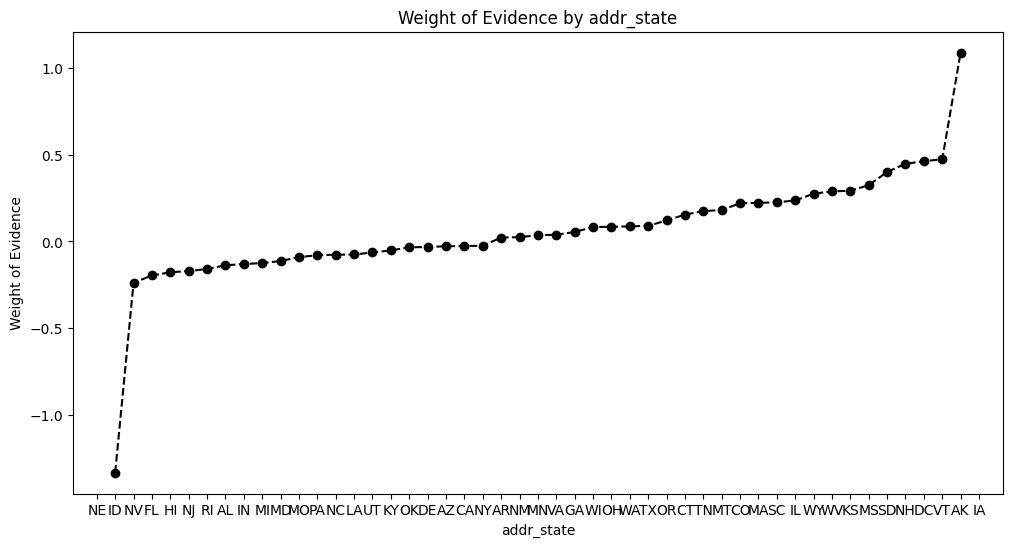

In [206]:
plot_by_woe(df_temp)

In [207]:
if 'addr_state:ND' in df_inputs_prep.columns.values:
  pass
else:
    df_inputs_prep['addr_state:ND']=0

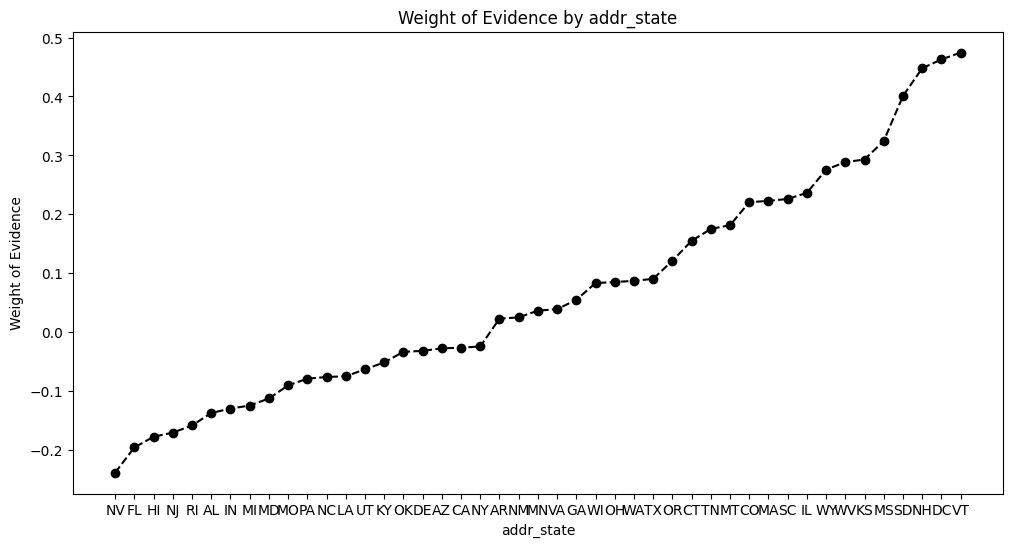

In [208]:
plot_by_woe(df_temp.iloc[2:-2,:])

In [209]:
df_inputs_prep['addr_state:ND_NE_IA_NV_FL_HI_AL']= sum([df_inputs_prep['addr_state:ND'],df_inputs_prep['addr_state:NE'],
                                                        df_inputs_prep['addr_state:IA'],df_inputs_prep['addr_state:NV'],
                                                        df_inputs_prep['addr_state:FL'],df_inputs_prep['addr_state:HI'],
                                                        df_inputs_prep['addr_state:AL']])
df_inputs_prep['addr_state:NM_VA']= sum([df_inputs_prep['addr_state:NM'],df_inputs_prep['addr_state:VA']])
df_inputs_prep['addr_state:OK_TN_MO_LA_MD_NC']= sum([df_inputs_prep['addr_state:OK'],df_inputs_prep['addr_state:TN'],
                                                        df_inputs_prep['addr_state:MO'],df_inputs_prep['addr_state:LA'],
                                                        df_inputs_prep['addr_state:MD'],df_inputs_prep['addr_state:NC']])
df_inputs_prep['addr_state:UT_KY_AZ_NJ']= sum([df_inputs_prep['addr_state:UT'],df_inputs_prep['addr_state:KY'],
                                                        df_inputs_prep['addr_state:AZ'],df_inputs_prep['addr_state:NJ']])
df_inputs_prep['addr_state:AR_MI_PA_OH_MN']= sum([df_inputs_prep['addr_state:AR'],df_inputs_prep['addr_state:MI'],
                                                        df_inputs_prep['addr_state:PA'],df_inputs_prep['addr_state:OH'],
                                                        df_inputs_prep['addr_state:MN']])
df_inputs_prep['addr_state:RI_MA_DE_SD_IN']= sum([df_inputs_prep['addr_state:RI'],df_inputs_prep['addr_state:MA'],
                                                        df_inputs_prep['addr_state:DE'],df_inputs_prep['addr_state:SD'],
                                                        df_inputs_prep['addr_state:IN']])
df_inputs_prep['addr_state:GA_WA_OR']= sum([df_inputs_prep['addr_state:GA'],df_inputs_prep['addr_state:WA'],
                                                        df_inputs_prep['addr_state:OR']])
df_inputs_prep['addr_state:WI_MT']= sum([df_inputs_prep['addr_state:WI'],df_inputs_prep['addr_state:MT']])
df_inputs_prep['addr_state:IL_CT']= sum([df_inputs_prep['addr_state:IL'],df_inputs_prep['addr_state:CT']])
df_inputs_prep['addr_state:KS_SC_CO_VT_AK_MS']= sum([df_inputs_prep['addr_state:KS'],df_inputs_prep['addr_state:SC'],
                                                        df_inputs_prep['addr_state:CO'],df_inputs_prep['addr_state:VT'],
                                                        df_inputs_prep['addr_state:AK'],df_inputs_prep['addr_state:MS']])
df_inputs_prep['addr_state:WV_NH_WY_DC_ME_ID']= sum([df_inputs_prep['addr_state:WV'],df_inputs_prep['addr_state:NH'],
                                                        df_inputs_prep['addr_state:WY'],df_inputs_prep['addr_state:DC'],
                                                        df_inputs_prep['addr_state:ME'],df_inputs_prep['addr_state:ID']])


In [210]:
df_temp= woe_discrete(df_inputs_prep, 'verification_status', df_targets_prep)
df_temp

verification_status  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0            Verified  25736   0.863887    0.388415  22233.0  3503.0   
1     Source Verified  18700   0.895722    0.282226  16750.0  1950.0   
2        Not Verified  21823   0.896440    0.329359  19563.0  2260.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.379753    0.454168 -0.178948             NaN       NaN  0.022836  
1     0.286100    0.252820  0.123663        0.031835  0.302611  0.022836  
2     0.334148    0.293012  0.131370        0.000718  0.007706  0.022836

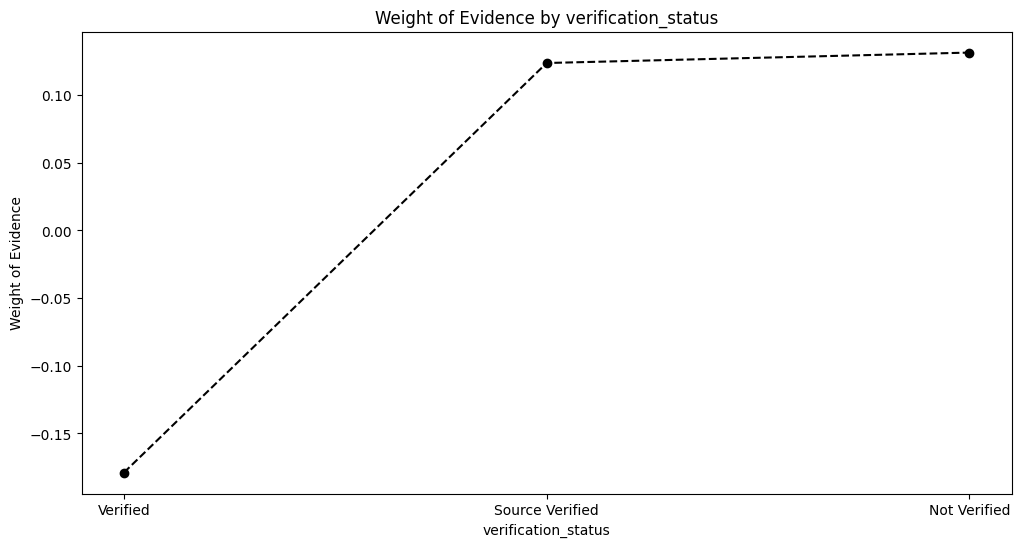

In [211]:
plot_by_woe(df_temp)

In [212]:
df_temp= woe_discrete(df_inputs_prep, 'purpose', df_targets_prep)
df_temp

purpose  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0       small_business   1130   0.756637    0.017054    855.0   275.0   
1          educational     93   0.774194    0.001404     72.0    21.0   
2               moving    494   0.838057    0.007456    414.0    80.0   
3                other   3660   0.853005    0.055238   3122.0   538.0   
4              medical    661   0.859304    0.009976    568.0    93.0   
5     renewable_energy     60   0.866667    0.000906     52.0     8.0   
6                house    396   0.868687    0.005977    344.0    52.0   
7             vacation    352   0.869318    0.005312    306.0    46.0   
8              wedding    495   0.876768    0.007471    434.0    61.0   
9   debt_consolidation  38685   0.880031    0.583845  34044.0  4641.0   
10    home_improvement   3671   0.893490    0.055404   3280.0   391.0   
11      major_purchase   1567   0.902361    0.023650   1414.0   153.0   
12                 car    894   0.904922    0.013493    809.0    85.0   
13         credit_card  14101   0.910006    0.212816  12832.0  1269.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.014604    0.035654 -0.892575             NaN       NaN  0.044815  
1      0.001230    0.002723 -0.794762        0.017556  0.097813  0.044815  
2      0.007071    0.010372 -0.383066        0.063863  0.411696  0.044815  
3      0.053326    0.069752 -0.268535        0.014949  0.114531  0.044815  
4      0.009702    0.012058 -0.217384        0.006299  0.051151  0.044815  
5      0.000888    0.001037 -0.155103        0.007363  0.062280  0.044815  
6      0.005876    0.006742 -0.137508        0.002020  0.017596  0.044815  
7      0.005227    0.005964 -0.131962        0.000631  0.005546  0.044815  
8      0.007413    0.007909 -0.064735        0.007449  0.067227  0.044815  
9      0.581491    0.601711 -0.034182        0.003263  0.030553  0.044815  
10     0.056024    0.050694  0.099986        0.013458  0.134167  0.044815  
11     0.024152    0.019837  0.196834        0.008872  0.096849  0.044815  
12     0.013818    0.011020  0.226242        0.002561  0.029408  0.044815  
13     0.219178    0.164527  0.286807        0.005085  0.060565  0.044815

In [213]:
df_inputs_prep['purpose:educ__sm_b__wedd__ren_en__mov__house']= sum([df_inputs_prep['purpose:educational'],df_inputs_prep['purpose:small_business'],
                                                                 df_inputs_prep['purpose:wedding'], df_inputs_prep['purpose:renewable_energy'],
                                                                 df_inputs_prep['purpose:moving'], df_inputs_prep['purpose:house']])
df_inputs_prep['purpose:oth__med__vacation'] = sum([df_inputs_prep['purpose:other'], df_inputs_prep['purpose:medical'],
                                             df_inputs_prep['purpose:vacation']])
df_inputs_prep['purpose:major_purch__car__home_impr'] = sum([df_inputs_prep['purpose:major_purchase'], df_inputs_prep['purpose:car'],
                                                        df_inputs_prep['purpose:home_improvement']])


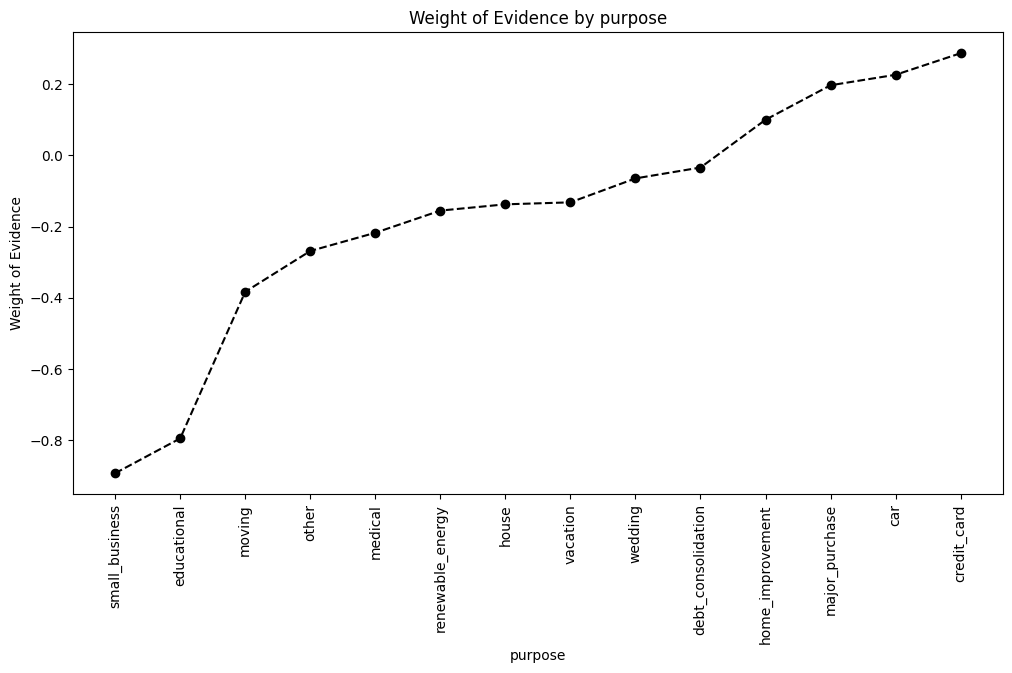

In [214]:
plot_by_woe(df_temp, 90)

In [215]:
df_temp = woe_discrete(df_inputs_prep, 'initial_list_status', df_targets_prep)
df_temp

initial_list_status  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0                   f  47211   0.872127    0.712522  41174.0  6037.0   
1                   w  19048   0.912012    0.287478  17372.0  1676.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.703276    0.782705 -0.107006             NaN       NaN  0.033245  
1     0.296724    0.217295  0.311544        0.039885   0.41855  0.033245

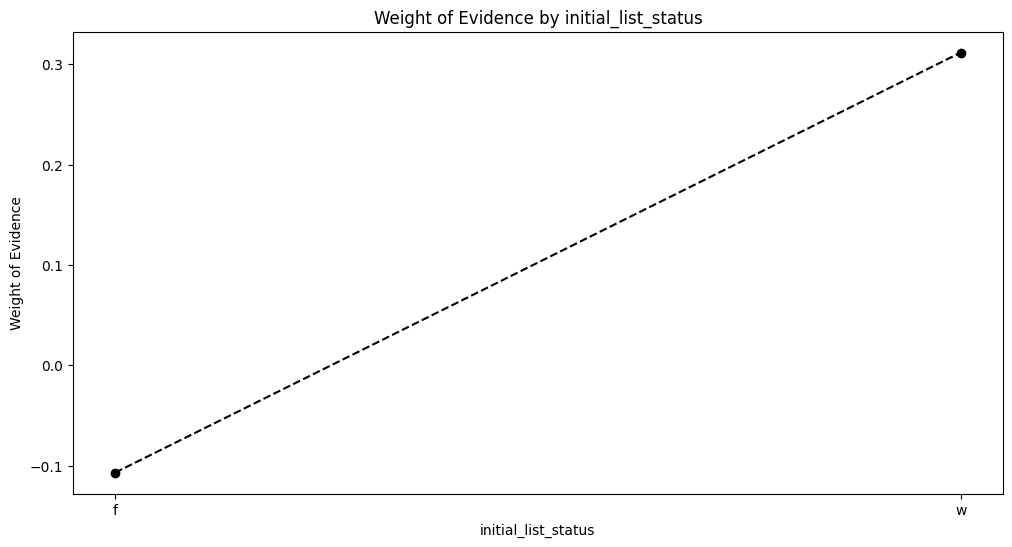

In [216]:
plot_by_woe(df_temp)

In [217]:
def woe_continuous(df, discrete_variable_name, good_bad_variable_df):
    df= pd.concat([df[discrete_variable_name], good_bad_variable_df], axis=1)
    df= pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
                  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)
    df= df.iloc[:,[0,1,3]]
    df.columns=[discrete_variable_name, 'n_obs', 'prop_good']
    df['prop_n_obs']= df['n_obs']/df['n_obs'].sum()
    df['n_good']= df['prop_good']*df['n_obs']
    df['n_bad']= (1-df['prop_good'])*df['n_obs']
    df['prop_n_good']= df['n_good']/df['n_good'].sum()
    df['prop_n_bad']= df['n_bad']/df['n_bad'].sum()
    df['WoE']= np.log(df['prop_n_good']/df['prop_n_bad'])
    #df= df.sort_values(by=['WoE'])
    #df= df.reset_index(drop=True)
    df['diff_prop_good']= df['prop_good'].diff().abs()
    df['diff_WoE']= df['WoE'].diff().abs()
    df['IV']= (df['prop_n_good']-df['prop_n_bad'])*df['WoE']
    df['IV']= df['IV'].sum()
    return df

In [218]:
df_inputs_prep['term'].unique()

array([36., 60.])

In [219]:
df_temp= woe_continuous(df_inputs_prep, 'term', df_targets_prep)
df_temp

term  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0  36.0  48819   0.896475     0.73679  43765.0  5054.0     0.747532   
1  60.0  17440   0.847534     0.26321  14781.0  2659.0     0.252468   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.655257  0.131749             NaN       NaN  0.040902  
1    0.344743 -0.311513         0.04894  0.443262  0.040902

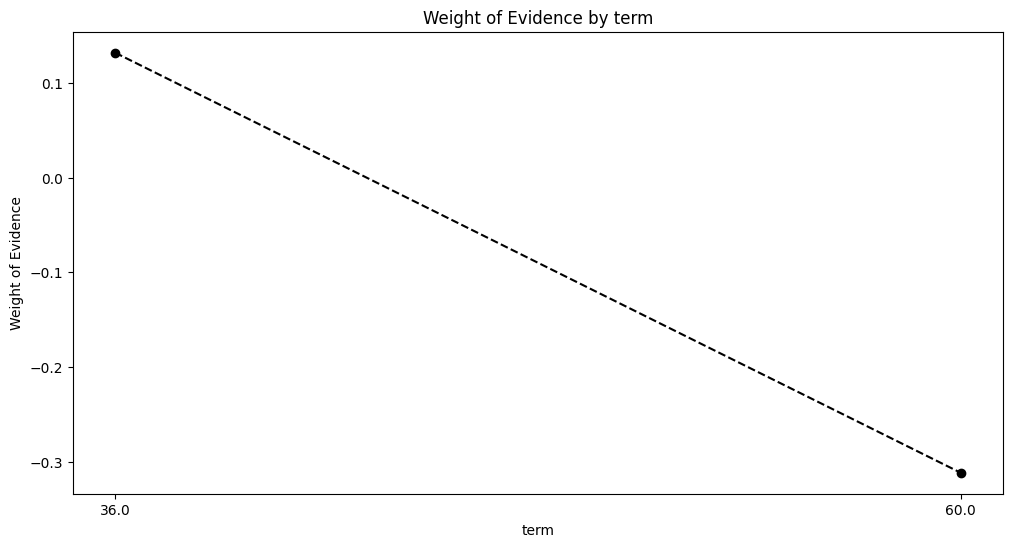

In [220]:
plot_by_woe(df_temp)

In [221]:
df_inputs_prep['term:36']= np.where((df_inputs_prep['term']==36), 1, 0)
df_inputs_prep['term:60']= np.where((df_inputs_prep['term']==60), 1, 0)


In [222]:
df_inputs_prep['emp_length'].unique()

array([ 4.,  7., 10.,  0.,  1.,  2.,  5.,  6.,  8.,  3.,  9.])

In [223]:
df_temp= woe_continuous(df_inputs_prep, 'emp_length', df_targets_prep)
df_temp

emp_length  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0          0.0   2892   0.847856    0.043647   2452.0   440.0     0.041882   
1          1.0   9405   0.875704    0.141943   8236.0  1169.0     0.140676   
2          2.0   5897   0.882822    0.088999   5206.0   691.0     0.088922   
3          3.0   5291   0.881308    0.079853   4663.0   628.0     0.079647   
4          4.0   4079   0.881098    0.061561   3594.0   485.0     0.061388   
5          5.0   4630   0.883153    0.069877   4089.0   541.0     0.069843   
6          6.0   3787   0.883813    0.057154   3347.0   440.0     0.057169   
7          7.0   3697   0.877468    0.055796   3244.0   453.0     0.055409   
8          8.0   3091   0.891944    0.046650   2757.0   334.0     0.047091   
9          9.0   2469   0.888214    0.037263   2193.0   276.0     0.037458   
10        10.0  21021   0.892679    0.317255  18765.0  2256.0     0.320517   

    prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.057047 -0.309021             NaN       NaN  0.008731  
1     0.151562 -0.074539        0.027848  0.234482  0.008731  
2     0.089589 -0.007478        0.007117  0.067061  0.008731  
3     0.081421 -0.022031        0.001514  0.014553  0.008731  
4     0.062881 -0.024033        0.000210  0.002002  0.008731  
5     0.070141 -0.004269        0.002055  0.019764  0.008731  
6     0.057047  0.002139        0.000660  0.006409  0.008731  
7     0.058732 -0.058235        0.006345  0.060375  0.008731  
8     0.043304  0.083852        0.014476  0.142087  0.008731  
9     0.035784  0.045719        0.003731  0.038133  0.008731  
10    0.292493  0.091495        0.004465  0.045775  0.008731

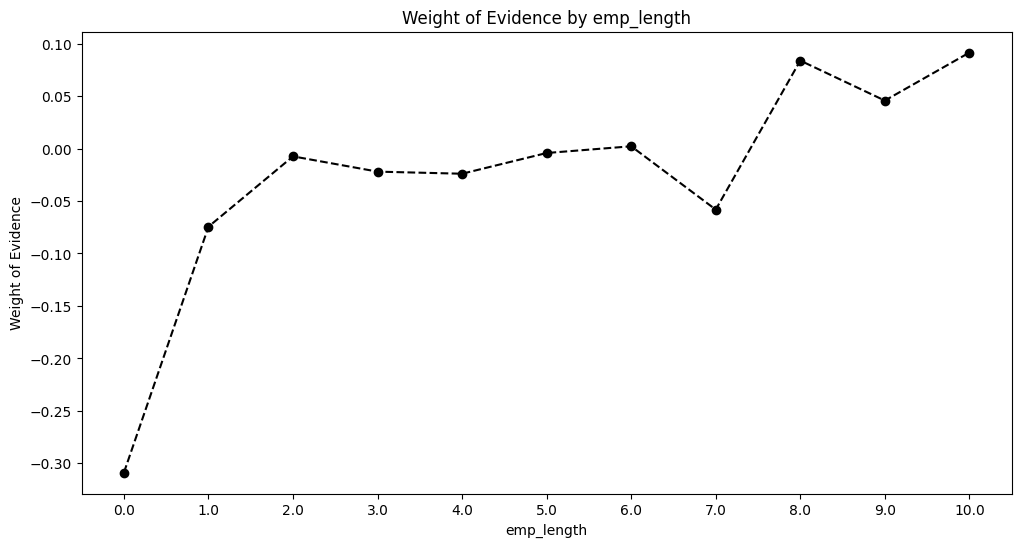

In [224]:
plot_by_woe(df_temp)

In [225]:
df_inputs_prep['emp_length:0']= np.where((df_inputs_prep['emp_length']==0), 1, 0)
df_inputs_prep['emp_length:1']= np.where((df_inputs_prep['emp_length']==1), 1, 0)
df_inputs_prep['emp_length:2-4']= np.where(df_inputs_prep['emp_length'].isin([2,3,4]), 1, 0)
df_inputs_prep['emp_length:5-6']= np.where(df_inputs_prep['emp_length'].isin([5,6]), 1, 0)
df_inputs_prep['emp_length:7-9']= np.where(df_inputs_prep['emp_length'].isin([7,8,9]), 1, 0)
df_inputs_prep['emp_length:10']= np.where((df_inputs_prep['emp_length']==10), 1, 0)

In [226]:
df_inputs_prep['difference_in_months_issued'].unique()

array([122., 123., 158., 135., 137., 189., 177., 140., 141., 176., 133.,
       153., 142., 139., 159., 157., 145., 121., 136., 163., 147., 138.,
       125., 156., 155., 124., 172., 170., 205., 171., 146., 165., 195.,
       175., 162., 148., 134., 149., 144., 167., 188., 192., 174., 152.,
       164., 143., 150., 166., 202., 178., 151., 161., 187., 173., 169.,
       154., 183., 184., 180., 160., 201., 179., 182., 199., 190., 181.,
       168., 185., 207., 186., 197., 203., 209., 206., 191., 193., 204.,
       200., 196., 194., 198., 210., 211., 208.])

In [227]:
df_inputs_prep['difference_in_months_issued_factor']= pd.cut(df_inputs_prep['difference_in_months_issued'], 50)

In [228]:
df_inputs_prep['difference_in_months_issued_factor']

250708    (120.91, 122.8]
276301     (122.8, 124.6]
285264     (122.8, 124.6]
3646       (157.0, 158.8]
81040      (133.6, 135.4]
               ...       
19566      (166.0, 167.8]
295844     (122.8, 124.6]
141340     (139.0, 140.8]
104160     (135.4, 137.2]
283609     (122.8, 124.6]
Name: difference_in_months_issued_factor, Length: 66259, dtype: category
Categories (50, interval[float64, right]): [(120.91, 122.8] < (122.8, 124.6] < (124.6, 126.4] <
                                            (126.4, 128.2] ... (203.8, 205.6] < (205.6, 207.4] <
                                            (207.4, 209.2] < (209.2, 211.0]]

In [229]:
df_temp= woe_continuous(df_inputs_prep, 'difference_in_months_issued_factor', df_targets_prep)
df_temp

<ipython-input-217-352caf08d7aa>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df= pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
<ipython-input-217-352caf08d7aa>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)


difference_in_months_issued_factor  n_obs  prop_good  prop_n_obs  n_good  \
0                     (120.91, 122.8]   7049   0.942403    0.106386  6643.0   
1                      (122.8, 124.6]   9946   0.928112    0.150108  9231.0   
2                      (124.6, 126.4]   3138   0.919057    0.047360  2884.0   
3                      (126.4, 128.2]      0        NaN    0.000000     NaN   
4                      (128.2, 130.0]      0        NaN    0.000000     NaN   
5                      (130.0, 131.8]      0        NaN    0.000000     NaN   
6                      (131.8, 133.6]   2982   0.889671    0.045005  2653.0   
7                      (133.6, 135.4]   5758   0.883987    0.086901  5090.0   
8                      (135.4, 137.2]   5008   0.874401    0.075582  4379.0   
9                      (137.2, 139.0]   4617   0.871345    0.069681  4023.0   
10                     (139.0, 140.8]   2073   0.865895    0.031286  1795.0   
11                     (140.8, 142.6]   3547   0.868339    0.053532  3080.0   
12                     (142.6, 144.4]   2848   0.862360    0.042983  2456.0   
13                     (144.4, 146.2]   2458   0.843369    0.037097  2073.0   
14                     (146.2, 148.0]   2498   0.862290    0.037701  2154.0   
15                     (148.0, 149.8]   1058   0.848771    0.015968   898.0   
16                     (149.8, 151.6]   1742   0.815155    0.026291  1420.0   
17                     (151.6, 153.4]   1342   0.847988    0.020254  1138.0   
18                     (153.4, 155.2]   1107   0.829268    0.016707   918.0   
19                     (155.2, 157.0]    961   0.837669    0.014504   805.0   
20                     (157.0, 158.8]    491   0.853360    0.007410   419.0   
21                     (158.8, 160.6]    761   0.850197    0.011485   647.0   
22                     (160.6, 162.4]    733   0.849932    0.011063   623.0   
23                     (162.4, 164.2]    720   0.848611    0.010866   611.0   
24                     (164.2, 166.0]    597   0.855946    0.009010   511.0   
25                     (166.0, 167.8]    272   0.863971    0.004105   235.0   
26                     (167.8, 169.6]    558   0.858423    0.008421   479.0   
27                     (169.6, 171.4]    498   0.831325    0.007516   414.0   
28                     (171.4, 173.2]    462   0.848485    0.006973   392.0   
29                     (173.2, 175.0]    495   0.858586    0.007471   425.0   
30                     (175.0, 176.8]    191   0.874346    0.002883   167.0   
31                     (176.8, 178.6]    387   0.891473    0.005841   345.0   
32                     (178.6, 180.4]    288   0.885417    0.004347   255.0   
33                     (180.4, 182.2]    291   0.852234    0.004392   248.0   
34                     (182.2, 184.0]    216   0.861111    0.003260   186.0   
35                     (184.0, 185.8]     88   0.886364    0.001328    78.0   
36                     (185.8, 187.6]    156   0.846154    0.002354   132.0   
37                     (187.6, 189.4]    144   0.819444    0.002173   118.0   
38                     (189.4, 191.2]    129   0.852713    0.001947   110.0   
39                     (191.2, 193.0]    120   0.850000    0.001811   102.0   
40                     (193.0, 194.8]     39   0.769231    0.000589    30.0   
41                     (194.8, 196.6]     31   0.806452    0.000468    25.0   
42                     (196.6, 198.4]     50   0.920000    0.000755    46.0   
43                     (198.4, 200.2]     42   0.857143    0.000634    36.0   
44                     (200.2, 202.0]    127   0.771654    0.001917    98.0   
45                     (202.0, 203.8]     63   0.809524    0.000951    51.0   
46                     (203.8, 205.6]     87   0.701149    0.001313    61.0   
47                     (205.6, 207.4]     54   0.629630    0.000815    34.0   
48                     (207.4, 209.2]     23   0.652174    0.000347    15.0   
49                     (209.2, 211.0]     14   0.9285

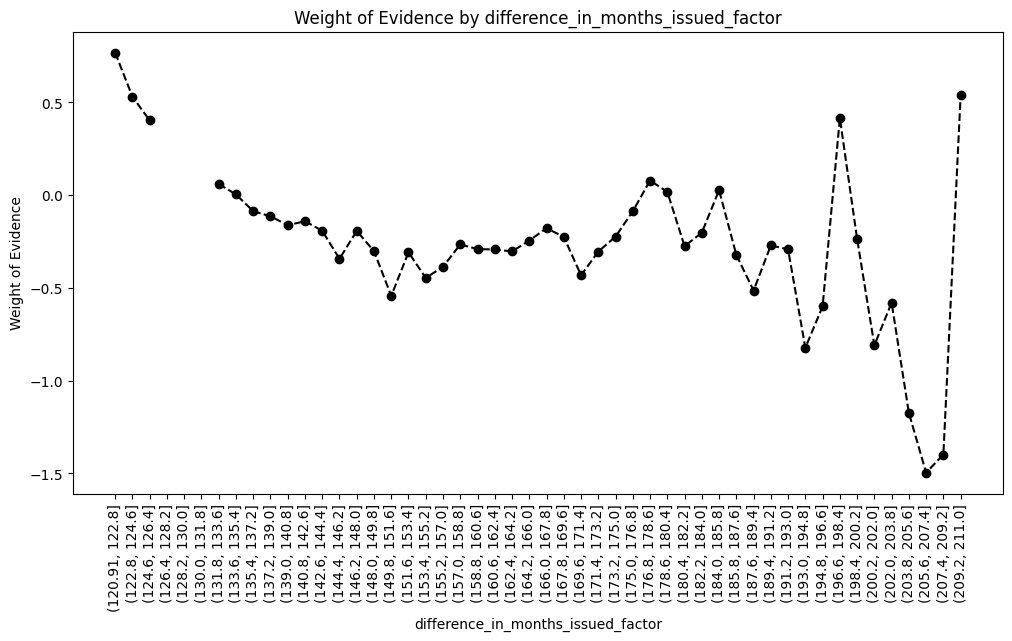

In [230]:
plot_by_woe(df_temp,90)

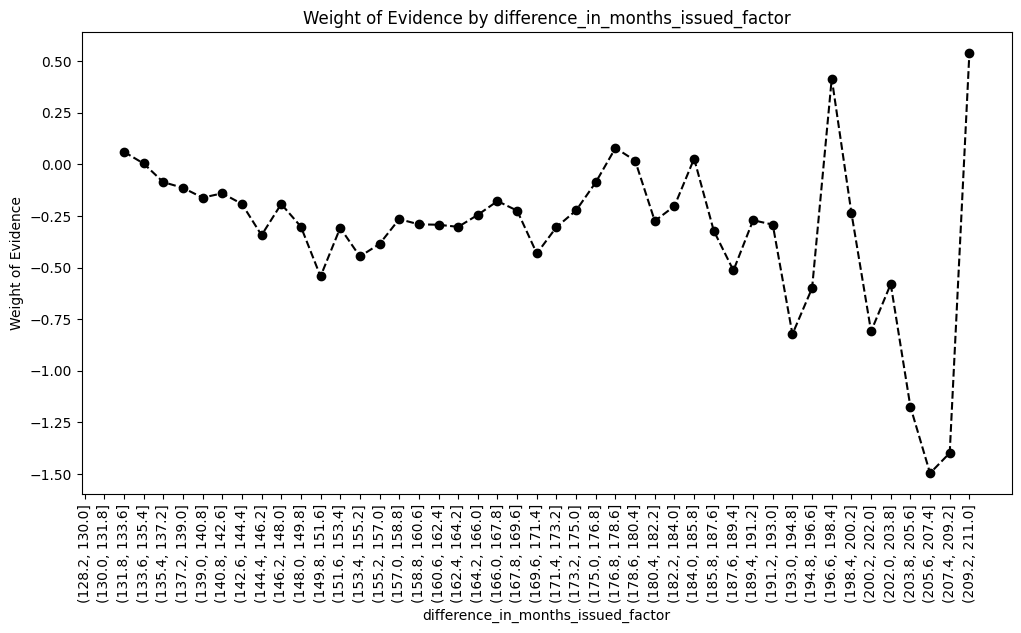

In [231]:
plot_by_woe(df_temp.iloc[3: , : ],90)

In [232]:
df_inputs_prep['difference_in_months_issued<127']= np.where(df_inputs_prep['difference_in_months_issued'].isin(range(0,127)), 1, 0)
df_inputs_prep['difference_in_months_issued:127-134']= np.where(df_inputs_prep['difference_in_months_issued'].isin(range(126,135)), 1, 0)
df_inputs_prep['difference_in_months_issued:134-138']= np.where(df_inputs_prep['difference_in_months_issued'].isin(range(134,139)), 1, 0)
df_inputs_prep['difference_in_months_issued:138-150']= np.where(df_inputs_prep['difference_in_months_issued'].isin(range(138,151)),1,0)
df_inputs_prep['difference_in_months_issued:150-170']= np.where(df_inputs_prep['difference_in_months_issued'].isin(range(150,171)),1,0)
df_inputs_prep['difference_in_months_issued>170']= np.where(df_inputs_prep['difference_in_months_issued'].isin(range(170, 213)),1,0)

In [233]:
df_inputs_prep['int_rate_factor']= pd.cut(df_inputs_prep['int_rate'], 50)
df_inputs_prep['int_rate_factor']

250708     (15.74, 16.153]
276301    (11.612, 12.025]
285264       (8.31, 8.722]
3646        (6.246, 6.658]
81040     (21.519, 21.932]
                ...       
19566     (20.281, 20.694]
295844    (21.932, 22.345]
141340     (12.85, 13.263]
104160    (16.566, 16.978]
283609      (7.071, 7.484]
Name: int_rate_factor, Length: 66259, dtype: category
Categories (50, interval[float64, right]): [(5.399, 5.833] < (5.833, 6.246] < (6.246, 6.658] <
                                            (6.658, 7.071] ... (24.409, 24.822] <
                                            (24.822, 25.234] < (25.234, 25.647] < (25.647, 26.06]]

In [234]:
df_temp= woe_continuous(df_inputs_prep, 'int_rate_factor', df_targets_prep)
df_temp

<ipython-input-217-352caf08d7aa>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df= pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
<ipython-input-217-352caf08d7aa>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)


int_rate_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0     (5.399, 5.833]    207   0.980676    0.003124   203.0    4.0   
1     (5.833, 6.246]   1597   0.982467    0.024102  1569.0   28.0   
2     (6.246, 6.658]   1456   0.975275    0.021974  1420.0   36.0   
3     (6.658, 7.071]    459   0.965142    0.006927   443.0   16.0   
4     (7.071, 7.484]    599   0.968280    0.009040   580.0   19.0   
5     (7.484, 7.897]   2423   0.958729    0.036569  2323.0  100.0   
6      (7.897, 8.31]   1813   0.946498    0.027362  1716.0   97.0   
7      (8.31, 8.722]   1193   0.962280    0.018005  1148.0   45.0   
8     (8.722, 9.135]   1778   0.932508    0.026834  1658.0  120.0   
9     (9.135, 9.548]   1113   0.968553    0.016798  1078.0   35.0   
10    (9.548, 9.961]   1178   0.912564    0.017779  1075.0  103.0   
11   (9.961, 10.374]   2155   0.924826    0.032524  1993.0  162.0   
12  (10.374, 10.786]   1477   0.920785    0.022291  1360.0  117.0   
13  (10.786, 11.199]   3086   0.924174    0.046575  2852.0  234.0   
14  (11.199, 11.612]   1223   0.917416    0.018458  1122.0  101.0   
15  (11.612, 12.025]   2237   0.924452    0.033761  2068.0  169.0   
16  (12.025, 12.438]   3091   0.896150    0.046650  2770.0  321.0   
17   (12.438, 12.85]   1252   0.904153    0.018896  1132.0  120.0   
18   (12.85, 13.263]   4046   0.908057    0.061063  3674.0  372.0   
19  (13.263, 13.676]   2278   0.895522    0.034380  2040.0  238.0   
20  (13.676, 14.089]   1758   0.879977    0.026532  1547.0  211.0   
21  (14.089, 14.502]   4235   0.884298    0.063916  3745.0  490.0   
22  (14.502, 14.914]    489   0.807771    0.007380   395.0   94.0   
23  (14.914, 15.327]   3175   0.876850    0.047918  2784.0  391.0   
24   (15.327, 15.74]   1647   0.889496    0.024857  1465.0  182.0   
25   (15.74, 16.153]   1849   0.851271    0.027906  1574.0  275.0   
26  (16.153, 16.566]   2405   0.838669    0.036297  2017.0  388.0   
27  (16.566, 16.978]    584   0.820205    0.008814   479.0  105.0   
28  (16.978, 17.391]   2146   0.849953    0.032388  1824.0  322.0   
29  (17.391, 17.804]   1970   0.811675    0.029732  1599.0  371.0   
30  (17.804, 18.217]    317   0.829653    0.004784   263.0   54.0   
31   (18.217, 18.63]   1889   0.816834    0.028509  1543.0  346.0   
32   (18.63, 19.042]   1077   0.816156    0.016254   879.0  198.0   
33  (19.042, 19.455]    941   0.802338    0.014202   755.0  186.0   
34  (19.455, 19.868]   1096   0.780109    0.016541   855.0  241.0   
35  (19.868, 20.281]    676   0.862426    0.010202   583.0   93.0   
36  (20.281, 20.694]    518   0.776062    0.007818   402.0  116.0   
37  (20.694, 21.106]    810   0.781481    0.012225   633.0  177.0   
38  (21.106, 21.519]    444   0.702703    0.006701   312.0  132.0   
39  (21.519, 21.932]    220   0.759091    0.003320   167.0   53.0   
40  (21.932, 22.345]    618   0.770227    0.009327   476.0  142.0   
41  (22.345, 22.758]    447   0.695749    0.006746   311.0  136.0   
42   (22.758, 23.17]    350   0.745714    0.005282   261.0   89.0   
43   (23.17, 23.583]    422   0.798578    0.006369   337.0   85.0   
44  (23.583, 23.996]    367   0.683924    0.005539   251.0  116.0   
45  (23.996, 24.409]    225   0.764444    0.003396   172.0   53.0   
46  (24.409, 24.822]    268   0.764925    0.004045   205.0   63.0   
47  (24.822, 25.234]    235   0.774468    0.003547   182.0   53.0   
48  (25.234, 25.647]    127   0.724409    0.001917    92.0   35.0   
49   (25.647, 26.06]    293   0.730375    0.004422   214.0   79.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.003467    0.000519  1.900006             NaN       NaN  0.390349  
1      0.026799    0.003630  1.999084        0.001791  0.099078  0.390349  
2      0.024254    0.004667  1.647988        0.007192  0.351096  0.390349  
3      0.007567    0.002074  1.294075        0.010133  0.353912  0.390349  
4      0.009907    0.002463  1.391684        0.003139  0.097608  0.390349  
5      0.039678    0.012965  

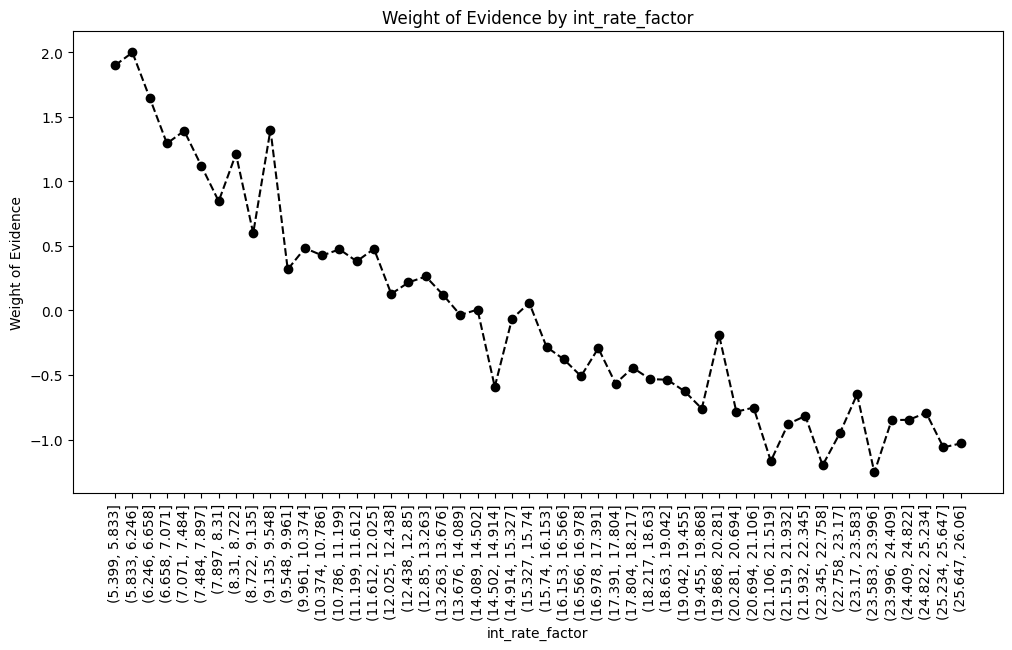

In [235]:
plot_by_woe(df_temp, 90)

In [236]:
df_inputs_prep['int_rate:<9.548']= np.where(df_inputs_prep['int_rate']<=9.548,1,0)
df_inputs_prep['int_rate:9.548-12.025']= np.where((df_inputs_prep['int_rate']>9.548)&(df_inputs_prep['int_rate']<=12.025),1,0)
df_inputs_prep['int_rate:12.025-15.74']= np.where((df_inputs_prep['int_rate']>12.025)&(df_inputs_prep['int_rate']<=15.74),1,0)
df_inputs_prep['int_rate:15.74-20.281']= np.where((df_inputs_prep['int_rate']>15.74)&(df_inputs_prep['int_rate']<=20.281),1,0)
df_inputs_prep['int_rate>20.281']= np.where(df_inputs_prep['int_rate']>20.281,1,0)

In [237]:
df_inputs_prep['funded_amnt_factor']= pd.cut(df_inputs_prep['funded_amnt'], 50)
df_inputs_prep['funded_amnt_factor']

250708    (12984.0, 13672.0]
276301      (4728.0, 5416.0]
285264    (18488.0, 19176.0]
3646        (5416.0, 6104.0]
81040     (23992.0, 24680.0]
                 ...        
19566     (21928.0, 22616.0]
295844     (9544.0, 10232.0]
141340     (9544.0, 10232.0]
104160    (17800.0, 18488.0]
283609      (1976.0, 2664.0]
Name: funded_amnt_factor, Length: 66259, dtype: category
Categories (50, interval[float64, right]): [(565.6, 1288.0] < (1288.0, 1976.0] < (1976.0, 2664.0] <
                                            (2664.0, 3352.0] ... (32248.0, 32936.0] <
                                            (32936.0, 33624.0] < (33624.0, 34312.0] <
                                            (34312.0, 35000.0]]

In [238]:
df_temp= woe_continuous(df_inputs_prep, 'funded_amnt_factor', df_targets_prep)
df_temp

<ipython-input-217-352caf08d7aa>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df= pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
<ipython-input-217-352caf08d7aa>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)


funded_amnt_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0      (565.6, 1288.0]    416   0.896635    0.006278   373.0   43.0   
1     (1288.0, 1976.0]    527   0.874763    0.007954   461.0   66.0   
2     (1976.0, 2664.0]   1265   0.890909    0.019092  1127.0  138.0   
3     (2664.0, 3352.0]   1411   0.885188    0.021295  1249.0  162.0   
4     (3352.0, 4040.0]   1768   0.882353    0.026683  1560.0  208.0   
5     (4040.0, 4728.0]    792   0.872475    0.011953   691.0  101.0   
6     (4728.0, 5416.0]   3042   0.888889    0.045911  2704.0  338.0   
7     (5416.0, 6104.0]   2998   0.890927    0.045247  2671.0  327.0   
8     (6104.0, 6792.0]   1168   0.890411    0.017628  1040.0  128.0   
9     (6792.0, 7480.0]   2119   0.888155    0.031981  1882.0  237.0   
10    (7480.0, 8168.0]   3172   0.890605    0.047873  2825.0  347.0   
11    (8168.0, 8856.0]   1214   0.871499    0.018322  1058.0  156.0   
12    (8856.0, 9544.0]   1670   0.886826    0.025204  1481.0  189.0   
13   (9544.0, 10232.0]   5939   0.883819    0.089633  5249.0  690.0   
14  (10232.0, 10920.0]    994   0.857143    0.015002   852.0  142.0   
15  (10920.0, 11608.0]   1493   0.878768    0.022533  1312.0  181.0   
16  (11608.0, 12296.0]   4094   0.897167    0.061788  3673.0  421.0   
17  (12296.0, 12984.0]    785   0.878981    0.011847   690.0   95.0   
18  (12984.0, 13672.0]   1183   0.890110    0.017854  1053.0  130.0   
19  (13672.0, 14360.0]   1437   0.883786    0.021688  1270.0  167.0   
20  (14360.0, 15048.0]   4187   0.893957    0.063191  3743.0  444.0   
21  (15048.0, 15736.0]    517   0.868472    0.007803   449.0   68.0   
22  (15736.0, 16424.0]   2097   0.888889    0.031649  1864.0  233.0   
23  (16424.0, 17112.0]   1194   0.876047    0.018020  1046.0  148.0   
24  (17112.0, 17800.0]    635   0.853543    0.009584   542.0   93.0   
25  (17800.0, 18488.0]   1985   0.863980    0.029958  1715.0  270.0   
26  (18488.0, 19176.0]    693   0.855700    0.010459   593.0  100.0   
27  (19176.0, 19864.0]    658   0.843465    0.009931   555.0  103.0   
28  (19864.0, 20552.0]   3682   0.893536    0.055570  3290.0  392.0   
29  (20552.0, 21240.0]   1205   0.889627    0.018186  1072.0  133.0   
30  (21240.0, 21928.0]    413   0.837772    0.006233   346.0   67.0   
31  (21928.0, 22616.0]    704   0.887784    0.010625   625.0   79.0   
32  (22616.0, 23304.0]    424   0.891509    0.006399   378.0   46.0   
33  (23304.0, 23992.0]    376   0.816489    0.005675   307.0   69.0   
34  (23992.0, 24680.0]   1764   0.886621    0.026623  1564.0  200.0   
35  (24680.0, 25368.0]   1791   0.882189    0.027030  1580.0  211.0   
36  (25368.0, 26056.0]    340   0.867647    0.005131   295.0   45.0   
37  (26056.0, 26744.0]    215   0.832558    0.003245   179.0   36.0   
38  (26744.0, 27432.0]    229   0.868996    0.003456   199.0   30.0   
39  (27432.0, 28120.0]   1055   0.907109    0.015922   957.0   98.0   
40  (28120.0, 28808.0]    135   0.866667    0.002037   117.0   18.0   
41  (28808.0, 29496.0]    191   0.890052    0.002883   170.0   21.0   
42  (29496.0, 30184.0]   1225   0.881633    0.018488  1080.0  145.0   
43  (30184.0, 30872.0]     69   0.826087    0.001041    57.0   12.0   
44  (30872.0, 31560.0]    126   0.873016    0.001902   110.0   16.0   
45  (31560.0, 32248.0]    209   0.875598    0.003154   183.0   26.0   
46  (32248.0, 32936.0]    114   0.868421    0.001721    99.0   15.0   
47  (32936.0, 33624.0]    155   0.870968    0.002339   135.0   20.0   
48  (33624.0, 34312.0]     89   0.865169    0.001343    77.0   12.0   
49  (34312.0, 35000.0]   2295   0.870588    0.034637  1998.0  297.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.006371    0.005575  0.133473             NaN       NaN  0.014925  
1      0.007874    0.008557 -0.083162        0.021872  0.216635  0.014925  
2      0.019250    0.017892  0.073155        0.016146  0.156318  0.014925  
3      0.021334    0.021004  0.015597        0.005721  0.057559  0.014925  
4 

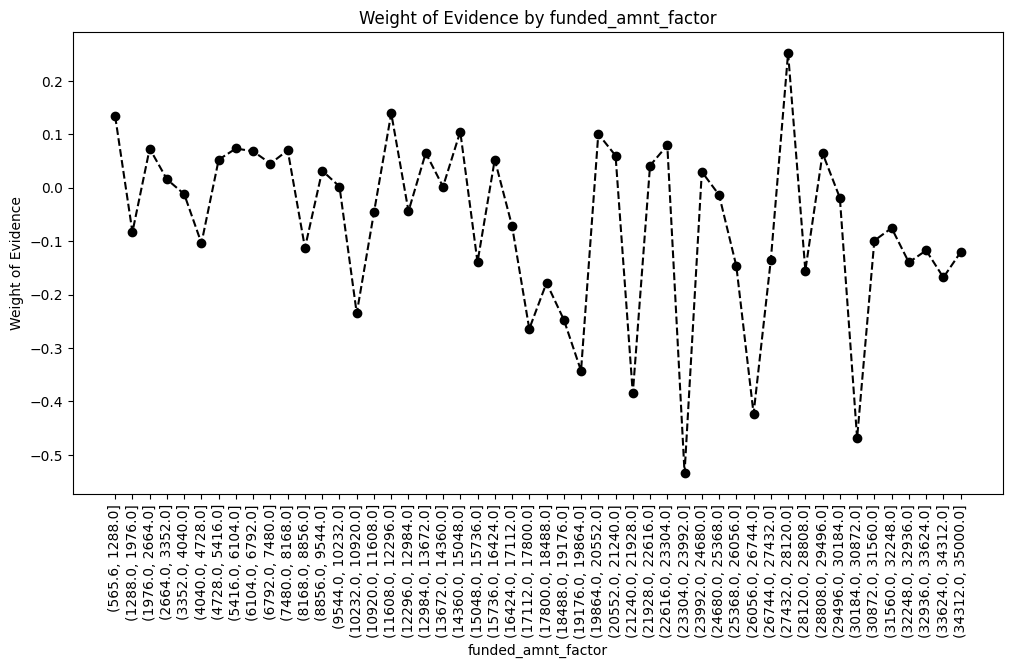

In [239]:
plot_by_woe(df_temp, 90)

In [240]:
df_inputs_prep['difference_in_months_crline_factor']= pd.cut(df_inputs_prep['difference_in_months_crline'], 50)
df_inputs_prep['difference_in_months_crline_factor']

250708    (241.92, 255.36]
276301    (215.04, 228.48]
285264    (362.88, 376.32]
3646      (416.64, 430.08]
81040     (309.12, 322.56]
                ...       
19566     (228.48, 241.92]
295844     (255.36, 268.8]
141340    (376.32, 389.76]
104160     (403.2, 416.64]
283609    (349.44, 362.88]
Name: difference_in_months_crline_factor, Length: 66259, dtype: category
Categories (50, interval[float64, right]): [(-0.672, 13.44] < (13.44, 26.88] < (26.88, 40.32] <
                                            (40.32, 53.76] ... (618.24, 631.68] <
                                            (631.68, 645.12] < (645.12, 658.56] < (658.56, 672.0]]

In [241]:
df_temp= woe_continuous(df_inputs_prep, 'difference_in_months_crline_factor', df_targets_prep)
df_temp

<ipython-input-217-352caf08d7aa>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df= pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
<ipython-input-217-352caf08d7aa>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)


difference_in_months_crline_factor  n_obs  prop_good  prop_n_obs  n_good  \
0                     (-0.672, 13.44]      5   1.000000    0.000075     5.0   
1                      (13.44, 26.88]      0        NaN    0.000000     NaN   
2                      (26.88, 40.32]      0        NaN    0.000000     NaN   
3                      (40.32, 53.76]      0        NaN    0.000000     NaN   
4                       (53.76, 67.2]      0        NaN    0.000000     NaN   
5                       (67.2, 80.64]      0        NaN    0.000000     NaN   
6                      (80.64, 94.08]      0        NaN    0.000000     NaN   
7                     (94.08, 107.52]      0        NaN    0.000000     NaN   
8                    (107.52, 120.96]      0        NaN    0.000000     NaN   
9                     (120.96, 134.4]      0        NaN    0.000000     NaN   
10                    (134.4, 147.84]      0        NaN    0.000000     NaN   
11                   (147.84, 161.28]     30   0.800000    0.000453    24.0   
12                   (161.28, 174.72]    247   0.935223    0.003728   231.0   
13                   (174.72, 188.16]    489   0.875256    0.007380   428.0   
14                    (188.16, 201.6]    832   0.856971    0.012557   713.0   
15                    (201.6, 215.04]   1844   0.853579    0.027830  1574.0   
16                   (215.04, 228.48]   2407   0.855422    0.036327  2059.0   
17                   (228.48, 241.92]   2706   0.866593    0.040840  2345.0   
18                   (241.92, 255.36]   3780   0.882540    0.057049  3336.0   
19                    (255.36, 268.8]   3948   0.892857    0.059584  3525.0   
20                    (268.8, 282.24]   5202   0.880623    0.078510  4581.0   
21                   (282.24, 295.68]   5507   0.877066    0.083113  4830.0   
22                   (295.68, 309.12]   5625   0.869511    0.084894  4891.0   
23                   (309.12, 322.56]   4484   0.874442    0.067674  3921.0   
24                    (322.56, 336.0]   3957   0.873642    0.059720  3457.0   
25                    (336.0, 349.44]   3605   0.894868    0.054408  3226.0   
26                   (349.44, 362.88]   3309   0.890299    0.049940  2946.0   
27                   (362.88, 376.32]   3180   0.893396    0.047993  2841.0   
28                   (376.32, 389.76]   2089   0.903303    0.031528  1887.0   
29                    (389.76, 403.2]   1727   0.891720    0.026064  1540.0   
30                    (403.2, 416.64]   1667   0.905219    0.025159  1509.0   
31                   (416.64, 430.08]   1690   0.897633    0.025506  1517.0   
32                   (430.08, 443.52]   1296   0.892747    0.019560  1157.0   
33                   (443.52, 456.96]   1097   0.908842    0.016556   997.0   
34                    (456.96, 470.4]    966   0.899586    0.014579   869.0   
35                    (470.4, 483.84]    850   0.898824    0.012828   764.0   
36                   (483.84, 497.28]    755   0.915232    0.011395   691.0   
37                   (497.28, 510.72]    489   0.910020    0.007380   445.0   
38                   (510.72, 524.16]    422   0.907583    0.006369   383.0   
39                    (524.16, 537.6]    298   0.892617    0.004498   266.0   
40                    (537.6, 551.04]    330   0.933333    0.004980   308.0   
41                   (551.04, 564.48]    287   0.891986    0.004331   256.0   
42                   (564.48, 577.92]    256   0.878906    0.003864   225.0   
43                   (577.92, 591.36]    174   0.902299    0.002626   157.0   
44                    (591.36, 604.8]    133   0.939850    0.002007   125.0   
45                    (604.8, 618.24]    115   0.930435    0.001736   107.0   
46                   (618.24, 631.68]    106   0.905660    0.001600    96.0   
47                   (631.68, 645.12]     72   0.930556    0.001087    67.0   
48                   (645.12, 658.56]     70   0.842857    0.001056    59.0   
49                    (658.56, 672.0]    213   0.8826

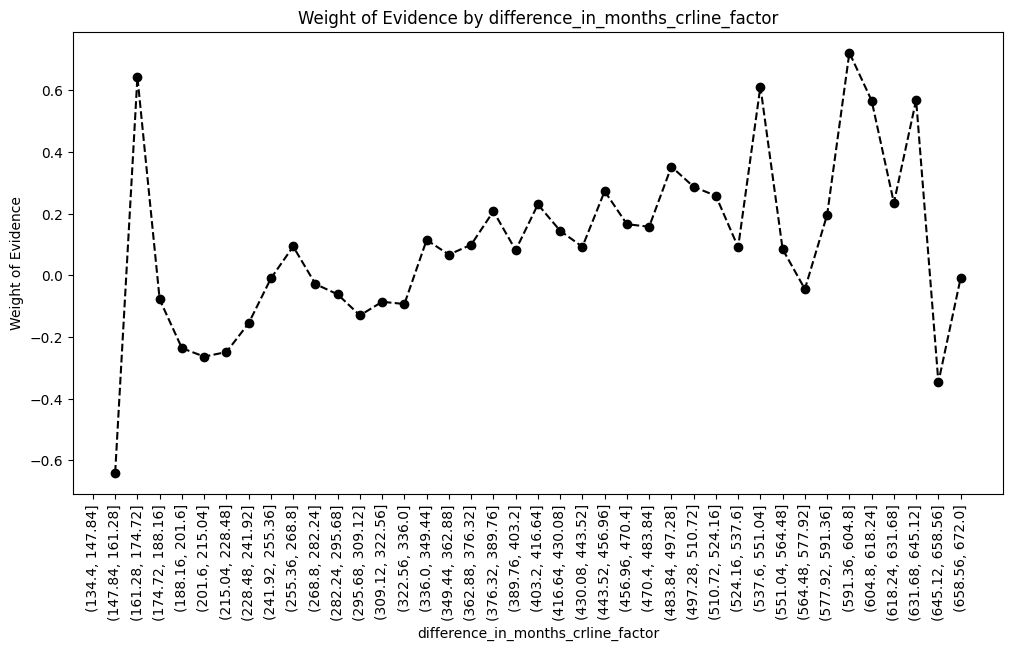

In [242]:
plot_by_woe(df_temp, 90)

In [243]:
df_temp= woe_continuous(df_inputs_prep, 'delinq_2yrs', df_targets_prep)
df_temp

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


delinq_2yrs  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0           0.0  55247   0.882111    0.833804  48734.0  6513.0     0.832405   
1           1.0   7497   0.890223    0.113147   6674.0   823.0     0.113996   
2           2.0   2109   0.888099    0.031830   1873.0   236.0     0.031992   
3           3.0    742   0.894879    0.011198    664.0    78.0     0.011342   
4           4.0    315   0.933333    0.004754    294.0    21.0     0.005022   
5           5.0    163   0.852761    0.002460    139.0    24.0     0.002374   
6           6.0     85   0.964706    0.001283     82.0     3.0     0.001401   
7           7.0     42   0.857143    0.000634     36.0     6.0     0.000615   
8           8.0     22   0.863636    0.000332     19.0     3.0     0.000325   
9           9.0     15   0.933333    0.000226     14.0     1.0     0.000239   
10         10.0      8   0.875000    0.000121      7.0     1.0     0.000120   
11         11.0      3   1.000000    0.000045      3.0     0.0     0.000051   
12         12.0      5   0.800000    0.000075      4.0     1.0     0.000068   
13         13.0      3   0.333333    0.000045      1.0     2.0     0.000017   
14         17.0      1   0.000000    0.000015      0.0     1.0     0.000000   
15         18.0      1   1.000000    0.000015      1.0     0.0     0.000017   
16         22.0      1   1.000000    0.000015      1.0     0.0     0.000017   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.844419 -0.014329             NaN       NaN  inf  
1     0.106703  0.066113        0.008112  0.080442  inf  
2     0.030598  0.044559        0.002124  0.021554  inf  
3     0.010113  0.114668        0.006780  0.070108  inf  
4     0.002723  0.612152        0.038455  0.497484  inf  
5     0.003112 -0.270485        0.080573  0.882637  inf  
6     0.000389  1.281201        0.111945  1.551687  inf  
7     0.000778 -0.235146        0.107563  1.516347  inf  
8     0.000389 -0.181079        0.006494  0.054067  inf  
9     0.000130  0.612152        0.069697  0.793231  inf  
10    0.000130 -0.080995        0.058333  0.693147  inf  
11    0.000000       inf        0.125000       inf  inf  
12    0.000130 -0.640611        0.200000       inf  inf  
13    0.000259 -2.720053        0.466667  2.079442  inf  
14    0.000130      -inf        0.333333       inf  inf  
15    0.000000       inf        1.000000       inf  inf  
16    0.000000       inf        0.000000       NaN  inf

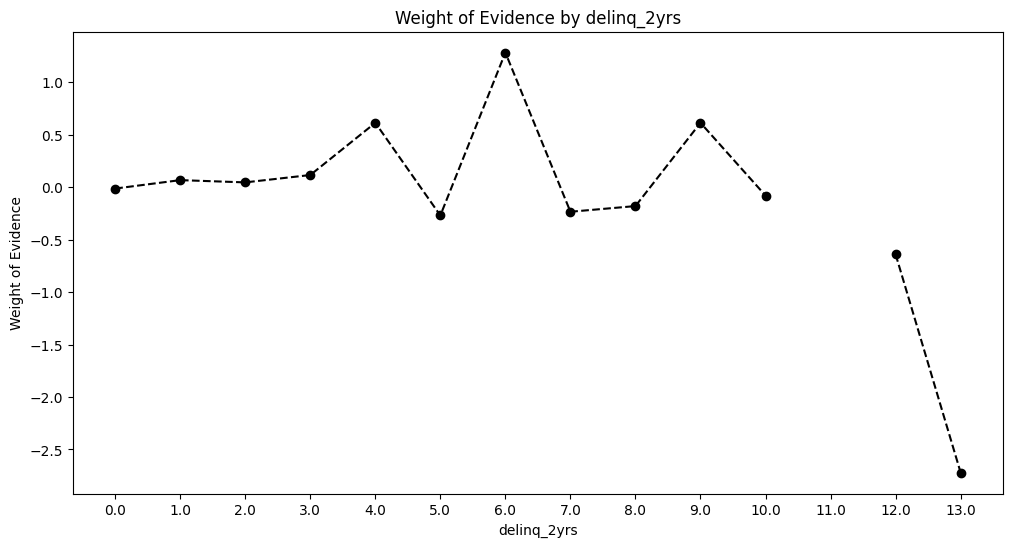

In [244]:
plot_by_woe(df_temp)

In [245]:
df_inputs_prep['delinq_2yrs:0'] = np.where((df_inputs_prep['delinq_2yrs'] == 0), 1, 0)
df_inputs_prep['delinq_2yrs:1-3'] = np.where((df_inputs_prep['delinq_2yrs'] >= 1) & (df_inputs_prep['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prep['delinq_2yrs:>=4'] = np.where((df_inputs_prep['delinq_2yrs'] >= 9), 1, 0)

In [246]:
df_temp = woe_continuous(df_inputs_prep, 'inq_last_6mths', df_targets_prep)
df_temp

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


inq_last_6mths  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0              0.0  34738   0.905003    0.524276  31438.0  3300.0   
1              1.0  18406   0.875258    0.277789  16110.0  2296.0   
2              2.0   7952   0.849598    0.120014   6756.0  1196.0   
3              3.0   3636   0.829758    0.054876   3017.0   619.0   
4              4.0    902   0.821508    0.013613    741.0   161.0   
5              5.0    376   0.795213    0.005675    299.0    77.0   
6              6.0    150   0.806667    0.002264    121.0    29.0   
7              7.0     42   0.595238    0.000634     25.0    17.0   
8              8.0     22   0.636364    0.000332     14.0     8.0   
9              9.0     10   0.700000    0.000151      7.0     3.0   
10            10.0      6   1.000000    0.000091      6.0     0.0   
11            11.0      9   0.777778    0.000136      7.0     2.0   
12            12.0      2   0.500000    0.000030      1.0     1.0   
13            13.0      2   0.500000    0.000030      1.0     1.0   
14            14.0      2   0.000000    0.000030      0.0     2.0   
15            15.0      1   1.000000    0.000015      1.0     0.0   
16            16.0      1   1.000000    0.000015      1.0     0.0   
17            19.0      1   1.000000    0.000015      1.0     0.0   
18            20.0      1   0.000000    0.000015      0.0     1.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.536979    0.427849  0.227189             NaN       NaN  inf  
1      0.275168    0.297679 -0.078634        0.029745  0.305823  inf  
2      0.115396    0.155063 -0.295457        0.025660  0.216823  inf  
3      0.051532    0.080254 -0.442993        0.019840  0.147535  inf  
4      0.012657    0.020874 -0.500309        0.008250  0.057317  inf  
5      0.005107    0.009983 -0.670267        0.026295  0.169958  inf  
6      0.002067    0.003760 -0.598411        0.011454  0.071857  inf  
7      0.000427    0.002204 -1.641243        0.211429  1.042832  inf  
8      0.000239    0.001037 -1.467290        0.041126  0.173953  inf  
9      0.000120    0.000389 -1.179608        0.063636  0.287682  inf  
10     0.000102    0.000000       inf        0.300000       inf  inf  
11     0.000120    0.000259 -0.774143        0.222222       inf  inf  
12     0.000017    0.000130 -2.026906        0.277778  1.252763  inf  
13     0.000017    0.000130 -2.026906        0.000000  0.000000  inf  
14     0.000000    0.000259      -inf        0.500000       inf  inf  
15     0.000017    0.000000       inf        1.000000       inf  inf  
16     0.000017    0.000000       inf        0.000000       NaN  inf  
17     0.000017    0.000000       inf        0.000000       NaN  inf  
18     0.000000    0.000130      -inf        1.000000       inf  inf

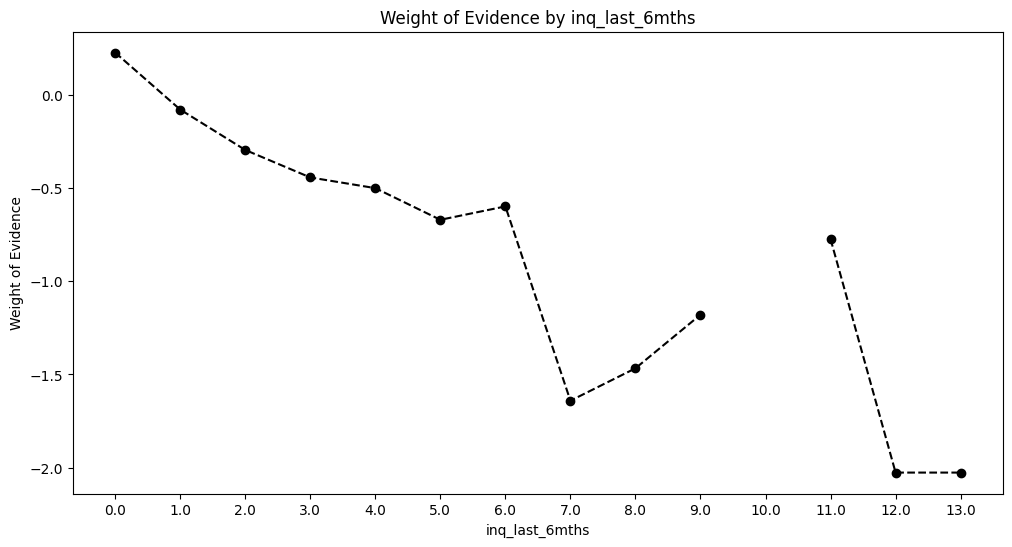

In [247]:
plot_by_woe(df_temp)

In [248]:
df_inputs_prep['inq_last_6mths:0'] = np.where((df_inputs_prep['inq_last_6mths'] == 0), 1, 0)
df_inputs_prep['inq_last_6mths:1-2'] = np.where((df_inputs_prep['inq_last_6mths'] >= 1) & (df_inputs_prep['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prep['inq_last_6mths:3-6'] = np.where((df_inputs_prep['inq_last_6mths'] >= 3) & (df_inputs_prep['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prep['inq_last_6mths:>6'] = np.where((df_inputs_prep['inq_last_6mths'] > 6), 1, 0)

In [249]:
df_temp = woe_continuous(df_inputs_prep, 'open_acc', df_targets_prep)
df_temp

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


open_acc  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0        0.0      5   1.000000    0.000075     5.0    0.0     0.000085   
1        1.0     15   0.866667    0.000226    13.0    2.0     0.000222   
2        2.0    276   0.807971    0.004165   223.0   53.0     0.003809   
3        3.0    892   0.846413    0.013462   755.0  137.0     0.012896   
4        4.0   1868   0.884368    0.028192  1652.0  216.0     0.028217   
5        5.0   3231   0.892293    0.048763  2883.0  348.0     0.049243   
6        6.0   4587   0.887290    0.069228  4070.0  517.0     0.069518   
7        7.0   5385   0.879851    0.081272  4738.0  647.0     0.080928   
8        8.0   5952   0.882224    0.089829  5251.0  701.0     0.089690   
9        9.0   6490   0.883359    0.097949  5733.0  757.0     0.097923   
10      10.0   5992   0.873999    0.090433  5237.0  755.0     0.089451   
11      11.0   5524   0.891383    0.083370  4924.0  600.0     0.084105   
12      12.0   4749   0.878080    0.071673  4170.0  579.0     0.071226   
13      13.0   4238   0.884379    0.063961  3748.0  490.0     0.064018   
14      14.0   3468   0.888697    0.052340  3082.0  386.0     0.052642   
15      15.0   2843   0.892015    0.042907  2536.0  307.0     0.043316   
16      16.0   2298   0.886858    0.034682  2038.0  260.0     0.034810   
17      17.0   1847   0.883595    0.027875  1632.0  215.0     0.027876   
18      18.0   1460   0.885616    0.022035  1293.0  167.0     0.022085   
19      19.0   1254   0.881180    0.018926  1105.0  149.0     0.018874   
20      20.0    988   0.890688    0.014911   880.0  108.0     0.015031   
21      21.0    743   0.892328    0.011214   663.0   80.0     0.011324   
22      22.0    507   0.889546    0.007652   451.0   56.0     0.007703   
23      23.0    403   0.910670    0.006082   367.0   36.0     0.006269   
24      24.0    278   0.888489    0.004196   247.0   31.0     0.004219   
25      25.0    236   0.877119    0.003562   207.0   29.0     0.003536   
26      26.0    155   0.909677    0.002339   141.0   14.0     0.002408   
27      27.0    142   0.901408    0.002143   128.0   14.0     0.002186   
28      28.0     94   0.861702    0.001419    81.0   13.0     0.001384   
29      29.0     75   0.853333    0.001132    64.0   11.0     0.001093   
30      30.0     54   0.796296    0.000815    43.0   11.0     0.000734   
31      31.0     39   0.897436    0.000589    35.0    4.0     0.000598   
32      32.0     37   0.945946    0.000558    35.0    2.0     0.000598   
33      33.0     26   0.884615    0.000392    23.0    3.0     0.000393   
34      34.0     27   0.962963    0.000407    26.0    1.0     0.000444   
35      35.0     11   0.909091    0.000166    10.0    1.0     0.000171   
36      36.0     18   0.777778    0.000272    14.0    4.0     0.000239   
37      37.0     10   0.700000    0.000151     7.0    3.0     0.000120   
38      38.0      7   0.571429    0.000106     4.0    3.0     0.000068   
39      39.0      8   0.875000    0.000121     7.0    1.0     0.000120   
40      40.0      5   1.000000    0.000075     5.0    0.0     0.000085   
41      41.0      5   1.000000    0.000075     5.0    0.0     0.000085   
42      42.0      1   1.000000    0.000015     1.0    0.0     0.000017   
43      43.0      2   1.000000    0.000030     2.0    0.0     0.000034   
44      44.0      2   1.000000    0.000030     2.0    0.0     0.000034   
45      45.0      3   0.666667    0.000045     2.0    1.0     0.000034   
46      46.0      2   1.000000    0.000030     2.0    0.0     0.000034   
47      49.0      2   1.000000    0.000030     2.0    0.0     0.000034   
48      50.0      1   1.000000    0.000015     1.0    0.0     0.000017   
49      51.0      1   1.000000    0.000015     1.0    0.0     0.000017   
50      58.0      2   1.000000    0.000030     2.0    0.0     0.000034   
51      76.0      1   0.000000    0.000015     0.0    1.0     0.000000   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.000000       in

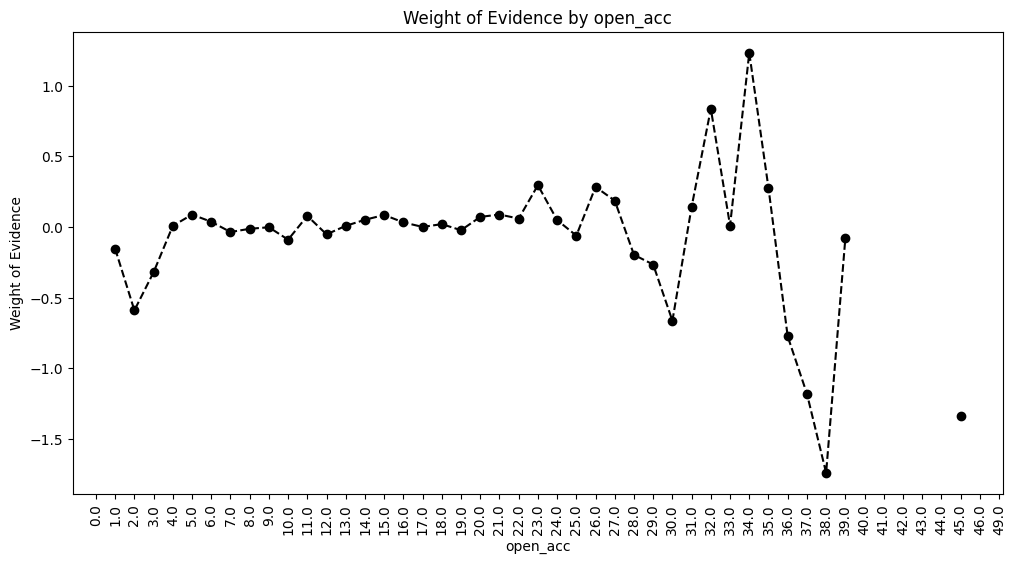

In [250]:
plot_by_woe(df_temp, 90)

In [251]:
df_inputs_prep['open_acc:0'] = np.where((df_inputs_prep['open_acc'] == 0), 1, 0)
df_inputs_prep['open_acc:1-3'] = np.where((df_inputs_prep['open_acc'] >= 1) & (df_inputs_prep['open_acc'] <= 3), 1, 0)
df_inputs_prep['open_acc:4-12'] = np.where((df_inputs_prep['open_acc'] >= 4) & (df_inputs_prep['open_acc'] <= 12), 1, 0)
df_inputs_prep['open_acc:13-17'] = np.where((df_inputs_prep['open_acc'] >= 13) & (df_inputs_prep['open_acc'] <= 17), 1, 0)
df_inputs_prep['open_acc:18-22'] = np.where((df_inputs_prep['open_acc'] >= 18) & (df_inputs_prep['open_acc'] <= 22), 1, 0)
df_inputs_prep['open_acc:23-25'] = np.where((df_inputs_prep['open_acc'] >= 23) & (df_inputs_prep['open_acc'] <= 25), 1, 0)
df_inputs_prep['open_acc:26-30'] = np.where((df_inputs_prep['open_acc'] >= 26) & (df_inputs_prep['open_acc'] <= 30), 1, 0)
df_inputs_prep['open_acc:>=31'] = np.where((df_inputs_prep['open_acc'] >= 31), 1, 0)

In [252]:
df_temp = woe_continuous(df_inputs_prep, 'pub_rec', df_targets_prep)
df_temp

pub_rec  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0       0.0  58875   0.882769    0.888559  51973.0  6902.0     0.887729   
1       1.0   6467   0.888666    0.097602   5747.0   720.0     0.098162   
2       2.0    624   0.892628    0.009418    557.0    67.0     0.009514   
3       3.0    172   0.936047    0.002596    161.0    11.0     0.002750   
4       4.0     61   0.885246    0.000921     54.0     7.0     0.000922   
5       5.0     30   0.866667    0.000453     26.0     4.0     0.000444   
6       6.0     13   0.846154    0.000196     11.0     2.0     0.000188   
7       7.0      4   1.000000    0.000060      4.0     0.0     0.000068   
8       8.0      3   1.000000    0.000045      3.0     0.0     0.000051   
9       9.0      3   1.000000    0.000045      3.0     0.0     0.000051   
10     10.0      4   1.000000    0.000060      4.0     0.0     0.000068   
11     11.0      2   1.000000    0.000030      2.0     0.0     0.000034   
12     49.0      1   1.000000    0.000015      1.0     0.0     0.000017   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.894853 -0.007992             NaN       NaN  inf  
1     0.093349  0.050276        0.005897  0.058269  inf  
2     0.008687  0.090967        0.003963  0.040691  inf  
3     0.001426  0.656604        0.043418  0.565636  inf  
4     0.000908  0.016168        0.050801  0.640435  inf  
5     0.000519 -0.155103        0.018579  0.171272  inf  
6     0.000259 -0.322157        0.020513  0.167054  inf  
7     0.000000       inf        0.153846       inf  inf  
8     0.000000       inf        0.000000       NaN  inf  
9     0.000000       inf        0.000000       NaN  inf  
10    0.000000       inf        0.000000       NaN  inf  
11    0.000000       inf        0.000000       NaN  inf  
12    0.000000       inf        0.000000       NaN  inf

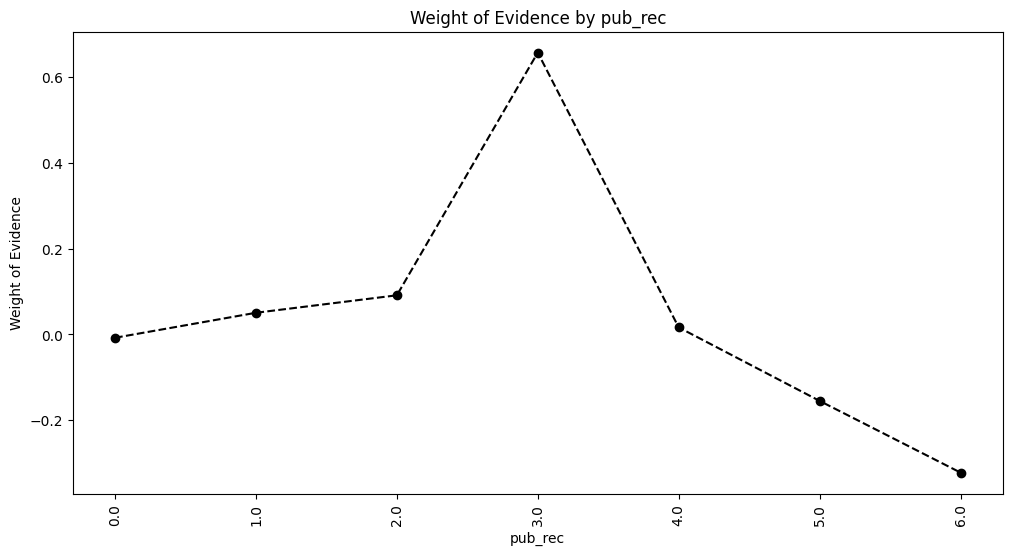

In [253]:
plot_by_woe(df_temp, 90)

In [254]:
df_inputs_prep['pub_rec:0-2'] = np.where((df_inputs_prep['pub_rec'] >= 0) & (df_inputs_prep['pub_rec'] <= 2), 1, 0)
df_inputs_prep['pub_rec:3-4'] = np.where((df_inputs_prep['pub_rec'] >= 3) & (df_inputs_prep['pub_rec'] <= 4), 1, 0)
df_inputs_prep['pub_rec:>=5'] = np.where((df_inputs_prep['pub_rec'] >= 5), 1, 0)

In [255]:
df_inputs_prep['total_acc_factor'] = pd.cut(df_inputs_prep['total_acc'], 50)
df_temp = woe_continuous(df_inputs_prep, 'total_acc_factor', df_targets_prep)
df_temp

<ipython-input-217-352caf08d7aa>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df= pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
<ipython-input-217-352caf08d7aa>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)


total_acc_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0     (-0.117, 2.34]     13   0.846154    0.000196    11.0    2.0   
1       (2.34, 4.68]    302   0.811258    0.004558   245.0   57.0   
2       (4.68, 7.02]   1643   0.859404    0.024797  1412.0  231.0   
3       (7.02, 9.36]   2038   0.869971    0.030758  1773.0  265.0   
4       (9.36, 11.7]   3062   0.869040    0.046213  2661.0  401.0   
5      (11.7, 14.04]   5684   0.873153    0.085785  4963.0  721.0   
6     (14.04, 16.38]   4412   0.879873    0.066587  3882.0  530.0   
7     (16.38, 18.72]   4823   0.883268    0.072790  4260.0  563.0   
8     (18.72, 21.06]   7271   0.884885    0.109736  6434.0  837.0   
9      (21.06, 23.4]   4735   0.877086    0.071462  4153.0  582.0   
10     (23.4, 25.74]   4664   0.888937    0.070390  4146.0  518.0   
11    (25.74, 28.08]   6077   0.892710    0.091716  5425.0  652.0   
12    (28.08, 30.42]   3650   0.887123    0.055087  3238.0  412.0   
13    (30.42, 32.76]   3112   0.894923    0.046967  2785.0  327.0   
14     (32.76, 35.1]   3923   0.894214    0.059207  3508.0  415.0   
15     (35.1, 37.44]   2090   0.892823    0.031543  1866.0  224.0   
16    (37.44, 39.78]   1773   0.895657    0.026759  1588.0  185.0   
17    (39.78, 42.12]   2070   0.897101    0.031241  1857.0  213.0   
18    (42.12, 44.46]   1068   0.864232    0.016119   923.0  145.0   
19     (44.46, 46.8]    783   0.878672    0.011817   688.0   95.0   
20     (46.8, 49.14]    983   0.878942    0.014836   864.0  119.0   
21    (49.14, 51.48]    447   0.883669    0.006746   395.0   52.0   
22    (51.48, 53.82]    367   0.912807    0.005539   335.0   32.0   
23    (53.82, 56.16]    402   0.917910    0.006067   369.0   33.0   
24     (56.16, 58.5]    192   0.901042    0.002898   173.0   19.0   
25     (58.5, 60.84]    145   0.889655    0.002188   129.0   16.0   
26    (60.84, 63.18]    339   0.846608    0.005116   287.0   52.0   
27    (63.18, 65.52]     40   0.950000    0.000604    38.0    2.0   
28    (65.52, 67.86]     25   1.000000    0.000377    25.0    0.0   
29     (67.86, 70.2]     32   0.906250    0.000483    29.0    3.0   
30     (70.2, 72.54]     17   0.941176    0.000257    16.0    1.0   
31    (72.54, 74.88]     19   0.947368    0.000287    18.0    1.0   
32    (74.88, 77.22]     22   0.863636    0.000332    19.0    3.0   
33    (77.22, 79.56]      5   0.600000    0.000075     3.0    2.0   
34     (79.56, 81.9]      8   0.875000    0.000121     7.0    1.0   
35     (81.9, 84.24]      6   1.000000    0.000091     6.0    0.0   
36    (84.24, 86.58]      2   1.000000    0.000030     2.0    0.0   
37    (86.58, 88.92]      1   1.000000    0.000015     1.0    0.0   
38    (88.92, 91.26]      7   0.857143    0.000106     6.0    1.0   
39     (91.26, 93.6]      1   1.000000    0.000015     1.0    0.0   
40     (93.6, 95.94]      1   1.000000    0.000015     1.0    0.0   
41    (95.94, 98.28]      3   0.666667    0.000045     2.0    1.0   
42   (98.28, 100.62]      0        NaN    0.000000     NaN    NaN   
43  (100.62, 102.96]      1   1.000000    0.000015     1.0    0.0   
44   (102.96, 105.3]      0        NaN    0.000000     NaN    NaN   
45   (105.3, 107.64]      0        NaN    0.000000     NaN    NaN   
46  (107.64, 109.98]      0        NaN    0.000000     NaN    NaN   
47  (109.98, 112.32]      0        NaN    0.000000     NaN    NaN   
48  (112.32, 114.66]      0        NaN    0.000000     NaN    NaN   
49   (114.66, 117.0]      1   1.000000    0.000015     1.0    0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.000188    0.000259 -0.322157             NaN       NaN  inf  
1      0.004185    0.007390 -0.568699        0.034896  0.246541  inf  
2      0.024118    0.029949 -0.216561        0.048145  0.352138  inf  
3      0.030284    0.034358 -0.126207        0.010567  0.090354  inf  
4      0.045451    0.051990 -0.134410        0.000931  0.008203  inf  
5      0.084771    0.093479 -0.097779        0.004113  0.0

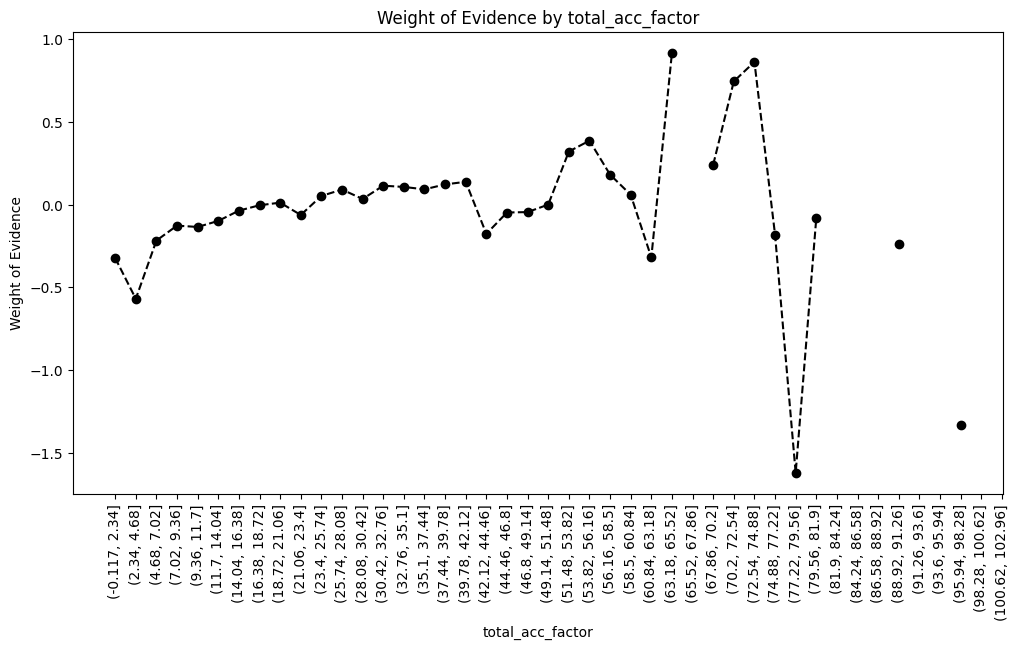

In [256]:
plot_by_woe(df_temp, 90)

In [257]:
df_inputs_prep['total_acc:<=27'] = np.where((df_inputs_prep['total_acc'] <= 27), 1, 0)
df_inputs_prep['total_acc:28-51'] = np.where((df_inputs_prep['total_acc'] >= 28) & (df_inputs_prep['total_acc'] <= 51), 1, 0)
df_inputs_prep['total_acc:>=52'] = np.where((df_inputs_prep['total_acc'] >= 52), 1, 0)

In [258]:
df_temp = woe_continuous(df_inputs_prep, 'acc_now_delinq', df_targets_prep)
df_temp

acc_now_delinq  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0             0.0  66048   0.883524    0.996816  58355.0  7693.0     0.996738   
1             1.0    193   0.901554    0.002913    174.0    19.0     0.002972   
2             2.0     15   0.933333    0.000226     14.0     1.0     0.000239   
3             3.0      3   1.000000    0.000045      3.0     0.0     0.000051   

   prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0    0.997407 -0.000671             NaN       NaN  inf  
1    0.002463  0.187711        0.018030  0.188382  inf  
2    0.000130  0.612152        0.031779  0.424441  inf  
3    0.000000       inf        0.066667       inf  inf

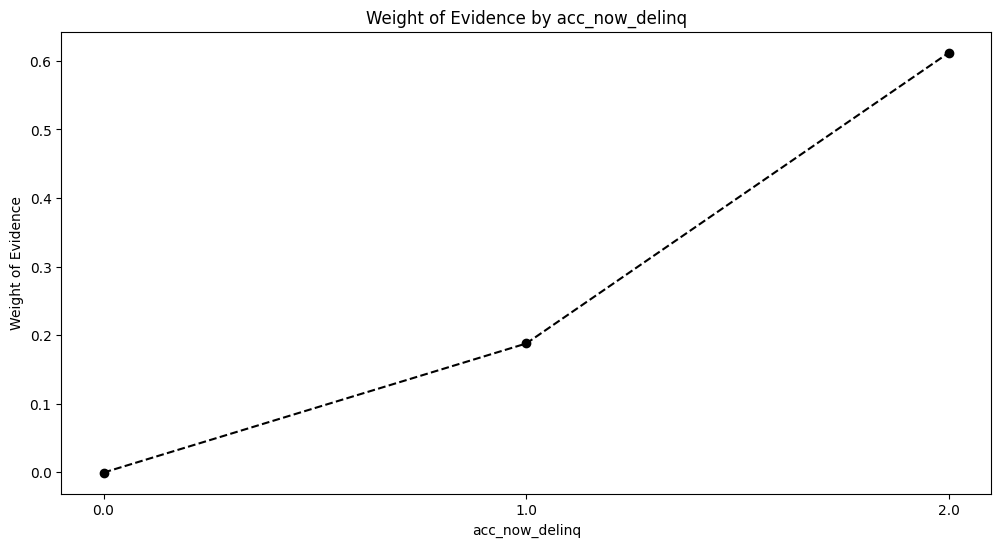

In [259]:
plot_by_woe(df_temp)

In [260]:
df_inputs_prep['acc_now_delinq:0'] = np.where((df_inputs_prep['acc_now_delinq'] == 0), 1, 0)
df_inputs_prep['acc_now_delinq:>=1'] = np.where((df_inputs_prep['acc_now_delinq'] >= 1), 1, 0)

In [261]:
df_inputs_prep['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prep['total_rev_hi_lim'], 2000)
df_temp = woe_continuous(df_inputs_prep, 'total_rev_hi_lim_factor', df_targets_prep)
df_temp

<ipython-input-217-352caf08d7aa>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df= pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
<ipython-input-217-352caf08d7aa>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


total_rev_hi_lim_factor  n_obs  prop_good  prop_n_obs  n_good  \
0            (-9999.999, 5000.0]   3952   0.859565    0.059645  3397.0   
1             (5000.0, 9999.999]   9753   0.869374    0.147195  8479.0   
2          (9999.999, 14999.998]  10882   0.871347    0.164234  9482.0   
3         (14999.998, 19999.998]   9223   0.868481    0.139196  8010.0   
4         (19999.998, 24999.997]   7402   0.873683    0.111713  6467.0   
...                          ...    ...        ...         ...     ...   
1995  (9974999.002, 9979999.002]      0        NaN    0.000000     NaN   
1996  (9979999.002, 9984999.002]      0        NaN    0.000000     NaN   
1997  (9984999.002, 9989999.001]      0        NaN    0.000000     NaN   
1998    (9989999.001, 9994999.0]      0        NaN    0.000000     NaN   
1999      (9994999.0, 9999999.0]      1   1.000000    0.000015     1.0   

       n_bad  prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      555.0     0.058023    0.071956 -0.215226             NaN       NaN  inf  
1     1274.0     0.144826    0.165176 -0.131475        0.009809  0.083751  inf  
2     1400.0     0.161958    0.181512 -0.113983        0.001974  0.017492  inf  
3     1213.0     0.136815    0.157267 -0.139311        0.002866  0.025329  inf  
4      935.0     0.110460    0.121224 -0.092984        0.005202  0.046327  inf  
...      ...          ...         ...       ...             ...       ...  ...  
1995     NaN          NaN         NaN       NaN             NaN       NaN  inf  
1996     NaN          NaN         NaN       NaN             NaN       NaN  inf  
1997     NaN          NaN         NaN       NaN             NaN       NaN  inf  
1998     NaN          NaN         NaN       NaN             NaN       NaN  inf  
1999     0.0     0.000017    0.000000       inf             NaN       NaN  inf  

[2000 rows x 12 columns]

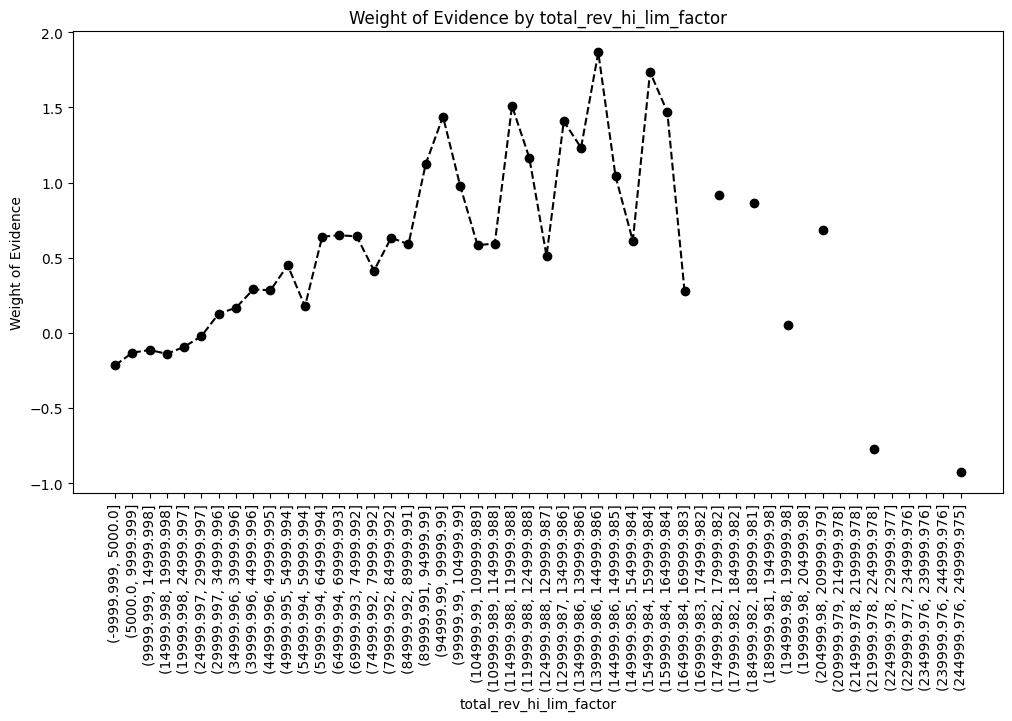

In [262]:
plot_by_woe(df_temp.iloc[: 50, : ], 90)

In [263]:
df_inputs_prep['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prep['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prep['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prep['total_rev_hi_lim'] > 5000) & (df_inputs_prep['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prep['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prep['total_rev_hi_lim'] > 10000) & (df_inputs_prep['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prep['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prep['total_rev_hi_lim'] > 20000) & (df_inputs_prep['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prep['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prep['total_rev_hi_lim'] > 30000) & (df_inputs_prep['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prep['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prep['total_rev_hi_lim'] > 40000) & (df_inputs_prep['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prep['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prep['total_rev_hi_lim'] > 55000) & (df_inputs_prep['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prep['total_rev_hi_lim:>95K'] = np.where((df_inputs_prep['total_rev_hi_lim'] > 95000), 1, 0)

In [264]:
df_inputs_prep['installment_factor'] = pd.cut(df_inputs_prep['installment'], 50)
df_temp = woe_continuous(df_inputs_prep, 'installment_factor', df_targets_prep)
df_temp


<ipython-input-217-352caf08d7aa>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df= pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
<ipython-input-217-352caf08d7aa>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)


installment_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0       (18.834, 47.945]    514   0.887160    0.007757   456.0   58.0   
1       (47.945, 75.669]   1084   0.894834    0.016360   970.0  114.0   
2      (75.669, 103.394]   1576   0.886421    0.023785  1397.0  179.0   
3     (103.394, 131.118]   1679   0.880881    0.025340  1479.0  200.0   
4     (131.118, 158.843]   2112   0.889678    0.031875  1879.0  233.0   
5     (158.843, 186.568]   2960   0.883784    0.044673  2616.0  344.0   
6     (186.568, 214.292]   3002   0.892072    0.045307  2678.0  324.0   
7     (214.292, 242.017]   2619   0.896144    0.039527  2347.0  272.0   
8     (242.017, 269.741]   3345   0.893871    0.050484  2990.0  355.0   
9     (269.741, 297.466]   3341   0.887758    0.050423  2966.0  375.0   
10    (297.466, 325.191]   3596   0.890434    0.054272  3202.0  394.0   
11    (325.191, 352.915]   4429   0.882140    0.066844  3907.0  522.0   
12     (352.915, 380.64]   3212   0.885430    0.048476  2844.0  368.0   
13     (380.64, 408.364]   3191   0.885929    0.048159  2827.0  364.0   
14    (408.364, 436.089]   2327   0.883971    0.035120  2057.0  270.0   
15    (436.089, 463.814]   2223   0.873594    0.033550  1942.0  281.0   
16    (463.814, 491.538]   2914   0.890528    0.043979  2595.0  319.0   
17    (491.538, 519.263]   2572   0.867418    0.038817  2231.0  341.0   
18    (519.263, 546.987]   2001   0.862069    0.030200  1725.0  276.0   
19    (546.987, 574.712]   1861   0.866738    0.028087  1613.0  248.0   
20    (574.712, 602.437]   1621   0.877853    0.024465  1423.0  198.0   
21    (602.437, 630.161]   1602   0.893258    0.024178  1431.0  171.0   
22    (630.161, 657.886]   1490   0.897987    0.022488  1338.0  152.0   
23     (657.886, 685.61]   1703   0.874339    0.025702  1489.0  214.0   
24     (685.61, 713.335]   1071   0.875817    0.016164   938.0  133.0   
25     (713.335, 741.06]    826   0.881356    0.012466   728.0   98.0   
26     (741.06, 768.784]    893   0.888018    0.013477   793.0  100.0   
27    (768.784, 796.509]    855   0.884211    0.012904   756.0   99.0   
28    (796.509, 824.233]    706   0.889518    0.010655   628.0   78.0   
29    (824.233, 851.958]    574   0.867596    0.008663   498.0   76.0   
30    (851.958, 879.683]    751   0.889481    0.011334   668.0   83.0   
31    (879.683, 907.407]    515   0.871845    0.007773   449.0   66.0   
32    (907.407, 935.132]    366   0.860656    0.005524   315.0   51.0   
33    (935.132, 962.856]    406   0.849754    0.006127   345.0   61.0   
34    (962.856, 990.581]    317   0.817035    0.004784   259.0   58.0   
35   (990.581, 1018.306]    310   0.845161    0.004679   262.0   48.0   
36   (1018.306, 1046.03]    226   0.880531    0.003411   199.0   27.0   
37   (1046.03, 1073.755]    131   0.862595    0.001977   113.0   18.0   
38  (1073.755, 1101.479]    170   0.900000    0.002566   153.0   17.0   
39  (1101.479, 1129.204]    154   0.941558    0.002324   145.0    9.0   
40  (1129.204, 1156.929]    160   0.925000    0.002415   148.0   12.0   
41  (1156.929, 1184.653]    171   0.918129    0.002581   157.0   14.0   
42  (1184.653, 1212.378]    157   0.910828    0.002369   143.0   14.0   
43  (1212.378, 1240.102]    216   0.893519    0.003260   193.0   23.0   
44  (1240.102, 1267.827]    127   0.850394    0.001917   108.0   19.0   
45  (1267.827, 1295.552]    101   0.891089    0.001524    90.0   11.0   
46  (1295.552, 1323.276]     46   0.695652    0.000694    32.0   14.0   
47  (1323.276, 1351.001]     21   0.761905    0.000317    16.0    5.0   
48  (1351.001, 1378.725]     14   0.500000    0.000211     7.0    7.0   
49   (1378.725, 1406.45]      1   1.000000    0.000015     1.0    0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.007789    0.007520  0.035144             NaN       NaN  inf  
1      0.016568    0.014780  0.114192        0.007674  0.079048  inf  
2      0.023862    0.023208  0.027791        0.008413  0.086401  inf 

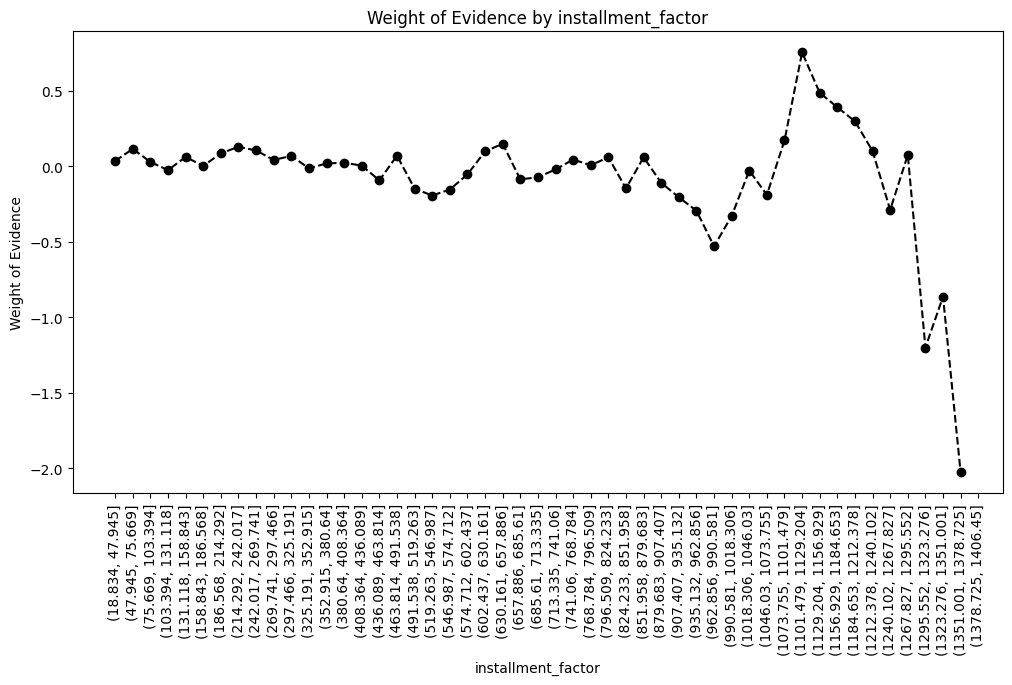

In [265]:
plot_by_woe(df_temp, 90)


In [266]:
import seaborn as sns

In [267]:
df_inputs_prep['annual_inc_factor'] = pd.cut(df_inputs_prep['annual_inc'],100)
df_temp = woe_continuous(df_inputs_prep, 'annual_inc_factor', df_targets_prep)
df_temp

<ipython-input-217-352caf08d7aa>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df= pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
<ipython-input-217-352caf08d7aa>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)


annual_inc_factor  n_obs  prop_good  prop_n_obs   n_good  \
0      (-24041990.756, 240463907.555]  66258   0.883591    0.999985  58545.0   
1       (240463907.555, 480923815.11]      0        NaN    0.000000      NaN   
2       (480923815.11, 721383722.665]      0        NaN    0.000000      NaN   
3       (721383722.665, 961843630.22]      0        NaN    0.000000      NaN   
4      (961843630.22, 1202303537.776]      0        NaN    0.000000      NaN   
..                                ...    ...        ...         ...      ...   
95  (22843695217.734, 23084155125.29]      0        NaN    0.000000      NaN   
96  (23084155125.29, 23324615032.845]      0        NaN    0.000000      NaN   
97   (23324615032.845, 23565074940.4]      0        NaN    0.000000      NaN   
98   (23565074940.4, 23805534847.955]      0        NaN    0.000000      NaN   
99  (23805534847.955, 24045994755.51]      1   1.000000    0.000015      1.0   

     n_bad  prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0   7713.0     0.999983         1.0 -0.000017             NaN       NaN  inf  
1      NaN          NaN         NaN       NaN             NaN       NaN  inf  
2      NaN          NaN         NaN       NaN             NaN       NaN  inf  
3      NaN          NaN         NaN       NaN             NaN       NaN  inf  
4      NaN          NaN         NaN       NaN             NaN       NaN  inf  
..     ...          ...         ...       ...             ...       ...  ...  
95     NaN          NaN         NaN       NaN             NaN       NaN  inf  
96     NaN          NaN         NaN       NaN             NaN       NaN  inf  
97     NaN          NaN         NaN       NaN             NaN       NaN  inf  
98     NaN          NaN         NaN       NaN             NaN       NaN  inf  
99     0.0     0.000017         0.0       inf             NaN       NaN  inf  

[100 rows x 12 columns]

In [268]:
df_inputs_prep['annual_inc'].unique()

array([65000.  , 30000.  , 54000.  , ..., 90113.21, 93370.  , 83792.  ])

In [269]:
df_inputs_prep_temp= df_inputs_prep.loc[df_inputs_prep['annual_inc']<=140000,:]

In [270]:
df_inputs_prep_temp['annual_inc_factor']= pd.cut(df_inputs_prep_temp['annual_inc'],50)
df_temp=woe_continuous(df_inputs_prep_temp, 'annual_inc_factor', df_targets_prep[df_inputs_prep_temp.index])
df_temp

<ipython-input-270-a8843ea44a06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prep_temp['annual_inc_factor']= pd.cut(df_inputs_prep_temp['annual_inc'],50)
<ipython-input-217-352caf08d7aa>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df= pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
<ipython-input-217-352caf08d7aa>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True 

annual_inc_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0       (3864.0, 6720.0]      8   0.875000    0.000128     7.0    1.0   
1       (6720.0, 9440.0]     22   0.909091    0.000352    20.0    2.0   
2      (9440.0, 12160.0]    125   0.744000    0.001999    93.0   32.0   
3     (12160.0, 14880.0]    171   0.853801    0.002734   146.0   25.0   
4     (14880.0, 17600.0]    284   0.841549    0.004541   239.0   45.0   
5     (17600.0, 20320.0]    528   0.831439    0.008442   439.0   89.0   
6     (20320.0, 23040.0]    553   0.817360    0.008842   452.0  101.0   
7     (23040.0, 25760.0]   1050   0.855238    0.016789   898.0  152.0   
8     (25760.0, 28480.0]   1026   0.842105    0.016405   864.0  162.0   
9     (28480.0, 31200.0]   1851   0.851972    0.029597  1577.0  274.0   
10    (31200.0, 33920.0]   1259   0.849881    0.020131  1070.0  189.0   
11    (33920.0, 36640.0]   2522   0.846550    0.040326  2135.0  387.0   
12    (36640.0, 39360.0]   1701   0.861258    0.027198  1465.0  236.0   
13    (39360.0, 42080.0]   3565   0.856101    0.057003  3052.0  513.0   
14    (42080.0, 44800.0]   1323   0.866213    0.021154  1146.0  177.0   
15    (44800.0, 47520.0]   3078   0.867446    0.049216  2670.0  408.0   
16    (47520.0, 50240.0]   3916   0.864913    0.062615  3387.0  529.0   
17    (50240.0, 52960.0]   1628   0.874693    0.026031  1424.0  204.0   
18    (52960.0, 55680.0]   2932   0.879263    0.046881  2578.0  354.0   
19    (55680.0, 58400.0]   1706   0.871630    0.027278  1487.0  219.0   
20    (58400.0, 61120.0]   3397   0.868413    0.054316  2950.0  447.0   
21    (61120.0, 63840.0]   1410   0.889362    0.022545  1254.0  156.0   
22    (63840.0, 66560.0]   2738   0.890066    0.043779  2437.0  301.0   
23    (66560.0, 69280.0]   1313   0.895659    0.020994  1176.0  137.0   
24    (69280.0, 72000.0]   2972   0.897376    0.047521  2667.0  305.0   
25    (72000.0, 74720.0]    822   0.896594    0.013143   737.0   85.0   
26    (74720.0, 77440.0]   2280   0.904386    0.036456  2062.0  218.0   
27    (77440.0, 80160.0]   2461   0.887038    0.039350  2183.0  278.0   
28    (80160.0, 82880.0]    768   0.898438    0.012280   690.0   78.0   
29    (82880.0, 85600.0]   1850   0.901622    0.029581  1668.0  182.0   
30    (85600.0, 88320.0]    795   0.923270    0.012712   734.0   61.0   
31    (88320.0, 91040.0]   1706   0.907972    0.027278  1549.0  157.0   
32    (91040.0, 93760.0]    665   0.915789    0.010633   609.0   56.0   
33    (93760.0, 96480.0]   1275   0.909020    0.020387  1159.0  116.0   
34    (96480.0, 99200.0]    646   0.899381    0.010329   581.0   65.0   
35   (99200.0, 101920.0]   1400   0.905714    0.022385  1268.0  132.0   
36  (101920.0, 104640.0]    564   0.918440    0.009018   518.0   46.0   
37  (104640.0, 107360.0]    716   0.920391    0.011448   659.0   57.0   
38  (107360.0, 110080.0]   1118   0.912343    0.017876  1020.0   98.0   
39  (110080.0, 112800.0]    227   0.925110    0.003630   210.0   17.0   
40  (112800.0, 115520.0]    549   0.916211    0.008778   503.0   46.0   
41  (115520.0, 118240.0]    271   0.937269    0.004333   254.0   17.0   
42  (118240.0, 120960.0]    986   0.906694    0.015766   894.0   92.0   
43  (120960.0, 123680.0]    193   0.922280    0.003086   178.0   15.0   
44  (123680.0, 126400.0]    618   0.927184    0.009882   573.0   45.0   
45  (126400.0, 129120.0]    142   0.922535    0.002271   131.0   11.0   
46  (129120.0, 131840.0]    479   0.924843    0.007659   443.0   36.0   
47  (131840.0, 134560.0]    161   0.913043    0.002574   147.0   14.0   
48  (134560.0, 137280.0]    317   0.895899    0.005069   284.0   33.0   
49  (137280.0, 140000.0]    454   0.931718    0.007259   423.0   31.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.000127    0.000135 -0.057761             NaN       NaN  0.058194  
1      0.000363    0.000269  0.298914        0.034091  0.356675  0.058194  
2      0.001688    0.004306 -0.936807        0.165091  

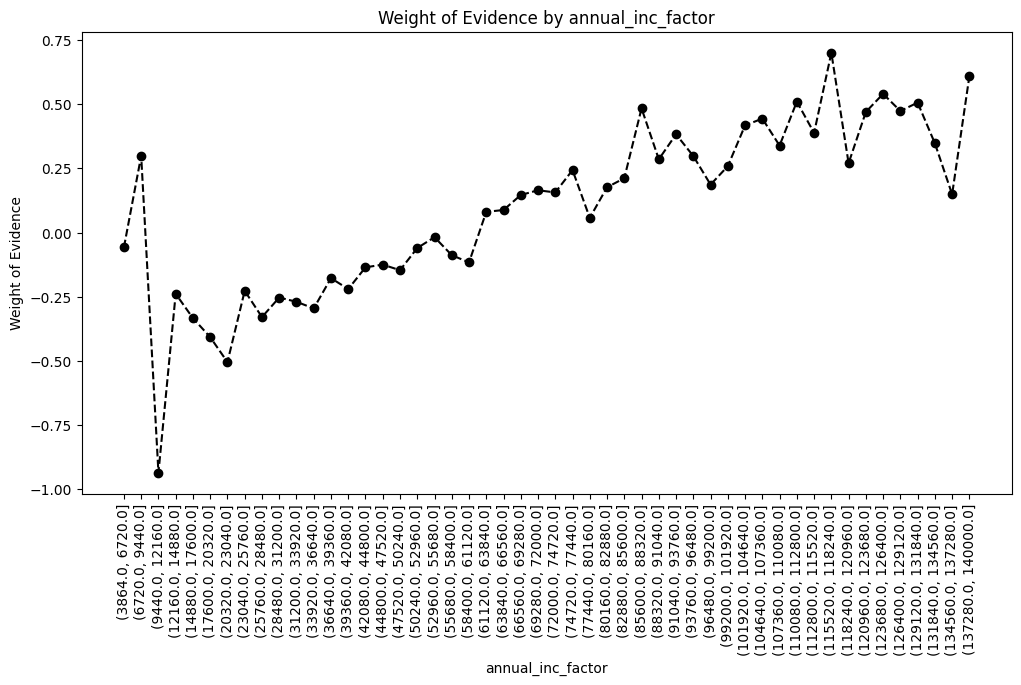

In [271]:
plot_by_woe(df_temp,90)

In [272]:
df_inputs_prep['annual_inc:<=20K'] = np.where(df_inputs_prep['annual_inc'] <= 20000, 1, 0)
df_inputs_prep['annual_inc:20K-30K'] = np.where((df_inputs_prep['annual_inc'] > 20000) & (df_inputs_prep['annual_inc'] <= 30000), 1, 0)
df_inputs_prep['annual_inc:30K-40k']= np.where((df_inputs_prep['annual_inc']>30000)& (df_inputs_prep['annual_inc']<=40000),1,0)
df_inputs_prep['annual_inc:40K-50K']= np.where((df_inputs_prep['annual_inc']>40000)& (df_inputs_prep['annual_inc']<=50000),1,0)
df_inputs_prep['annual_inc:50K-60K']= np.where((df_inputs_prep['annual_inc']>50000)& (df_inputs_prep['annual_inc']<=60000),1,0)
df_inputs_prep['annual_inc:60K-70K']= np.where((df_inputs_prep['annual_inc']>60000)& (df_inputs_prep['annual_inc']<=70000),1,0)
df_inputs_prep['annual_inc:70K-80K']= np.where((df_inputs_prep['annual_inc']>70000)& (df_inputs_prep['annual_inc']<=80000),1,0)
df_inputs_prep['annual_inc:80K-90K']= np.where((df_inputs_prep['annual_inc']>80000)& (df_inputs_prep['annual_inc']<=90000),1,0)
df_inputs_prep['annual_inc:90K-100K']= np.where((df_inputs_prep['annual_inc']>90000)& (df_inputs_prep['annual_inc']<=100000),1,0)
df_inputs_prep['annual_inc:100k-120k']= np.where((df_inputs_prep['annual_inc']>100000) & df_inputs_prep['annual_inc']<=120000,1,0)
df_inputs_prep['annual_inc:120k-140k']= np.where((df_inputs_prep['annual_inc']>120000) & df_inputs_prep['annual_inc']<=140000,1,0)
df_inputs_prep['annual_inc:>140K']= np.where(df_inputs_prep['annual_inc']>140000,1,0)


In [273]:
df_inputs_prep_temp= df_inputs_prep[pd.notnull(df_inputs_prep['mths_since_last_delinq'])]
df_inputs_prep_temp['mths_since_last_delinq_factor']= pd.cut(df_inputs_prep['mths_since_last_delinq'],50)
df_temp=woe_continuous(df_inputs_prep_temp, 'mths_since_last_delinq_factor', df_targets_prep[df_inputs_prep_temp.index])
df_temp

<ipython-input-273-d3d09ed9b527>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prep_temp['mths_since_last_delinq_factor']= pd.cut(df_inputs_prep['mths_since_last_delinq'],50)
<ipython-input-217-352caf08d7aa>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df= pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
<ipython-input-217-352caf08d7aa>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavio

mths_since_last_delinq_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0                 (-0.139, 2.78]    629   0.860095    0.021141   541.0   88.0   
1                   (2.78, 5.56]    914   0.879650    0.030720   804.0  110.0   
2                   (5.56, 8.34]   1622   0.882861    0.054516  1432.0  190.0   
3                  (8.34, 11.12]   1698   0.900471    0.057070  1529.0  169.0   
4                  (11.12, 13.9]   1139   0.886743    0.038282  1010.0  129.0   
5                  (13.9, 16.68]   1604   0.888404    0.053911  1425.0  179.0   
6                 (16.68, 19.46]   1518   0.893281    0.051020  1356.0  162.0   
7                 (19.46, 22.24]   1513   0.897555    0.050852  1358.0  155.0   
8                 (22.24, 25.02]   1459   0.882111    0.049037  1287.0  172.0   
9                  (25.02, 27.8]    985   0.893401    0.033106   880.0  105.0   
10                 (27.8, 30.58]   1440   0.879167    0.048398  1266.0  174.0   
11                (30.58, 33.36]   1384   0.873555    0.046516  1209.0  175.0   
12                (33.36, 36.14]   1277   0.899765    0.042920  1149.0  128.0   
13                (36.14, 38.92]    825   0.870303    0.027728   718.0  107.0   
14                 (38.92, 41.7]   1225   0.880000    0.041172  1078.0  147.0   
15                 (41.7, 44.48]   1216   0.888980    0.040870  1081.0  135.0   
16                (44.48, 47.26]   1144   0.903846    0.038450  1034.0  110.0   
17                (47.26, 50.04]    929   0.898816    0.031224   835.0   94.0   
18                (50.04, 52.82]    523   0.891013    0.017578   466.0   57.0   
19                 (52.82, 55.6]    785   0.915924    0.026384   719.0   66.0   
20                 (55.6, 58.38]    811   0.880395    0.027258   714.0   97.0   
21                (58.38, 61.16]    707   0.868458    0.023762   614.0   93.0   
22                (61.16, 63.94]    465   0.860215    0.015629   400.0   65.0   
23                (63.94, 66.72]    630   0.895238    0.021174   564.0   66.0   
24                 (66.72, 69.5]    688   0.885174    0.023124   609.0   79.0   
25                 (69.5, 72.28]    685   0.872993    0.023023   598.0   87.0   
26                (72.28, 75.06]    644   0.875776    0.021645   564.0   80.0   
27                (75.06, 77.84]    401   0.880299    0.013478   353.0   48.0   
28                (77.84, 80.62]    576   0.876736    0.019359   505.0   71.0   
29                 (80.62, 83.4]    278   0.866906    0.009344   241.0   37.0   
30                 (83.4, 86.18]     10   0.900000    0.000336     9.0    1.0   
31                (86.18, 88.96]      8   1.000000    0.000269     8.0    0.0   
32                (88.96, 91.74]      4   0.750000    0.000134     3.0    1.0   
33                (91.74, 94.52]      1   1.000000    0.000034     1.0    0.0   
34                 (94.52, 97.3]      8   0.875000    0.000269     7.0    1.0   
35                (97.3, 100.08]      2   1.000000    0.000067     2.0    0.0   
36              (100.08, 102.86]      0        NaN    0.000000     NaN    NaN   
37              (102.86, 105.64]      0        NaN    0.000000     NaN    NaN   
38              (105.64, 108.42]      1   1.000000    0.000034     1.0    0.0   
39               (108.42, 111.2]      0        NaN    0.000000     NaN    NaN   
40               (111.2, 113.98]      0        NaN    0.000000     NaN    NaN   
41              (113.98, 116.76]      0        NaN    0.000000     NaN    NaN   
42              (116.76, 119.54]      1   1.000000    0.000034     1.0    0.0   
43              (119.54, 122.32]      1   1.000000    0.000034     1.0    0.0   
44               (122.32, 125.1]      0        NaN    0.000000     NaN    NaN   
45               (125.1, 127.88]      0        NaN    0.000000     NaN    NaN   
46              (127.88, 130.66]      1   1.000000    0.000034     1.0    0.0   
47              (130.66, 133.44]      0        NaN    0.000000     NaN    NaN   
48              (133.44, 136.22]  

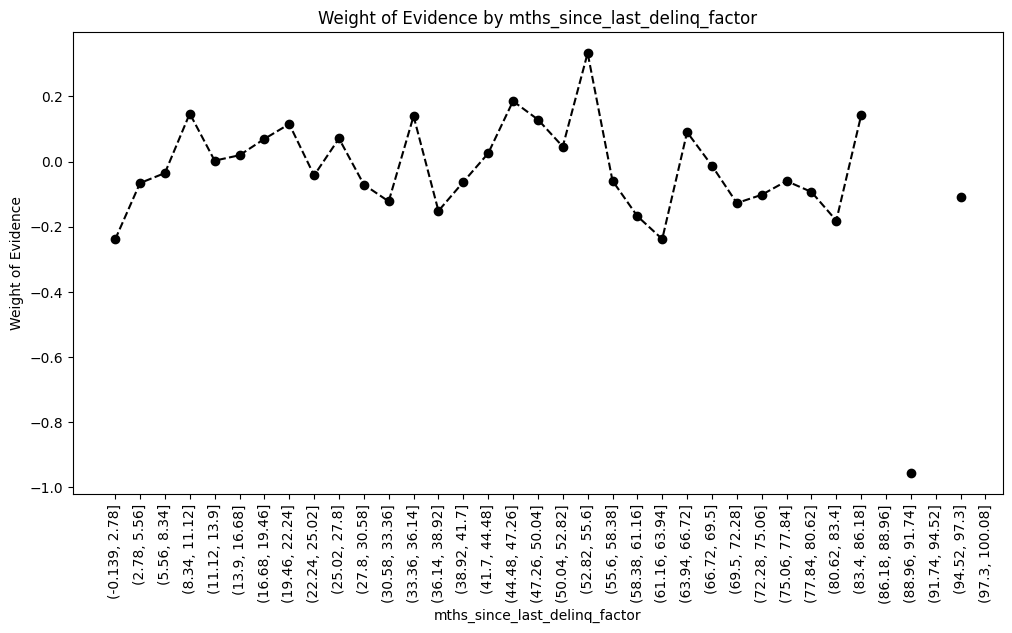

In [274]:
plot_by_woe(df_temp,90)

In [275]:
df_inputs_prep['mths_since_last_delinq:Missing'] = np.where(df_inputs_prep['mths_since_last_delinq'].isnull(), 1, 0)
df_inputs_prep['mths_since_last_delinq:0-3'] = np.where((df_inputs_prep['mths_since_last_delinq']>=0)&(df_inputs_prep['mths_since_last_delinq']<=3),1,0)
df_inputs_prep['mths_since_last_delinq:4-30'] = np.where((df_inputs_prep['mths_since_last_delinq']>=4)&(df_inputs_prep['mths_since_last_delinq']<=30),1,0)
df_inputs_prep['mths_since_last_delinq:31-56']= np.where((df_inputs_prep['mths_since_last_delinq']>=31)& (df_inputs_prep['mths_since_last_delinq']<=56),1,0)
df_inputs_prep['mths_since_last_delinq:>=57']= np.where(df_inputs_prep['mths_since_last_delinq']>=57,1,0)

In [276]:
df_inputs_prep[df_inputs_prep['dti'].isnull()]

Empty DataFrame
Columns: [Unnamed: 0, id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, collections_12_mths_ex_med, mths_since_last_major_derog, policy_code, application_type, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, total_rev_hi_lim, inq_fi, total_cu_tl, inq_last_12m, difference_in_months_crline, difference_in_months_issued, grade:A, grade:B, grade:C, grade:D, grade:E, grade:F, grade:G, sub_grade:A1, sub_grade:A2, sub_grade:A3, sub_grade:A4, sub_grade:A5, sub_grade:B1, sub_grade:B2, sub_grade:B3, sub_grade:B4, sub_grade:B5, sub_grade:C1, sub_grade:C2, sub_grade:C3, sub_grade:C4, sub_grade:C5, sub_grade:D1, sub_grade:D2, ...]
Index: []

In [278]:
#df_inputs_prep.drop(index=331294, axis=0, inplace=True)

<Axes: xlabel='dti', ylabel='Count'>

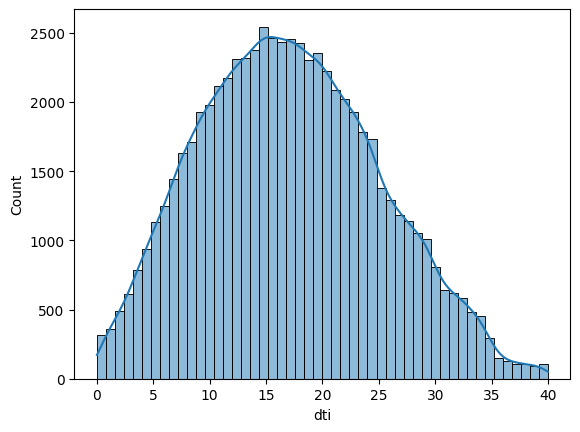

In [279]:
sns.histplot(df_inputs_prep['dti'], bins=50, kde=True)

In [280]:
df_inputs_prep['dti_factor']= pd.cut(df_inputs_prep['dti'],100)
df_temp= woe_continuous(df_inputs_prep, 'dti_factor', df_targets_prep)
df_temp

<ipython-input-217-352caf08d7aa>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df= pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
<ipython-input-217-352caf08d7aa>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)


dti_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0      (-0.04, 0.4]    162   0.895062    0.002445   145.0   17.0     0.002477   
1        (0.4, 0.8]    156   0.897436    0.002354   140.0   16.0     0.002391   
2        (0.8, 1.2]    179   0.910615    0.002702   163.0   16.0     0.002784   
3        (1.2, 1.6]    178   0.865169    0.002686   154.0   24.0     0.002630   
4        (1.6, 2.0]    248   0.879032    0.003743   218.0   30.0     0.003724   
..              ...    ...        ...         ...     ...    ...          ...   
95  (37.991, 38.39]     51   0.882353    0.000770    45.0    6.0     0.000769   
96   (38.39, 38.79]     42   0.880952    0.000634    37.0    5.0     0.000632   
97   (38.79, 39.19]     53   0.811321    0.000800    43.0   10.0     0.000734   
98   (39.19, 39.59]     53   0.962264    0.000800    51.0    2.0     0.000871   
99   (39.59, 39.99]     54   0.851852    0.000815    46.0    8.0     0.000786   

    prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.002204  0.116615             NaN       NaN  0.043773  
1     0.002074  0.142148        0.002374  0.025533  0.043773  
2     0.002074  0.294256        0.013179  0.152108  0.043773  
3     0.003112 -0.168007        0.045446  0.462263  0.043773  
4     0.003890 -0.043608        0.013864  0.124399  0.043773  
..         ...       ...             ...       ...       ...  
95    0.000778 -0.012003        0.020284  0.182322  0.043773  
96    0.000648 -0.025426        0.001401  0.013423  0.043773  
97    0.001297 -0.568291        0.069632  0.542865  0.043773  
98    0.000259  1.211773        0.150943  1.780063  0.043773  
99    0.001037 -0.277706        0.110412  1.489479  0.043773  

[100 rows x 12 columns]

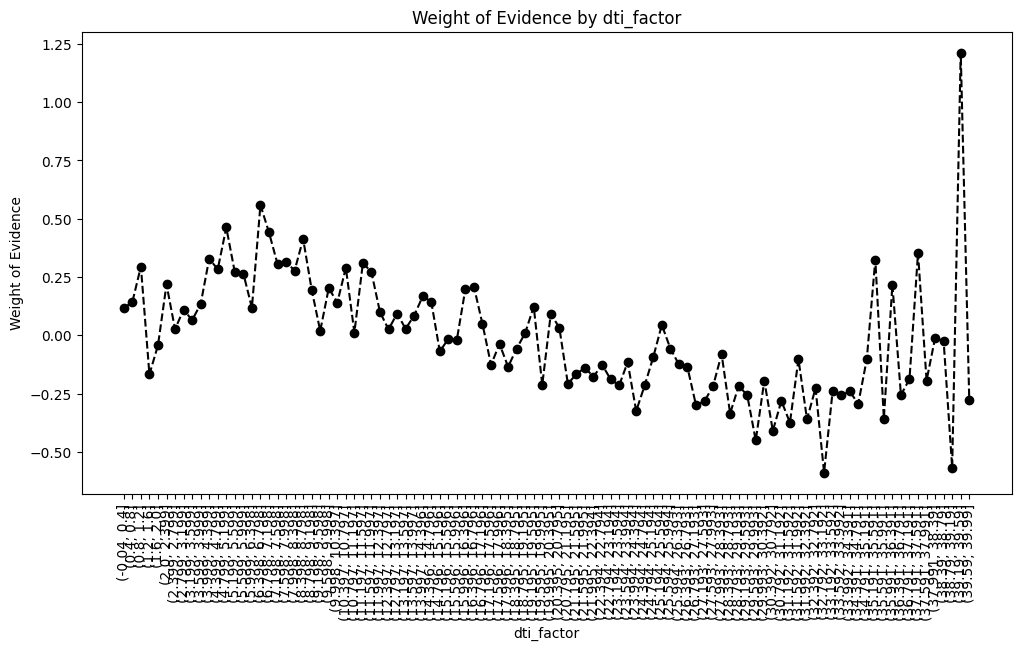

In [281]:
plot_by_woe(df_temp, 90)

In [282]:
df_inputs_prep_temp=df_inputs_prep.loc[df_inputs_prep['dti'] <= 35, : ]

In [283]:
df_inputs_prep_temp['dti_factor'] = pd.cut(df_inputs_prep_temp['dti'], 50)
df_temp = woe_continuous(df_inputs_prep_temp, 'dti_factor', df_targets_prep[df_inputs_prep_temp.index])
df_temp

<ipython-input-283-af9c629a71de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prep_temp['dti_factor'] = pd.cut(df_inputs_prep_temp['dti'], 50)
<ipython-input-217-352caf08d7aa>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df= pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
<ipython-input-217-352caf08d7aa>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the

dti_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0   (-0.035, 0.7]    277   0.891697    0.004227   247.0   30.0     0.004265   
1      (0.7, 1.4]    313   0.900958    0.004776   282.0   31.0     0.004870   
2      (1.4, 2.1]    394   0.880711    0.006012   347.0   47.0     0.005992   
3      (2.1, 2.8]    476   0.890756    0.007264   424.0   52.0     0.007322   
4      (2.8, 3.5]    599   0.891486    0.009140   534.0   65.0     0.009222   
5      (3.5, 4.2]    731   0.902873    0.011155   660.0   71.0     0.011397   
6      (4.2, 4.9]    870   0.911494    0.013276   793.0   77.0     0.013694   
7      (4.9, 5.6]    987   0.915907    0.015061   904.0   83.0     0.015611   
8      (5.6, 6.3]   1079   0.898054    0.016465   969.0  110.0     0.016733   
9      (6.3, 7.0]   1205   0.921992    0.018388  1111.0   94.0     0.019186   
10     (7.0, 7.7]   1393   0.917444    0.021256  1278.0  115.0     0.022069   
11     (7.7, 8.4]   1520   0.911184    0.023194  1385.0  135.0     0.023917   
12     (8.4, 9.1]   1555   0.910611    0.023729  1416.0  139.0     0.024453   
13     (9.1, 9.8]   1725   0.894493    0.026323  1543.0  182.0     0.026646   
14    (9.8, 10.5]   1746   0.901489    0.026643  1574.0  172.0     0.027181   
15   (10.5, 11.2]   1839   0.893420    0.028062  1643.0  196.0     0.028373   
16   (11.2, 11.9]   1880   0.910638    0.028688  1712.0  168.0     0.029564   
17   (11.9, 12.6]   2028   0.892998    0.030946  1811.0  217.0     0.031274   
18   (12.6, 13.3]   1988   0.889839    0.030336  1769.0  219.0     0.030548   
19   (13.3, 14.0]   2067   0.888244    0.031541  1836.0  231.0     0.031705   
20   (14.0, 14.7]   2175   0.898851    0.033189  1955.0  220.0     0.033760   
21   (14.7, 15.4]   2167   0.880018    0.033067  1907.0  260.0     0.032932   
22   (15.4, 16.1]   2154   0.886258    0.032869  1909.0  245.0     0.032966   
23   (16.1, 16.8]   2134   0.903936    0.032564  1929.0  205.0     0.033311   
24   (16.8, 17.5]   2145   0.875058    0.032732  1877.0  268.0     0.032413   
25   (17.5, 18.2]   2188   0.883455    0.033388  1933.0  255.0     0.033381   
26   (18.2, 18.9]   2026   0.870681    0.030916  1764.0  262.0     0.030462   
27   (18.9, 19.6]   2010   0.893532    0.030672  1796.0  214.0     0.031015   
28   (19.6, 20.3]   2025   0.874074    0.030900  1770.0  255.0     0.030566   
29   (20.3, 21.0]   1938   0.880805    0.029573  1707.0  231.0     0.029478   
30   (21.0, 21.7]   1778   0.862767    0.027131  1534.0  244.0     0.026490   
31   (21.7, 22.4]   1783   0.865395    0.027208  1543.0  240.0     0.026646   
32   (22.4, 23.1]   1674   0.870370    0.025544  1457.0  217.0     0.025161   
33   (23.1, 23.8]   1590   0.862893    0.024263  1372.0  218.0     0.023693   
34   (23.8, 24.5]   1553   0.858983    0.023698  1334.0  219.0     0.023037   
35   (24.5, 25.2]   1347   0.858946    0.020555  1157.0  190.0     0.019980   
36   (25.2, 25.9]   1129   0.883968    0.017228   998.0  131.0     0.017234   
37   (25.9, 26.6]   1112   0.872302    0.016969   970.0  142.0     0.016751   
38   (26.6, 27.3]   1021   0.850147    0.015580   868.0  153.0     0.014989   
39   (27.3, 28.0]   1011   0.862512    0.015427   872.0  139.0     0.015058   
40   (28.0, 28.7]    911   0.862788    0.013901   786.0  125.0     0.013573   
41   (28.7, 29.4]    930   0.854839    0.014191   795.0  135.0     0.013729   
42   (29.4, 30.1]    752   0.835106    0.011475   628.0  124.0     0.010845   
43   (30.1, 30.8]    573   0.849913    0.008744   487.0   86.0     0.008410   
44   (30.8, 31.5]    567   0.850088    0.008652   482.0   85.0     0.008324   
45   (31.5, 32.2]    526   0.859316    0.008026   452.0   74.0     0.007805   
46   (32.2, 32.9]    502   0.848606    0.007660   426.0   76.0     0.007356   
47   (32.9, 33.6]    415   0.824096    0.006333   342.0   73.0     0.005906   
48   (33.6, 34.3]    413   0.852300    0.006302   352.0   61.0     0.006079   
49   (34.3, 35.0]    312   0.858974    0.004761   268.0  

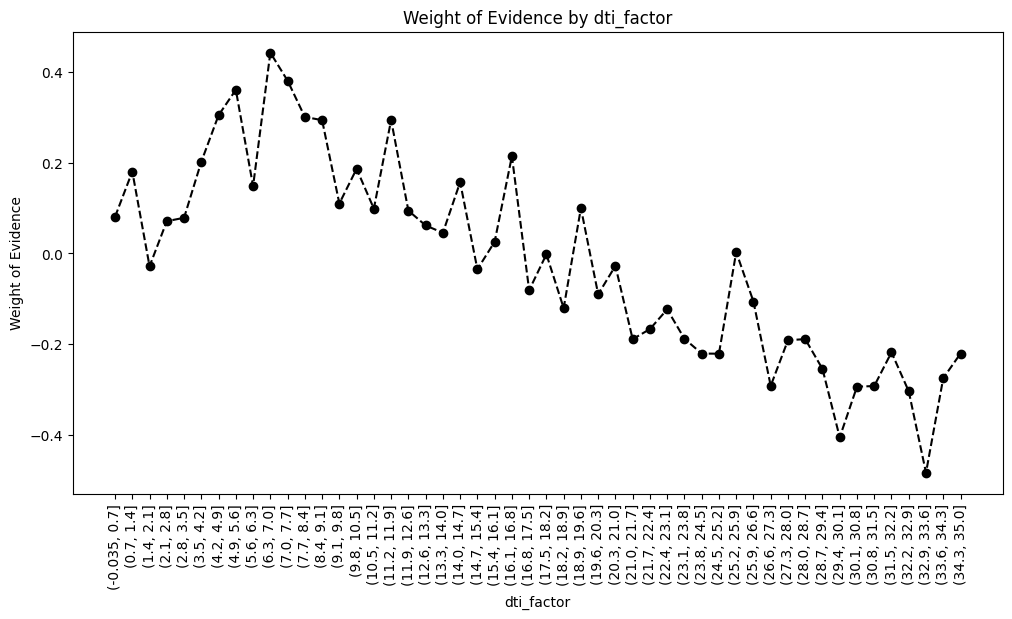

In [284]:
plot_by_woe(df_temp, 90)

In [285]:
df_inputs_prep['dti:<=1.4'] = np.where((df_inputs_prep['dti'] <= 1.4), 1, 0)
df_inputs_prep['dti:1.4-3.5'] = np.where((df_inputs_prep['dti'] > 1.4) & (df_inputs_prep['dti'] <= 3.5), 1, 0)
df_inputs_prep['dti:3.5-7.7'] = np.where((df_inputs_prep['dti'] > 3.5) & (df_inputs_prep['dti'] <= 7.7), 1, 0)
df_inputs_prep['dti:7.7-10.5'] = np.where((df_inputs_prep['dti'] > 7.7) & (df_inputs_prep['dti'] <= 10.5), 1, 0)
df_inputs_prep['dti:10.5-16.1'] = np.where((df_inputs_prep['dti'] > 10.5) & (df_inputs_prep['dti'] <= 16.1), 1, 0)
df_inputs_prep['dti:16.1-20.3'] = np.where((df_inputs_prep['dti'] > 16.1) & (df_inputs_prep['dti'] <= 20.3), 1, 0)
df_inputs_prep['dti:20.3-21.7'] = np.where((df_inputs_prep['dti'] > 20.3) & (df_inputs_prep['dti'] <= 21.7), 1, 0)
df_inputs_prep['dti:21.7-22.4'] = np.where((df_inputs_prep['dti'] > 21.7) & (df_inputs_prep['dti'] <= 22.4), 1, 0)
df_inputs_prep['dti:22.4-35'] = np.where((df_inputs_prep['dti'] > 22.4) & (df_inputs_prep['dti'] <= 35), 1, 0)
df_inputs_prep['dti:>35'] = np.where((df_inputs_prep['dti'] > 35), 1, 0)

In [286]:
df_inputs_prep_temp = df_inputs_prep[pd.notnull(df_inputs_prep['mths_since_last_record'])]
df_inputs_prep_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prep_temp['mths_since_last_record'], 50)
df_temp = woe_continuous(df_inputs_prep_temp, 'mths_since_last_record_factor', df_targets_prep[df_inputs_prep_temp.index])
df_temp

<ipython-input-286-1ddc51bc2e33>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prep_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prep_temp['mths_since_last_record'], 50)
<ipython-input-217-352caf08d7aa>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df= pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
<ipython-input-217-352caf08d7aa>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current 

mths_since_last_record_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0                 (-0.129, 2.58]    264   0.734848    0.034546   194.0   70.0   
1                   (2.58, 5.16]     15   0.933333    0.001963    14.0    1.0   
2                   (5.16, 7.74]     25   0.960000    0.003271    24.0    1.0   
3                  (7.74, 10.32]     35   1.000000    0.004580    35.0    0.0   
4                  (10.32, 12.9]     31   0.838710    0.004057    26.0    5.0   
5                  (12.9, 15.48]     51   0.921569    0.006674    47.0    4.0   
6                 (15.48, 18.06]     42   0.857143    0.005496    36.0    6.0   
7                 (18.06, 20.64]     26   0.961538    0.003402    25.0    1.0   
8                 (20.64, 23.22]     57   0.947368    0.007459    54.0    3.0   
9                  (23.22, 25.8]     47   0.851064    0.006150    40.0    7.0   
10                 (25.8, 28.38]     72   0.930556    0.009422    67.0    5.0   
11                (28.38, 30.96]     49   0.938776    0.006412    46.0    3.0   
12                (30.96, 33.54]     89   0.932584    0.011646    83.0    6.0   
13                (33.54, 36.12]     91   0.901099    0.011908    82.0    9.0   
14                 (36.12, 38.7]     81   0.901235    0.010599    73.0    8.0   
15                 (38.7, 41.28]    131   0.938931    0.017142   123.0    8.0   
16                (41.28, 43.86]    115   0.947826    0.015048   109.0    6.0   
17                (43.86, 46.44]    165   0.921212    0.021591   152.0   13.0   
18                (46.44, 49.02]    177   0.932203    0.023161   165.0   12.0   
19                 (49.02, 51.6]    104   0.932692    0.013609    97.0    7.0   
20                 (51.6, 54.18]    208   0.908654    0.027218   189.0   19.0   
21                (54.18, 56.76]    136   0.911765    0.017796   124.0   12.0   
22                (56.76, 59.34]    201   0.920398    0.026302   185.0   16.0   
23                (59.34, 61.92]    177   0.920904    0.023161   163.0   14.0   
24                 (61.92, 64.5]    221   0.900452    0.028919   199.0   22.0   
25                 (64.5, 67.08]    234   0.897436    0.030620   210.0   24.0   
26                (67.08, 69.66]    138   0.898551    0.018058   124.0   14.0   
27                (69.66, 72.24]    215   0.939535    0.028134   202.0   13.0   
28                (72.24, 74.82]    136   0.911765    0.017796   124.0   12.0   
29                 (74.82, 77.4]    217   0.921659    0.028396   200.0   17.0   
30                 (77.4, 79.98]    136   0.919118    0.017796   125.0   11.0   
31                (79.98, 82.56]    201   0.885572    0.026302   178.0   23.0   
32                (82.56, 85.14]    192   0.880208    0.025124   169.0   23.0   
33                (85.14, 87.72]    173   0.832370    0.022638   144.0   29.0   
34                 (87.72, 90.3]    210   0.828571    0.027480   174.0   36.0   
35                 (90.3, 92.88]    202   0.871287    0.026433   176.0   26.0   
36                (92.88, 95.46]    338   0.837278    0.044229   283.0   55.0   
37                (95.46, 98.04]    382   0.848168    0.049987   324.0   58.0   
38               (98.04, 100.62]    215   0.855814    0.028134   184.0   31.0   
39               (100.62, 103.2]    273   0.875458    0.035724   239.0   34.0   
40               (103.2, 105.78]    181   0.856354    0.023685   155.0   26.0   
41              (105.78, 108.36]    363   0.878788    0.047501   319.0   44.0   
42              (108.36, 110.94]    270   0.914815    0.035331   247.0   23.0   
43              (110.94, 113.52]    352   0.860795    0.046061   303.0   49.0   
44               (113.52, 116.1]    337   0.887240    0.044098   299.0   38.0   
45               (116.1, 118.68]    215   0.874419    0.028134   188.0   27.0   
46              (118.68, 121.26]     51   0.843137    0.006674    43.0    8.0   
47              (121.26, 123.84]      0        NaN    0.000000     NaN    NaN   
48              (123.84, 126.42]  

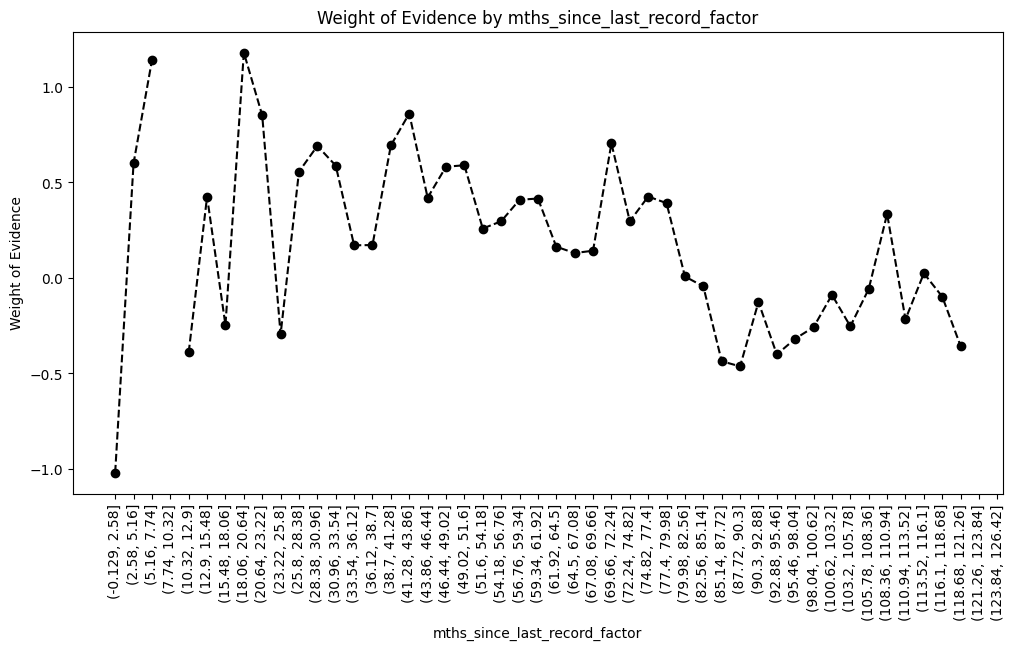

In [287]:
plot_by_woe(df_temp, 90)

In [288]:
df_inputs_prep['mths_since_last_record:Missing'] = np.where((df_inputs_prep['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prep['mths_since_last_record:0-2'] = np.where((df_inputs_prep['mths_since_last_record'] >= 0) & (df_inputs_prep['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prep['mths_since_last_record:3-20'] = np.where((df_inputs_prep['mths_since_last_record'] >= 3) & (df_inputs_prep['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prep['mths_since_last_record:21-31'] = np.where((df_inputs_prep['mths_since_last_record'] >= 21) & (df_inputs_prep['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prep['mths_since_last_record:32-80'] = np.where((df_inputs_prep['mths_since_last_record'] >= 32) & (df_inputs_prep['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prep['mths_since_last_record:81-86'] = np.where((df_inputs_prep['mths_since_last_record'] >= 81) & (df_inputs_prep['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prep['mths_since_last_record:>86'] = np.where((df_inputs_prep['mths_since_last_record'] > 86), 1, 0)

<ipython-input-288-0e68d23da017>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prep['mths_since_last_record:21-31'] = np.where((df_inputs_prep['mths_since_last_record'] >= 21) & (df_inputs_prep['mths_since_last_record'] <= 31), 1, 0)
<ipython-input-288-0e68d23da017>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prep['mths_since_last_record:32-80'] = np.where((df_inputs_prep['mths_since_last_record'] >= 32) & (df_inputs_prep['mths_since_last_record'] <= 80), 1, 0)
<ipython-input-288-0e68d23da017>:6: Perf

In [290]:
#data_inputs_train= df_inputs_prep
data_inputs_test= df_inputs_prep

In [301]:
print(data_inputs_train.shape)
print(data_inputs_test.shape)
print(y_train.shape)
print(y_test.shape)

(265035, 311)
(66259, 311)
(265036,)
(66259,)


**PD Model Estimation**

In [307]:
x_train_dummy_categories= data_inputs_train.loc[:, ['grade:A', 'grade:B', 'grade:C',
       'grade:D', 'grade:E', 'grade:F', 'grade:G','home_ownership:RENT_OTHER_NONE_ANY','home_ownership:MORTGAGE','home_ownership:OWN',
                                                  'addr_state:ND_NE_IA_NV_FL_HI_AL',
       'addr_state:NM_VA', 'addr_state:OK_TN_MO_LA_MD_NC',
       'addr_state:UT_KY_AZ_NJ', 'addr_state:AR_MI_PA_OH_MN',
       'addr_state:RI_MA_DE_SD_IN', 'addr_state:GA_WA_OR',
       'addr_state:WI_MT', 'addr_state:IL_CT',
       'addr_state:KS_SC_CO_VT_AK_MS', 'addr_state:WV_NH_WY_DC_ME_ID', 'purpose:educ__sm_b__wedd__ren_en__mov__house',
       'purpose:oth__med__vacation',
       'purpose:major_purch__car__home_impr', 'term:36', 'term:60', 'emp_length:0', 'emp_length:1', 'emp_length:2-4', 'emp_length:5-6',
       'emp_length:7-9', 'emp_length:10',
       'difference_in_months_issued<127',
       'difference_in_months_issued:127-134',
       'difference_in_months_issued:134-138',
       'difference_in_months_issued:138-150',
       'difference_in_months_issued:150-170',
       'difference_in_months_issued>170', 'int_rate:<9.548', 'int_rate:9.548-12.025',
       'int_rate:12.025-15.74', 'int_rate:15.74-20.281',
       'int_rate>20.281','delinq_2yrs:0',
       'delinq_2yrs:1-3', 'delinq_2yrs:>=4','inq_last_6mths:0',
       'inq_last_6mths:1-2', 'inq_last_6mths:3-6', 'inq_last_6mths:>6','open_acc:0', 'open_acc:1-3', 'open_acc:4-12', 'open_acc:13-17',
       'open_acc:18-22', 'open_acc:23-25', 'open_acc:26-30',
       'open_acc:>=31','pub_rec:0-2', 'pub_rec:3-4', 'pub_rec:>=5', 'total_acc:<=27', 'total_acc:28-51',
       'total_acc:>=52','acc_now_delinq:0', 'acc_now_delinq:>=1', 'total_rev_hi_lim:<=5K',
       'total_rev_hi_lim:5K-10K', 'total_rev_hi_lim:10K-20K',
       'total_rev_hi_lim:20K-30K', 'total_rev_hi_lim:30K-40K',
       'total_rev_hi_lim:40K-55K', 'total_rev_hi_lim:55K-95K',
       'total_rev_hi_lim:>95K','annual_inc:<=20K', 'annual_inc:20K-30K', 'annual_inc:30K-40k',
       'annual_inc:40K-50K', 'annual_inc:50K-60K', 'annual_inc:60K-70K',
       'annual_inc:70K-80K', 'annual_inc:80K-90K', 'annual_inc:90K-100K',
       'annual_inc:100k-120k', 'annual_inc:120k-140k', 'annual_inc:>140K','mths_since_last_delinq:Missing', 'mths_since_last_delinq:0-3',
       'mths_since_last_delinq:4-30', 'mths_since_last_delinq:31-56',
       'mths_since_last_delinq:>=57', 'dti:<=1.4',
       'dti:1.4-3.5', 'dti:3.5-7.7', 'dti:7.7-10.5', 'dti:10.5-16.1',
       'dti:16.1-20.3', 'dti:20.3-21.7', 'dti:21.7-22.4', 'dti:22.4-35',
       'dti:>35', 'mths_since_last_record:Missing',
       'mths_since_last_record:0-2', 'mths_since_last_record:3-20',
       'mths_since_last_record:21-31', 'mths_since_last_record:32-80',
       'mths_since_last_record:81-86', 'mths_since_last_record:>86']]

In [308]:
ref_categories=['grade:G','home_ownership:RENT_OTHER_NONE_ANY','addr_state:ND_NE_IA_NV_FL_HI_AL','purpose:educ__sm_b__wedd__ren_en__mov__house',
                'term:60','emp_length:0','difference_in_months_issued>170','int_rate>20.281','delinq_2yrs:>=4','inq_last_6mths:>6',
               'open_acc:0','pub_rec:0-2','total_acc:<=27','acc_now_delinq:0', 'total_rev_hi_lim:<=5K', 'annual_inc:<=20K', 'dti:>35',
                'mths_since_last_record:0-2','mths_since_last_delinq:0-3' ]

In [329]:
x_train_dummy_categories.drop(ref_categories, axis=1, inplace=True)
x_train_dummy_categories.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
101373        0        0        1        0        0        0   
282850        0        0        0        1        0        0   
89906         0        1        0        0        0        0   
145336        0        0        1        0        0        0   
28278         0        1        0        0        0        0   

        home_ownership:MORTGAGE  home_ownership:OWN  addr_state:NM_VA  \
101373                        1                   0                 0   
282850                        1                   0                 0   
89906                         1                   0                 0   
145336                        0                   0                 0   
28278                         1                   0                 0   

        addr_state:OK_TN_MO_LA_MD_NC  addr_state:UT_KY_AZ_NJ  \
101373                             0                       0   
282850                             0                       0   
89906                              0                       0   
145336                             0                       0   
28278                              0                       0   

        addr_state:AR_MI_PA_OH_MN  addr_state:RI_MA_DE_SD_IN  \
101373                          0                          0   
282850                          0                          0   
89906                           0                          0   
145336                          1                          0   
28278                           1                          0   

        addr_state:GA_WA_OR  addr_state:WI_MT  addr_state:IL_CT  \
101373                    1                 0                 0   
282850                    0                 0                 0   
89906                     0                 0                 0   
145336                    0                 0                 0   
28278                     0                 0                 0   

        addr_state:KS_SC_CO_VT_AK_MS  addr_state:WV_NH_WY_DC_ME_ID  \
101373                             0                             0   
282850                             0                             0   
89906                              0                             0   
145336                             0                             0   
28278                              0                             0   

        purpose:oth__med__vacation  purpose:major_purch__car__home_impr  \
101373                           0                                    0   
282850                           0                                    0   
89906                            0                                    0   
145336                           0                                    0   
28278                            0                                    1   

        term:36  emp_length:1  emp_length:2-4  emp_length:5-6  emp_length:7-9  \
101373        1             0               0               0               0   
282850        0             0               0               0               0   
89906         1             0               0               1               0   
145336        1             0               0               0               0   
28278         0             0               1               0               0   

        emp_length:10  difference_in_months_issued<127  \
101373              1                                0   
282850              1                                1   
89906               0                                0   
145336              1                                0   
28278               0                                0   

        difference_in_months_issued:127-134  \
101373                                    0   
282850                                    0   
89906                                     0   
145336                                    0   
28278                                     0   

        difference_i

In [303]:
pd.options.display.max_rows=None
data_inputs_train.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint'

In [330]:
'grade:G' in x_train_dummy_categories.columns.values

False

**Logistic Regression**

In [310]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [311]:
reg= LogisticRegression()

In [315]:
y_train.drop(index=331294, axis=0, inplace=True)

In [316]:
print(x_train_dummy_categories.shape)
print(y_train.shape)

(265035, 108)
(265035,)


In [331]:
pd.options.display.max_rows=None
reg.fit(x_train_dummy_categories, y_train)

LogisticRegression()

In [332]:
reg.intercept_

array([-0.1694369])

In [333]:
reg.coef_

array([[ 0.9741635 ,  0.92184461,  0.73124224,  0.51177386,  0.34545427,
         0.13481117,  0.10890845,  0.06339848, -0.01671404, -0.00685351,
         0.0041682 ,  0.08261618,  0.03797847,  0.08815535,  0.17502969,
         0.182097  ,  0.23319996,  0.40515158, -0.04509189,  0.04265477,
         0.11879889,  0.22880516,  0.26980083,  0.23505812,  0.20262933,
         0.24593955,  0.8162448 ,  0.23060158,  0.21762347, -0.00425633,
        -0.21497298,  1.04222309,  0.53339977,  0.26624107,  0.08423845,
         0.00928647, -0.01503796,  0.51783344,  0.38417267,  0.1393209 ,
         0.05619737, -0.01532583, -0.04208438, -0.10865985, -0.06572681,
         0.0470744 , -0.00320735,  0.04941631,  0.11533241,  0.01457841,
         0.03920626, -0.00391755,  0.09426347,  0.09613009,  0.11328469,
         0.09670464,  0.16007725,  0.18334628,  0.29098189, -0.44780472,
        -0.3980091 , -0.29764056, -0.23838764, -0.16196905, -0.08745669,
         0.00705374,  0.03501983, -0.17225106, -0.1

In [334]:
feature_names= x_train_dummy_categories.columns.values

In [335]:
summary_table= pd.DataFrame(columns=['Feature Names'], data= feature_names)
summary_table['Coefficient']= np.transpose(reg.coef_)
summary_table.index= summary_table.index+1
summary_table.loc[0]= ['Intercept', reg.intercept_[0]]
summary_table= summary_table.sort_index()
summary_table

Feature Names  Coefficient
0                             Intercept    -0.169437
1                               grade:A     0.974164
2                               grade:B     0.921845
3                               grade:C     0.731242
4                               grade:D     0.511774
5                               grade:E     0.345454
6                               grade:F     0.134811
7               home_ownership:MORTGAGE     0.108908
8                    home_ownership:OWN     0.063398
9                      addr_state:NM_VA    -0.016714
10         addr_state:OK_TN_MO_LA_MD_NC    -0.006854
11               addr_state:UT_KY_AZ_NJ     0.004168
12            addr_state:AR_MI_PA_OH_MN     0.082616
13            addr_state:RI_MA_DE_SD_IN     0.037978
14                  addr_state:GA_WA_OR     0.088155
15                     addr_state:WI_MT     0.175030
16                     addr_state:IL_CT     0.182097
17         addr_state:KS_SC_CO_VT_AK_MS     0.233200
18         addr_state:WV_NH_WY_DC_ME_ID     0.405152
19           purpose:oth__med__vacation    -0.045092
20  purpose:major_purch__car__home_impr     0.042655
21                              term:36     0.118799
22                         emp_length:1     0.228805
23                       emp_length:2-4     0.269801
24                       emp_length:5-6     0.235058
25                       emp_length:7-9     0.202629
26                        emp_length:10     0.245940
27      difference_in_months_issued<127     0.816245
28  difference_in_months_issued:127-134     0.230602
29  difference_in_months_issued:134-138     0.217623
30  difference_in_months_issued:138-150    -0.004256
31  difference_in_months_issued:150-170    -0.214973
32                      int_rate:<9.548     1.042223
33                int_rate:9.548-12.025     0.533400
34                int_rate:12.025-15.74     0.266241
35                int_rate:15.74-20.281     0.084238
36                        delinq_2yrs:0     0.009286
37                      delinq_2yrs:1-3    -0.015038
38                     inq_last_6mths:0     0.517833
39                   inq_last_6mths:1-2     0.384173
40                   inq_last_6mths:3-6     0.139321
41                         open_acc:1-3     0.056197
42                        open_acc:4-12    -0.015326
43                       open_acc:13-17    -0.042084
44                       open_acc:18-22    -0.108660
45                       open_acc:23-25    -0.065727
46                       open_acc:26-30     0.047074
47                        open_acc:>=31    -0.003207
48                          pub_rec:3-4     0.049416
49                          pub_rec:>=5     0.115332
50                      total_acc:28-51     0.014578
51                       total_acc:>=52     0.039206
52                   acc_now_delinq:>=1    -0.003918
53              total_rev_hi_lim:5K-10K     0.094263
54             total_rev_hi_lim:10K-20K     0.096130
55             total_rev_hi_lim:20K-30K     0.113285
56             total_rev_hi_lim:30K-40K     0.096705
57             total_rev_hi_lim:40K-55K     0.160077
58             total_rev_hi_lim:55K-95K     0.183346
59                total_rev_hi_lim:>95K     0.290982
60                   annual_inc:20K-30K    -0.447805
61                   annual_inc:30K-40k    -0.398009
62                   annual_inc:40K-50K    -0.297641
63                   annual_inc:50K-60K    -0.238388
64                   annual_inc:60K-70K    -0.161969
65                   annual_inc:70K-80K    -0.087457
66                   annual_inc:80K-90K     0.007054
67                  annual_inc:90K-100K     0.035020
68                 annual_inc:100k-120k    -0.172251
69                 annual_inc:120k-140k    -0.172251
70                     annual_inc:>140K     0.113370
71       mths_since_last_delinq:Missing     0.137383
72          mths_since_last_delinq:4-30     0.220077
73         mths_since_last_delinq:31-56     0.232081
74          mths_since_last_delinq:>=57     0.20434

**Logistic Regression with p-Values**

In [325]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:

    def __init__(self,*args, **kwargs):
        self.model= linear_model.LogisticRegression(*args, **kwargs)
    def fit(self, X,y):
      self.model.fit(X,y)
      denom= (2.0*(1.0+np.cosh(self.model.decision_function(X))))
      denom= np.tile(denom, (X.shape[1],1)).T
      F_ij= np.dot((X/denom).T,X)
      Cramer_Rao= np.linalg.inv(F_ij)
      sigma_estimates= np.sqrt(np.diagonal(Cramer_Rao))
      z_scores= self.model.coef_[0]/ sigma_estimates
      p_values= [stat.norm.sf(abs(x))*2 for x in z_scores]
      self.coef_= self.model.coef_
      self.intercept_=self.model.intercept_
      self.p_values= p_values

In [326]:
reg1= LogisticRegression_with_p_values()

In [336]:
reg1.fit(x_train_dummy_categories, y_train)

<ipython-input-325-a8a129a79dfe>:14: RuntimeWarning: invalid value encountered in sqrt
  sigma_estimates= np.sqrt(np.diagonal(Cramer_Rao))


In [338]:
p_Values = reg1.p_values

In [343]:
p_Values= np.append(np.nan, np.array(p_Values))

In [345]:
summary_table['p_values']= p_Values

In [346]:
summary_table

Feature Names  Coefficient       p_values
0                             Intercept    -0.169437            NaN
1                               grade:A     0.974164   3.049655e-09
2                               grade:B     0.921845            NaN
3                               grade:C     0.731242   4.569118e-09
4                               grade:D     0.511774            NaN
5                               grade:E     0.345454   2.218920e-04
6                               grade:F     0.134811   4.235322e-02
7               home_ownership:MORTGAGE     0.108908   3.251021e-14
8                    home_ownership:OWN     0.063398   6.744490e-03
9                      addr_state:NM_VA    -0.016714   6.179297e-01
10         addr_state:OK_TN_MO_LA_MD_NC    -0.006854   7.546454e-01
11               addr_state:UT_KY_AZ_NJ     0.004168   8.623872e-01
12            addr_state:AR_MI_PA_OH_MN     0.082616   8.001584e-05
13            addr_state:RI_MA_DE_SD_IN     0.037978   2.245250e-01
14                  addr_state:GA_WA_OR     0.088155   9.101065e-04
15                     addr_state:WI_MT     0.175030   9.522123e-04
16                     addr_state:IL_CT     0.182097   6.853336e-10
17         addr_state:KS_SC_CO_VT_AK_MS     0.233200   6.755526e-13
18         addr_state:WV_NH_WY_DC_ME_ID     0.405152   6.756384e-12
19           purpose:oth__med__vacation    -0.045092   5.103169e-02
20  purpose:major_purch__car__home_impr     0.042655   6.856166e-02
21                              term:36     0.118799   1.177366e-13
22                         emp_length:1     0.228805   3.706795e-14
23                       emp_length:2-4     0.269801   5.706609e-17
24                       emp_length:5-6     0.235058   3.357042e-13
25                       emp_length:7-9     0.202629   1.230528e-09
26                        emp_length:10     0.245940   2.107836e-16
27      difference_in_months_issued<127     0.816245   0.000000e+00
28  difference_in_months_issued:127-134     0.230602   2.604337e-16
29  difference_in_months_issued:134-138     0.217623   7.082785e-22
30  difference_in_months_issued:138-150    -0.004256   8.302347e-01
31  difference_in_months_issued:150-170    -0.214973   3.204998e-10
32                      int_rate:<9.548     1.042223   6.546650e-26
33                int_rate:9.548-12.025     0.533400   7.584527e-68
34                int_rate:12.025-15.74     0.266241   1.278191e-12
35                int_rate:15.74-20.281     0.084238   2.139823e-02
36                        delinq_2yrs:0     0.009286   8.959466e-01
37                      delinq_2yrs:1-3    -0.015038   8.246741e-01
38                     inq_last_6mths:0     0.517833   2.334909e-04
39                   inq_last_6mths:1-2     0.384173   2.405443e-03
40                   inq_last_6mths:3-6     0.139321   9.025506e-02
41                         open_acc:1-3     0.056197   9.328787e-01
42                        open_acc:4-12    -0.015326   9.817947e-01
43                       open_acc:13-17    -0.042084   9.502033e-01
44                       open_acc:18-22    -0.108660   8.717896e-01
45                       open_acc:23-25    -0.065727            NaN
46                       open_acc:26-30     0.047074   9.447106e-01
47                        open_acc:>=31    -0.003207   9.962485e-01
48                          pub_rec:3-4     0.049416   6.888447e-01
49                          pub_rec:>=5     0.115332   6.440291e-01
50                      total_acc:28-51     0.014578   3.746778e-01
51                       total_acc:>=52     0.039206   4.003813e-01
52                   acc_now_delinq:>=1    -0.003918   9.744897e-01
53              total_rev_hi_lim:5K-10K     0.094263   5.167835e-04
54             total_rev_hi_lim:10K-20K     0.096130   2.408642e-04
55             total_rev_hi_lim:20K-30K     0.113285   8.704521e-05
56             total_rev_hi_lim:30K-40K     0.096705   2.946126e-03
57             total_rev_hi_lim:40K-55K     0.160077   9.399012e-06
58            

In [347]:

summary_table_significant= summary_table[abs(summary_table['p_values'])<0.05]

In [351]:
summary_table_significant.sort_values('Coefficient', ascending=False)

Feature Names  Coefficient       p_values
32                      int_rate:<9.548     1.042223   6.546650e-26
1                               grade:A     0.974164   3.049655e-09
27      difference_in_months_issued<127     0.816245   0.000000e+00
3                               grade:C     0.731242   4.569118e-09
33                int_rate:9.548-12.025     0.533400   7.584527e-68
38                     inq_last_6mths:0     0.517833   2.334909e-04
87         mths_since_last_record:32-80     0.445798   1.213648e-31
18         addr_state:WV_NH_WY_DC_ME_ID     0.405152   6.756384e-12
39                   inq_last_6mths:1-2     0.384173   2.405443e-03
5                               grade:E     0.345454   2.218920e-04
84       mths_since_last_record:Missing     0.311070  6.939793e-194
59                total_rev_hi_lim:>95K     0.290982   6.743773e-06
23                       emp_length:2-4     0.269801   5.706609e-17
34                int_rate:12.025-15.74     0.266241   1.278191e-12
89           mths_since_last_record:>86     0.259615   1.472379e-18
77                          dti:3.5-7.7     0.257436   6.075698e-04
76                          dti:1.4-3.5     0.247135   4.059100e-03
26                        emp_length:10     0.245940   2.107836e-16
24                       emp_length:5-6     0.235058   3.357042e-13
17         addr_state:KS_SC_CO_VT_AK_MS     0.233200   6.755526e-13
73         mths_since_last_delinq:31-56     0.232081   8.713422e-04
28  difference_in_months_issued:127-134     0.230602   2.604337e-16
22                         emp_length:1     0.228805   3.706795e-14
72          mths_since_last_delinq:4-30     0.220077   5.524358e-04
29  difference_in_months_issued:134-138     0.217623   7.082785e-22
78                         dti:7.7-10.5     0.214881   4.023917e-03
74          mths_since_last_delinq:>=57     0.204346   4.027813e-03
25                       emp_length:7-9     0.202629   1.230528e-09
58             total_rev_hi_lim:55K-95K     0.183346   7.386301e-06
16                     addr_state:IL_CT     0.182097   6.853336e-10
15                     addr_state:WI_MT     0.175030   9.522123e-04
57             total_rev_hi_lim:40K-55K     0.160077   9.399012e-06
79                        dti:10.5-16.1     0.142363   4.857022e-02
71       mths_since_last_delinq:Missing     0.137383   4.479735e-02
6                               grade:F     0.134811   4.235322e-02
21                              term:36     0.118799   1.177366e-13
70                     annual_inc:>140K     0.113370   2.181679e-03
55             total_rev_hi_lim:20K-30K     0.113285   8.704521e-05
7               home_ownership:MORTGAGE     0.108908   3.251021e-14
56             total_rev_hi_lim:30K-40K     0.096705   2.946126e-03
54             total_rev_hi_lim:10K-20K     0.096130   2.408642e-04
53              total_rev_hi_lim:5K-10K     0.094263   5.167835e-04
14                  addr_state:GA_WA_OR     0.088155   9.101065e-04
35                int_rate:15.74-20.281     0.084238   2.139823e-02
12            addr_state:AR_MI_PA_OH_MN     0.082616   8.001584e-05
8                    home_ownership:OWN     0.063398   6.744490e-03
65                   annual_inc:70K-80K    -0.087457   2.457470e-03
64                   annual_inc:60K-70K    -0.161969   2.709773e-09
31  difference_in_months_issued:150-170    -0.214973   3.204998e-10
63                   annual_inc:50K-60K    -0.238388   2.727639e-20
62                   annual_inc:40K-50K    -0.297641   6.791574e-30
61                   annual_inc:30K-40k    -0.398009   5.357013e-51
60                   annual_inc:20K-30K    -0.447805   2.016961e-44

## **PD Model Validation**

In [353]:
x_test_dummy_categories= data_inputs_test.loc[:,['grade:A', 'grade:B', 'grade:C',
       'grade:D', 'grade:E', 'grade:F', 'grade:G','home_ownership:RENT_OTHER_NONE_ANY','home_ownership:MORTGAGE','home_ownership:OWN',
                                                  'addr_state:ND_NE_IA_NV_FL_HI_AL',
       'addr_state:NM_VA', 'addr_state:OK_TN_MO_LA_MD_NC',
       'addr_state:UT_KY_AZ_NJ', 'addr_state:AR_MI_PA_OH_MN',
       'addr_state:RI_MA_DE_SD_IN', 'addr_state:GA_WA_OR',
       'addr_state:WI_MT', 'addr_state:IL_CT',
       'addr_state:KS_SC_CO_VT_AK_MS', 'addr_state:WV_NH_WY_DC_ME_ID', 'purpose:educ__sm_b__wedd__ren_en__mov__house',
       'purpose:oth__med__vacation',
       'purpose:major_purch__car__home_impr', 'term:36', 'term:60', 'emp_length:0', 'emp_length:1', 'emp_length:2-4', 'emp_length:5-6',
       'emp_length:7-9', 'emp_length:10',
       'difference_in_months_issued<127',
       'difference_in_months_issued:127-134',
       'difference_in_months_issued:134-138',
       'difference_in_months_issued:138-150',
       'difference_in_months_issued:150-170',
       'difference_in_months_issued>170', 'int_rate:<9.548', 'int_rate:9.548-12.025',
       'int_rate:12.025-15.74', 'int_rate:15.74-20.281',
       'int_rate>20.281','delinq_2yrs:0',
       'delinq_2yrs:1-3', 'delinq_2yrs:>=4','inq_last_6mths:0',
       'inq_last_6mths:1-2', 'inq_last_6mths:3-6', 'inq_last_6mths:>6','open_acc:0', 'open_acc:1-3', 'open_acc:4-12', 'open_acc:13-17',
       'open_acc:18-22', 'open_acc:23-25', 'open_acc:26-30',
       'open_acc:>=31','pub_rec:0-2', 'pub_rec:3-4', 'pub_rec:>=5', 'total_acc:<=27', 'total_acc:28-51',
       'total_acc:>=52','acc_now_delinq:0', 'acc_now_delinq:>=1', 'total_rev_hi_lim:<=5K',
       'total_rev_hi_lim:5K-10K', 'total_rev_hi_lim:10K-20K',
       'total_rev_hi_lim:20K-30K', 'total_rev_hi_lim:30K-40K',
       'total_rev_hi_lim:40K-55K', 'total_rev_hi_lim:55K-95K',
       'total_rev_hi_lim:>95K','annual_inc:<=20K', 'annual_inc:20K-30K', 'annual_inc:30K-40k',
       'annual_inc:40K-50K', 'annual_inc:50K-60K', 'annual_inc:60K-70K',
       'annual_inc:70K-80K', 'annual_inc:80K-90K', 'annual_inc:90K-100K',
       'annual_inc:100k-120k', 'annual_inc:120k-140k', 'annual_inc:>140K','mths_since_last_delinq:Missing', 'mths_since_last_delinq:0-3',
       'mths_since_last_delinq:4-30', 'mths_since_last_delinq:31-56',
       'mths_since_last_delinq:>=57', 'dti:<=1.4',
       'dti:1.4-3.5', 'dti:3.5-7.7', 'dti:7.7-10.5', 'dti:10.5-16.1',
       'dti:16.1-20.3', 'dti:20.3-21.7', 'dti:21.7-22.4', 'dti:22.4-35',
       'dti:>35', 'mths_since_last_record:Missing',
       'mths_since_last_record:0-2', 'mths_since_last_record:3-20',
       'mths_since_last_record:21-31', 'mths_since_last_record:32-80',
       'mths_since_last_record:81-86', 'mths_since_last_record:>86']]

In [352]:
ref_categories=['grade:G','home_ownership:RENT_OTHER_NONE_ANY','addr_state:ND_NE_IA_NV_FL_HI_AL','purpose:educ__sm_b__wedd__ren_en__mov__house',
                'term:60','emp_length:0','difference_in_months_issued>170','int_rate>20.281','delinq_2yrs:>=4','inq_last_6mths:>6',
               'open_acc:0','pub_rec:0-2','total_acc:<=27','acc_now_delinq:0', 'total_rev_hi_lim:<=5K', 'annual_inc:<=20K', 'dti:>35',
                'mths_since_last_record:0-2','mths_since_last_delinq:0-3' ]

In [354]:
x_test_dummy_categories.drop(ref_categories, axis=1, inplace=True)

In [355]:
x_test_dummy_categories.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
250708        0        0        0        1        0        0   
276301        0        1        0        0        0        0   
285264        1        0        0        0        0        0   
3646          1        0        0        0        0        0   
81040         0        0        0        0        1        0   

        home_ownership:MORTGAGE  home_ownership:OWN  addr_state:NM_VA  \
250708                        0                   1                 0   
276301                        1                   0                 0   
285264                        1                   0                 0   
3646                          0                   0                 0   
81040                         1                   0                 0   

        addr_state:OK_TN_MO_LA_MD_NC  addr_state:UT_KY_AZ_NJ  \
250708                             0                       0   
276301                             0                       0   
285264                             0                       0   
3646                               0                       0   
81040                              0                       1   

        addr_state:AR_MI_PA_OH_MN  addr_state:RI_MA_DE_SD_IN  \
250708                          1                          0   
276301                          1                          0   
285264                          0                          1   
3646                            0                          0   
81040                           0                          0   

        addr_state:GA_WA_OR  addr_state:WI_MT  addr_state:IL_CT  \
250708                    0                 0                 0   
276301                    0                 0                 0   
285264                    0                 0                 0   
3646                      0                 0                 0   
81040                     0                 0                 0   

        addr_state:KS_SC_CO_VT_AK_MS  addr_state:WV_NH_WY_DC_ME_ID  \
250708                             0                             0   
276301                             0                             0   
285264                             0                             0   
3646                               1                             0   
81040                              0                             0   

        purpose:oth__med__vacation  purpose:major_purch__car__home_impr  \
250708                           0                                    0   
276301                           0                                    0   
285264                           0                                    0   
3646                             0                                    0   
81040                            0                                    0   

        term:36  emp_length:1  emp_length:2-4  emp_length:5-6  emp_length:7-9  \
250708        1             0               1               0               0   
276301        1             0               0               0               1   
285264        0             0               0               0               0   
3646          1             0               0               0               0   
81040         0             0               0               0               0   

        emp_length:10  difference_in_months_issued<127  \
250708              0                                1   
276301              0                                1   
285264              1                                1   
3646                0                                0   
81040               1                                0   

        difference_in_months_issued:127-134  \
250708                                    0   
276301                                    0   
285264                                    0   
3646                                      0   
81040                                     0   

        difference_i

In [356]:
print(x_test_dummy_categories.shape)
print(y_test.shape)

(66259, 89)
(66259,)


In [357]:
y_hat_test= reg1.model.predict(x_test_dummy_categories)

In [358]:
y_hat_test

array([1, 1, 1, ..., 1, 1, 1])

In [361]:
y_hat_test_proba= reg1.model.predict_proba(x_test_dummy_categories)

In [362]:
y_hat_test_prob

array([[0.09884353, 0.90115647],
       [0.06818989, 0.93181011],
       [0.02814498, 0.97185502],
       ...,
       [0.09793233, 0.90206767],
       [0.1180573 , 0.8819427 ],
       [0.01955826, 0.98044174]])

In [364]:
y_hat_test_prob= y_hat_test_prob[:][:,1]

In [365]:
temp= y_test


In [366]:
temp.reset_index(drop=True, inplace=True)

In [367]:
df_actual_predicted_probs= pd.concat([temp, pd.DataFrame(y_hat_test_prob)], axis=1)

In [370]:
df_actual_predicted_probs.columns= ['loan_status', 'y_hat_prob']

In [371]:
df_actual_predicted_probs.head()

loan_status  y_hat_prob
0            1    0.901156
1            1    0.931810
2            1    0.971855
3            0    0.899861
4            0    0.790014

**Accuracy and AUC**

In [380]:
tr=0.9
df_actual_predicted_probs['y_hat_test']= np.where(df_actual_predicted_probs['y_hat_prob']>tr,1,0)

In [381]:
pd.crosstab(df_actual_predicted_probs['loan_status'], df_actual_predicted_probs['y_hat_test'], rownames=['Actual'], colnames=['Predicted'])

Predicted      0      1
Actual                 
0           5845   1868
1          27180  31366

In [382]:
pd.crosstab(df_actual_predicted_probs['loan_status'], df_actual_predicted_probs['y_hat_test'], rownames=['Actual'], colnames=['Predicted'])/df_actual_predicted_probs.shape[0]

Predicted         0         1
Actual                       
0          0.088214  0.028192
1          0.410208  0.473385

In [383]:
(pd.crosstab(df_actual_predicted_probs['loan_status'], df_actual_predicted_probs['y_hat_test'], rownames=['Actual'], colnames=['Predicted'])/df_actual_predicted_probs.shape[0]).iloc[0,0]+\
(pd.crosstab(df_actual_predicted_probs['loan_status'], df_actual_predicted_probs['y_hat_test'], rownames=['Actual'], colnames=['Predicted'])/df_actual_predicted_probs.shape[0]).iloc[1,1]

0.5615991789794594

In [386]:
from sklearn.metrics import roc_curve, roc_auc_score

In [388]:
fpr, tpr, thresholds= roc_curve(df_actual_predicted_probs['loan_status'], df_actual_predicted_probs['y_hat_prob'])

Text(0.5, 1.0, 'ROC Curve')

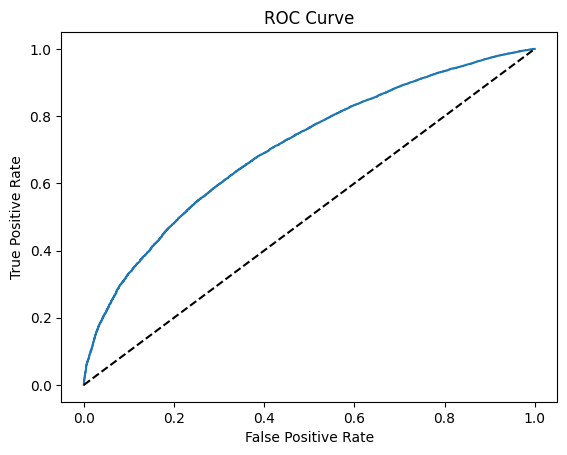

In [392]:
plt.plot(fpr, tpr)
plt.plot(fpr,fpr, linestyle='--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [394]:
AUROC= roc_auc_score(df_actual_predicted_probs['loan_status'], df_actual_predicted_probs['y_hat_prob'])
AUROC

0.7046860850675909

In [395]:
y_train.to_csv('data_targets_train.csv')
y_test.to_csv('data_targets_test.csv')

**Gini and Kolmogorov-Smirnov Test**

In [396]:
df_actual_predicted_probs= df_actual_predicted_probs.sort_values('y_hat_prob')

In [400]:
df_actual_predicted_probs.head()


index  loan_status  y_hat_prob  y_hat_test
0  38432            0    0.424661           0
1  18844            1    0.437375           0
2  45044            1    0.481592           0
3   5738            0    0.501758           0
4  35480            1    0.516639           0

In [399]:
df_actual_predicted_probs= df_actual_predicted_probs.reset_index()

In [401]:
df_actual_predicted_probs['Cumulative_N_population']= df_actual_predicted_probs.index+1
df_actual_predicted_probs['Cumulative_N_good']= df_actual_predicted_probs['loan_status'].cumsum()
df_actual_predicted_probs['Cumulative_N_bad']= df_actual_predicted_probs['Cumulative_N_population']-df_actual_predicted_probs['loan_status'].cumsum()


In [406]:
df_actual_predicted_probs.head()

index  loan_status  y_hat_prob  y_hat_test  Cumulative_N_population  \
0  38432            0    0.424661           0                        1   
1  18844            1    0.437375           0                        2   
2  45044            1    0.481592           0                        3   
3   5738            0    0.501758           0                        4   
4  35480            1    0.516639           0                        5   

   Cumulative_N_good  Cumulative_N_bad  Cumulative_perc_population  \
0                  0                 1                    0.000015   
1                  1                 1                    0.000030   
2                  2                 1                    0.000045   
3                  2                 2                    0.000060   
4                  3                 2                    0.000075   

   Cumulative_perc_good  Cumulative_perc_bad  
0              0.000000             0.000017  
1              0.000017             0.000017  
2              0.000034             0.000017  
3              0.000034             0.000034  
4              0.000051             0.000034

In [405]:
df_actual_predicted_probs['Cumulative_perc_population']= df_actual_predicted_probs['Cumulative_N_population']/df_actual_predicted_probs.shape[0]
df_actual_predicted_probs['Cumulative_perc_good']= df_actual_predicted_probs['Cumulative_N_good']/df_actual_predicted_probs['loan_status'].sum()
df_actual_predicted_probs['Cumulative_perc_bad']= df_actual_predicted_probs['Cumulative_N_bad']/df_actual_predicted_probs['loan_status'].sum()


In [407]:
df_actual_predicted_probs.tail()

index  loan_status  y_hat_prob  y_hat_test  Cumulative_N_population  \
66254  62730            1    0.990153           1                    66255   
66255    547            1    0.990174           1                    66256   
66256  64410            1    0.990323           1                    66257   
66257  41708            1    0.990931           1                    66258   
66258  11890            1    0.991686           1                    66259   

       Cumulative_N_good  Cumulative_N_bad  Cumulative_perc_population  \
66254              58542              7713                    0.999940   
66255              58543              7713                    0.999955   
66256              58544              7713                    0.999970   
66257              58545              7713                    0.999985   
66258              58546              7713                    1.000000   

       Cumulative_perc_good  Cumulative_perc_bad  
66254              0.999932             0.131743  
66255              0.999949             0.131743  
66256              0.999966             0.131743  
66257              0.999983             0.131743  
66258              1.000000             0.131743

Text(0.5, 1.0, 'Gini Chart')

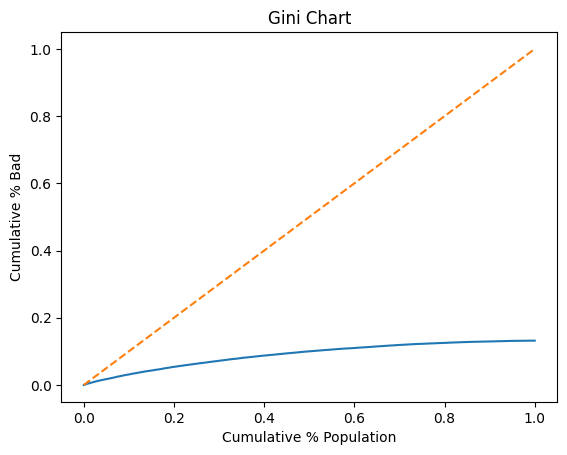

In [410]:
plt.plot(df_actual_predicted_probs['Cumulative_perc_population'], df_actual_predicted_probs['Cumulative_perc_bad'])
plt.plot(df_actual_predicted_probs['Cumulative_perc_population'], df_actual_predicted_probs['Cumulative_perc_population'], linestyle='--')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini Chart')

In [411]:
Gini= AUROC*2-1
Gini

0.4093721701351818

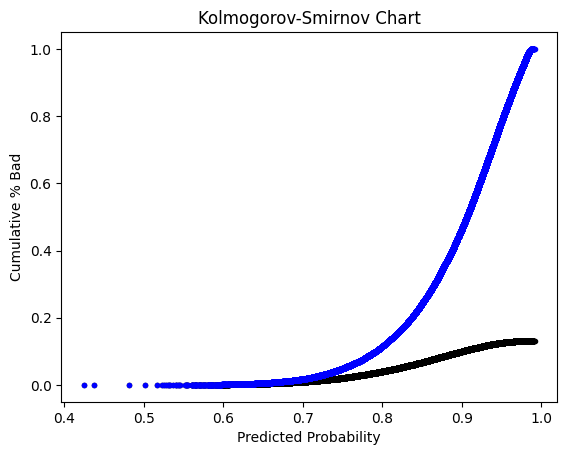

In [412]:
plt.plot(df_actual_predicted_probs['y_hat_prob'], df_actual_predicted_probs['Cumulative_perc_bad'], marker='.', color='k', linestyle='none')
plt.plot(df_actual_predicted_probs['y_hat_prob'], df_actual_predicted_probs['Cumulative_perc_good'], marker='.', color='b', linestyle='none')
plt.xlabel('Predicted Probability')
plt.ylabel('Cumulative % Bad')
plt.title('Kolmogorov-Smirnov Chart')
plt.show()

In [413]:
KS= max(abs(df_actual_predicted_probs['Cumulative_perc_bad']-df_actual_predicted_probs['Cumulative_perc_good']))
KS

0.8682574385952926

**Applying PD Model**